In [10]:
load("dataset.RData")
library(tidyverse)
library(lubridate)
library(forcats)
library(scales)
library(purrr)
library(RColorBrewer)

In [3]:
#----------------------------
#product popularity
data_after_2017_Jul <- product_weekly_usage %>%
    filter(dt > observed_date)

product_usage <- data_after_2017_Jul %>% 
    group_by(owner_id,product_line_name) %>%
    summarise(mean_seats = mean(weekly_seats),
              sum_sessions = sum(weekly_sessions)) %>%
    mutate(sessions_seats = sum_sessions/mean_seats)

num_months <- interval(observed_date,max(dataset$dt))/ months(1)
cat("number of month observed is ",round(num_months,2),"\n\n")
product_popularity <- product_usage %>%
    group_by(product_line_name) %>%
    summarise(total_sessions = sum(sum_sessions)) %>%
    arrange(desc(total_sessions)) %>%
    mutate(rank = seq(1,n()))

cat("Product popularity ranked by total sessions over the last ", round(num_months,2)," months")
product_popularity

number of month observed is  3.65 

Product popularity ranked by total sessions over the last  3.65  months

product_line_name,total_sessions,rank
ACD,1832094,1
RVT,1626939,2
INVPROSA,913452,3
CIV3D,517440,4
AMECH_PP,395967,5
NAVMAN,299484,6
ARCHDESK,242307,7
3DSMAX,219245,8
BLDSYS,136324,9
MAYA,90183,10


In [4]:
all_versions <- dataset %>% 
    filter(!is.na(product_name)) %>%
    group_by(product_line_name) %>%
    summarise(products_list = list(unique(product_name)),
              products = map_chr(products_list,str_c,collapse = ","),
              num_versions = map_dbl(products_list,length),
              version_changed = if_else(num_versions >1,TRUE,FALSE)) %>%
    left_join(product_popularity) %>%
    arrange(desc(version_changed),rank)

versions_display <- all_versions %>% select(-products_list,total_sessions);versions_display

Joining, by = "product_line_name"


product_line_name,products,num_versions,version_changed,total_sessions,rank
ACD,"ACD2017,ACD2018",2,TRUE,1832094,1
RVT,"RVT2017,RVT2018,RVT2015",3,TRUE,1626939,2
INVPROSA,"INVPROSA2017,INVPROSA2018",2,TRUE,913452,3
CIV3D,"CIV3D2017,CIV3D2018",2,TRUE,517440,4
AMECH_PP,"AMECH_PP2017,AMECH_PP2018",2,TRUE,395967,5
NAVMAN,"NAVMAN2017,NAVMAN2018",2,TRUE,299484,6
ARCHDESK,"ARCHDESK2017,ARCHDESK2018",2,TRUE,242307,7
3DSMAX,"3DSMAX2017,3DSMAX2018",2,TRUE,219245,8
BLDSYS,"BLDSYS2017,BLDSYS2018",2,TRUE,136324,9
MAYA,"MAYA2017,MAYA2016,MAYA2018",3,TRUE,90183,10


In [14]:
focus_product  <- all_versions %>%
    filter(rank <= 17) %>%
    pull(product_line_name) %>%
    as.character();focus_product
focus_dataset <- dataset %>%
    filter(product_line_name %in% focus_product & !is.na(product_name))

[1] "ACD"      "RVT"      "INVPROSA" "CIV3D"    "AMECH_PP" "NAVMAN"  
 [7] "ARCHDESK" "3DSMAX"   "BLDSYS"   "MAYA"     "PLNT3D"   "ACAD_E"  
[13] "INVNTOR"  "MAP"      "RECAP"    "NAVSIM"   "RSAPRO"

### Number of Sessions

[[1]]

[[2]]


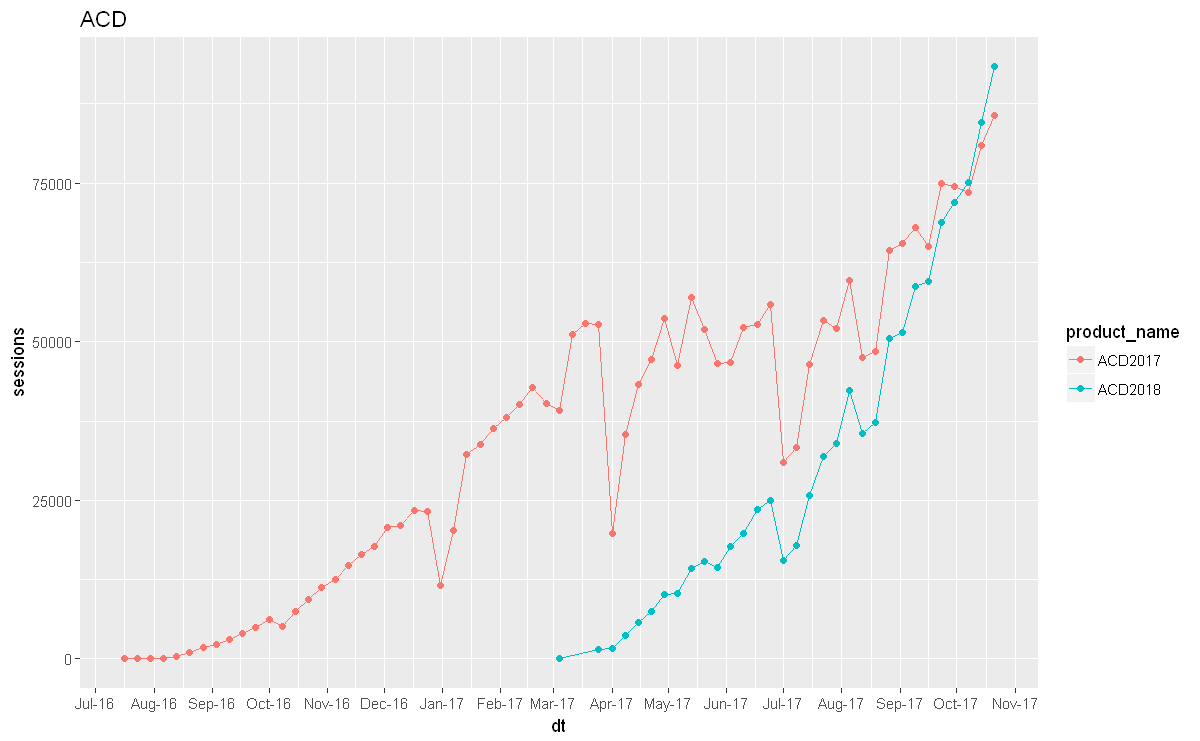


[[3]]


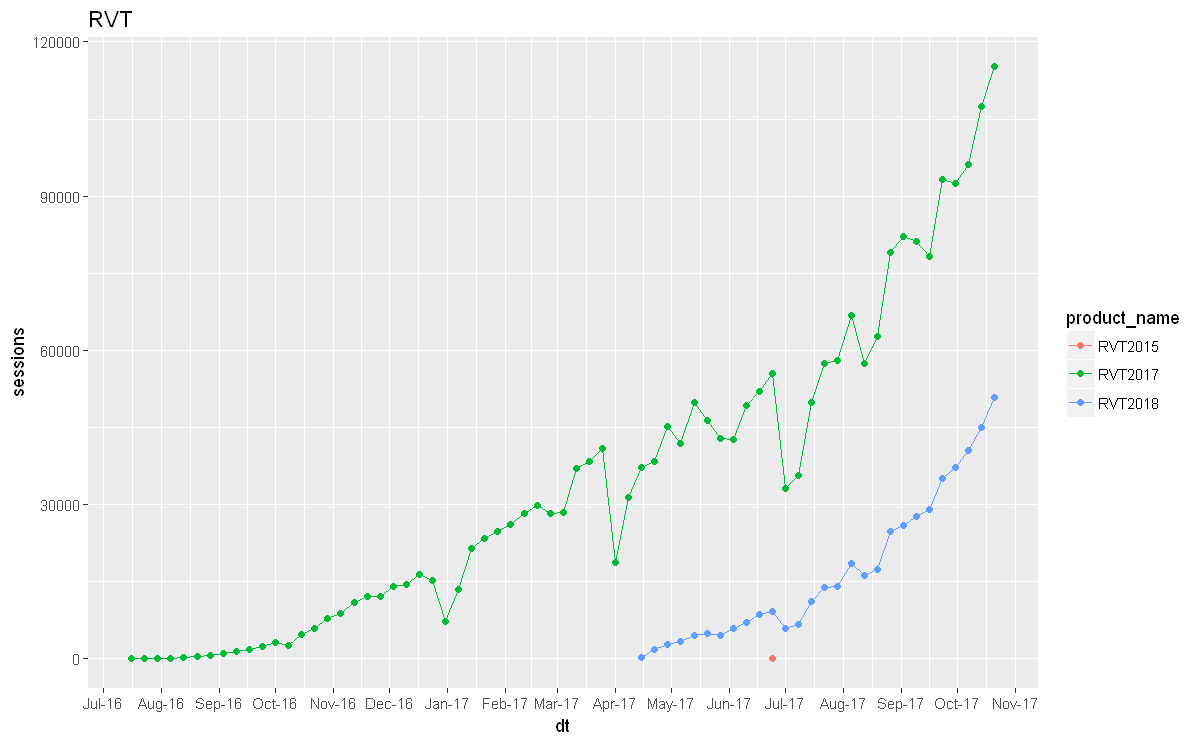


[[4]]


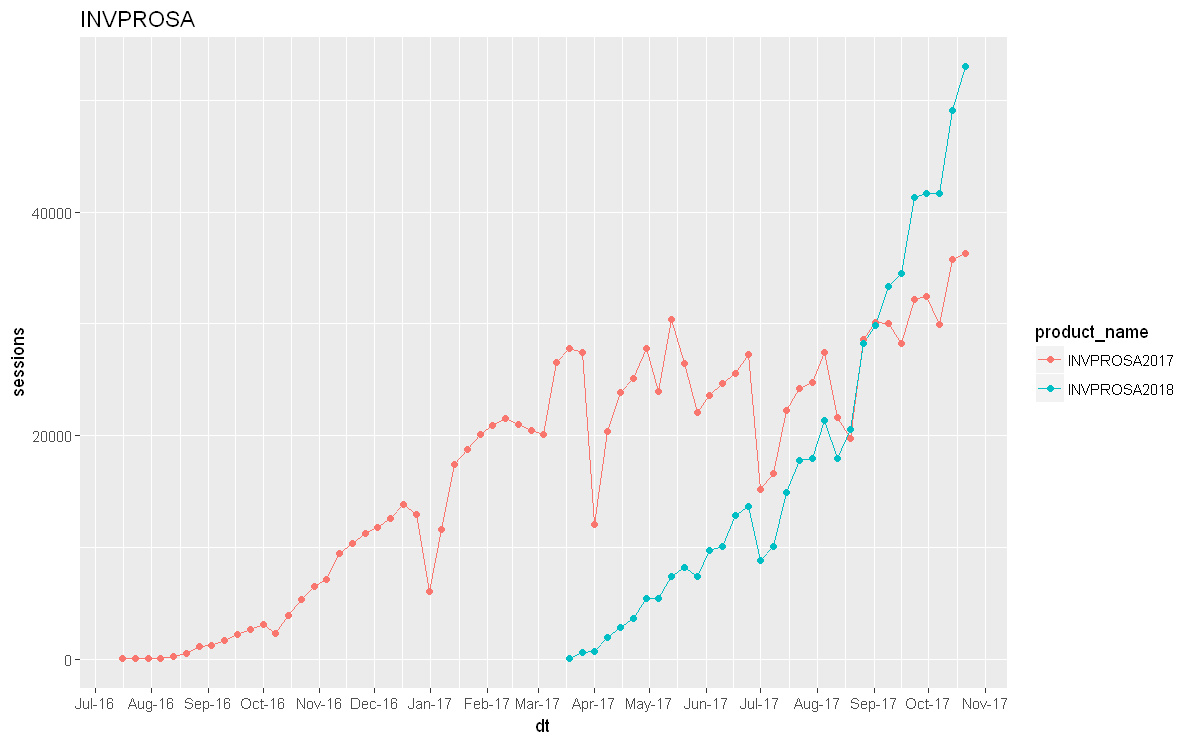


[[5]]


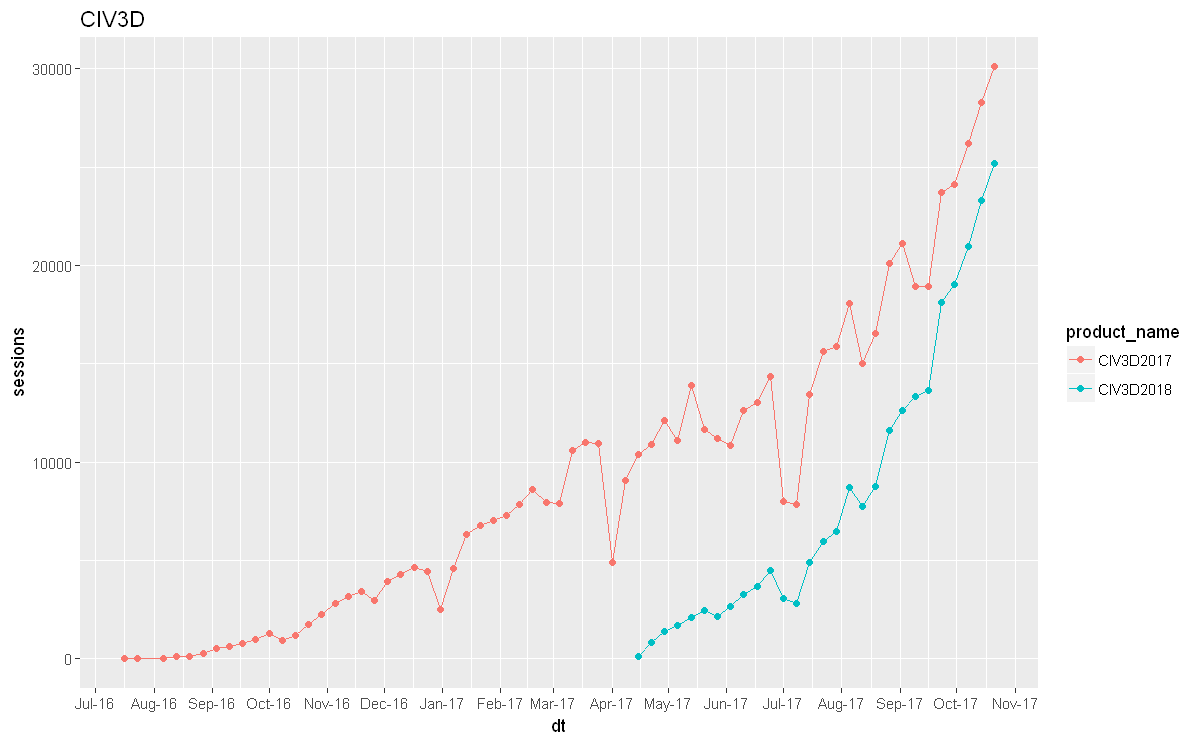


[[6]]


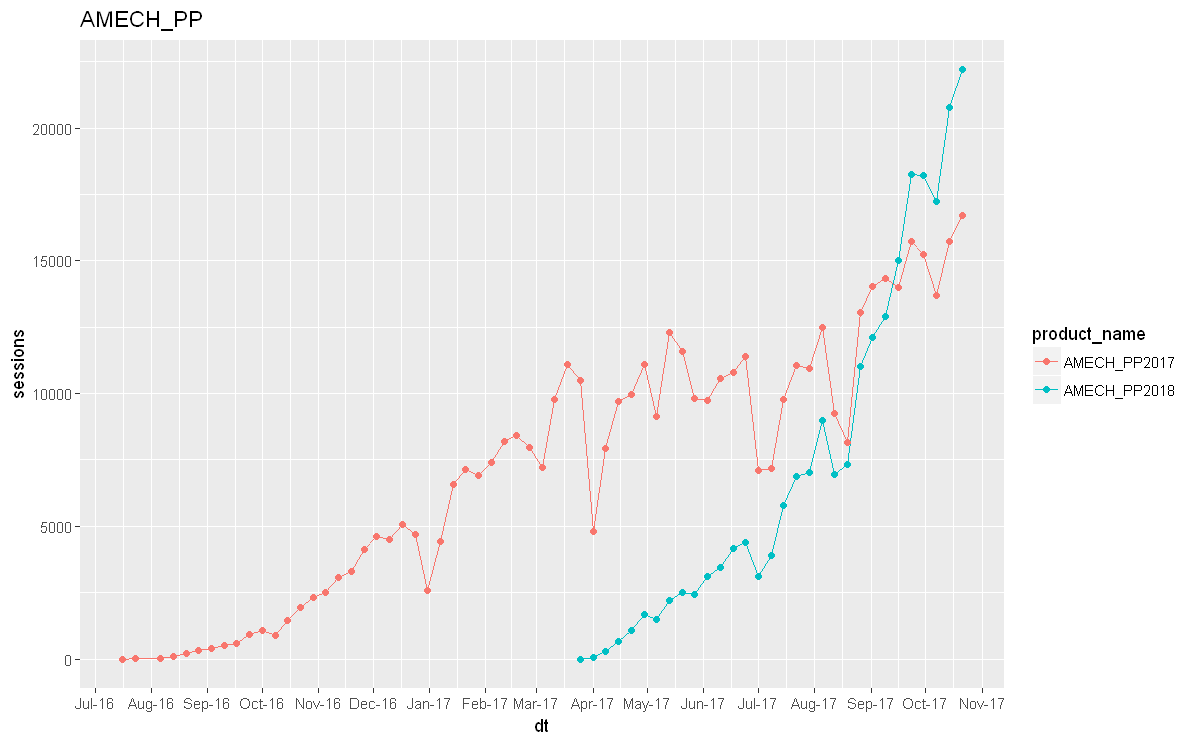


[[7]]


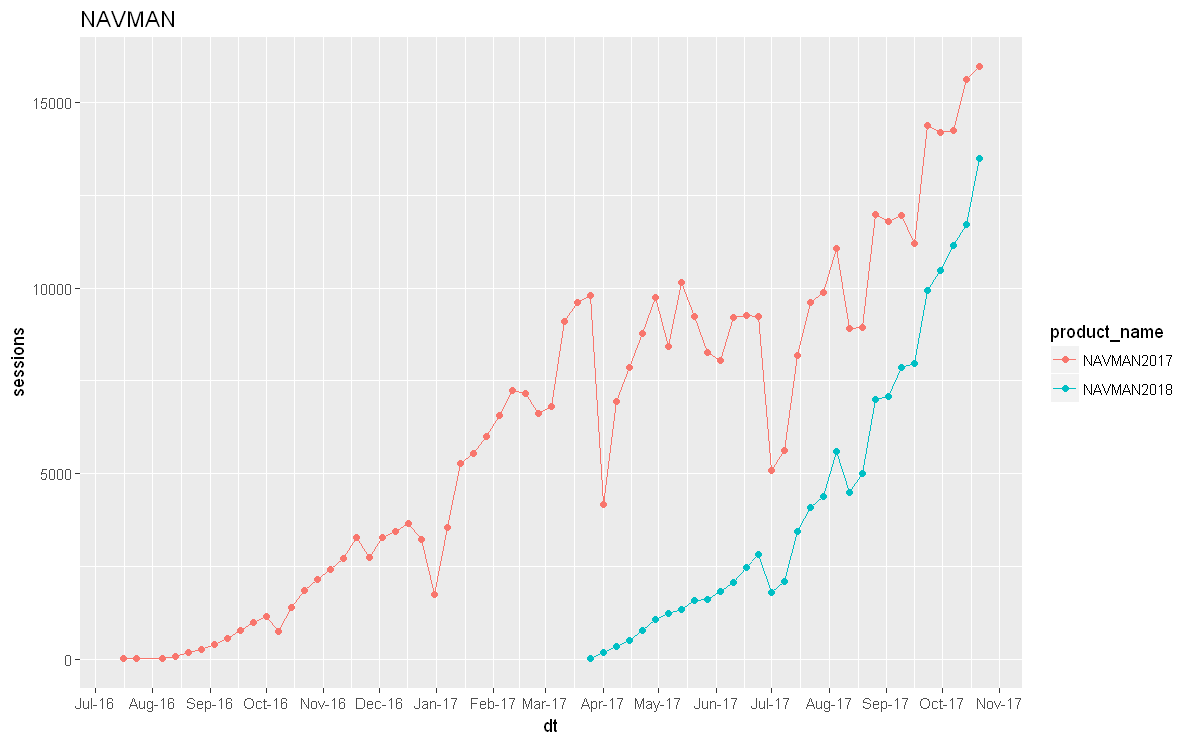


[[8]]


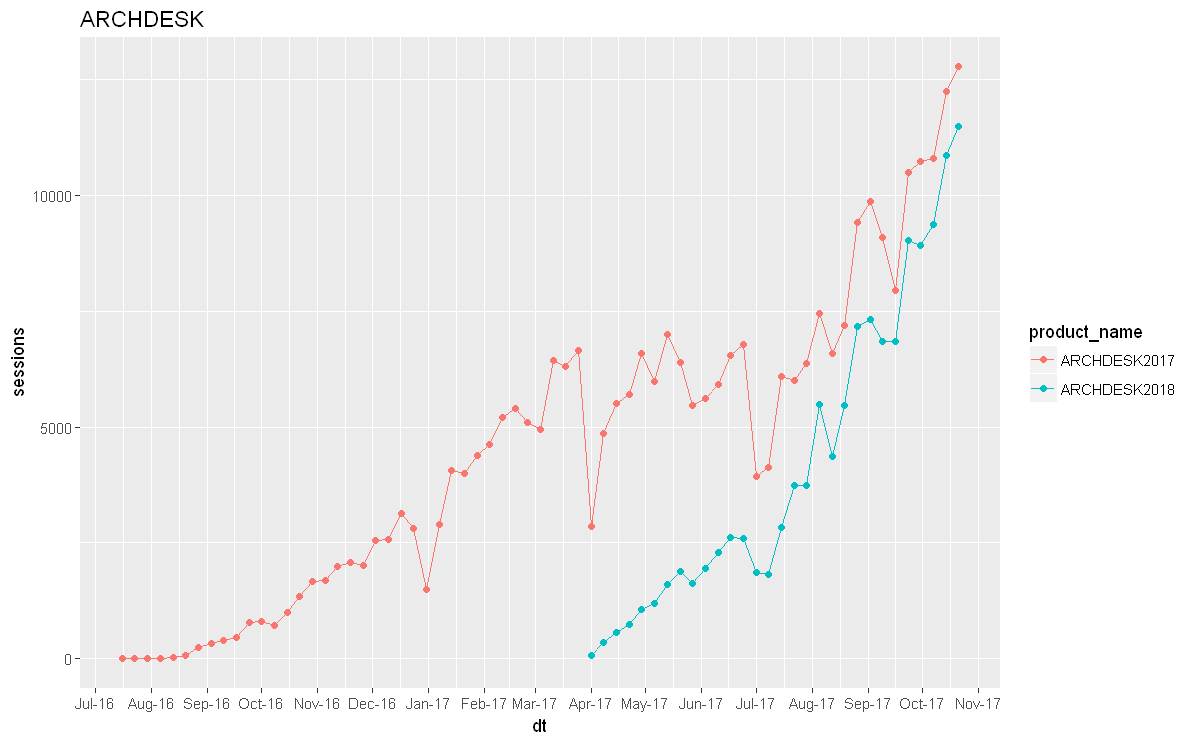


[[9]]


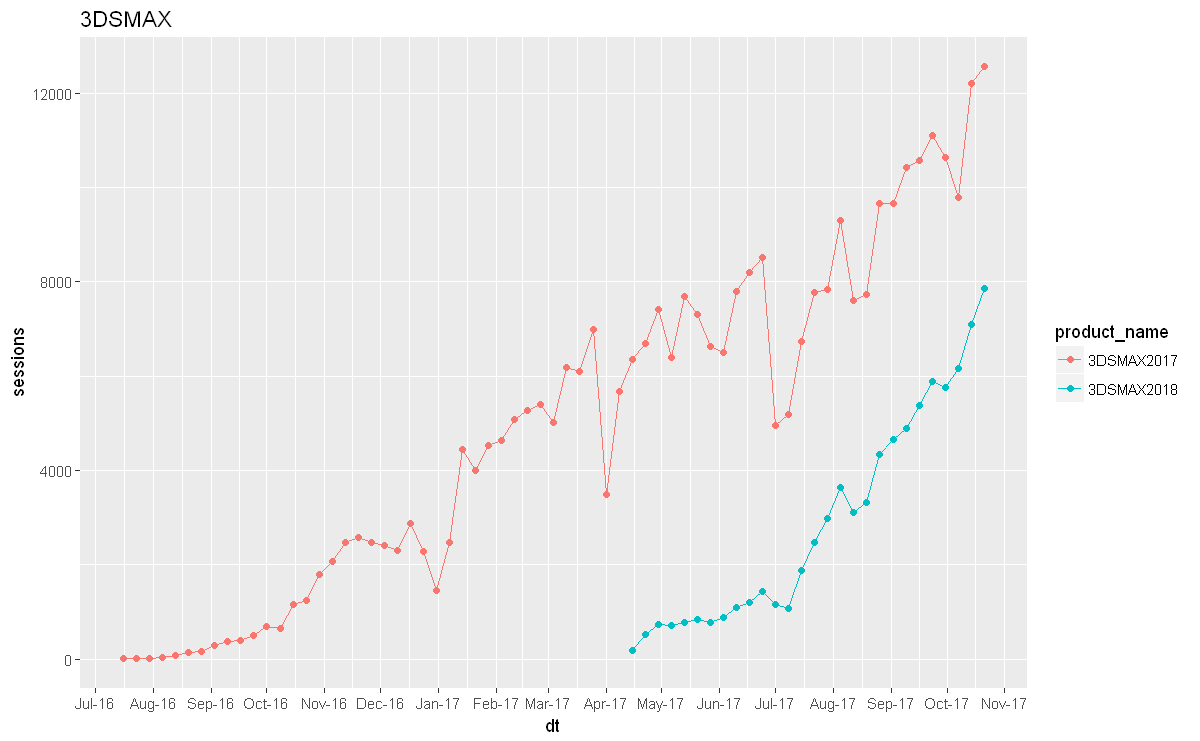


[[10]]


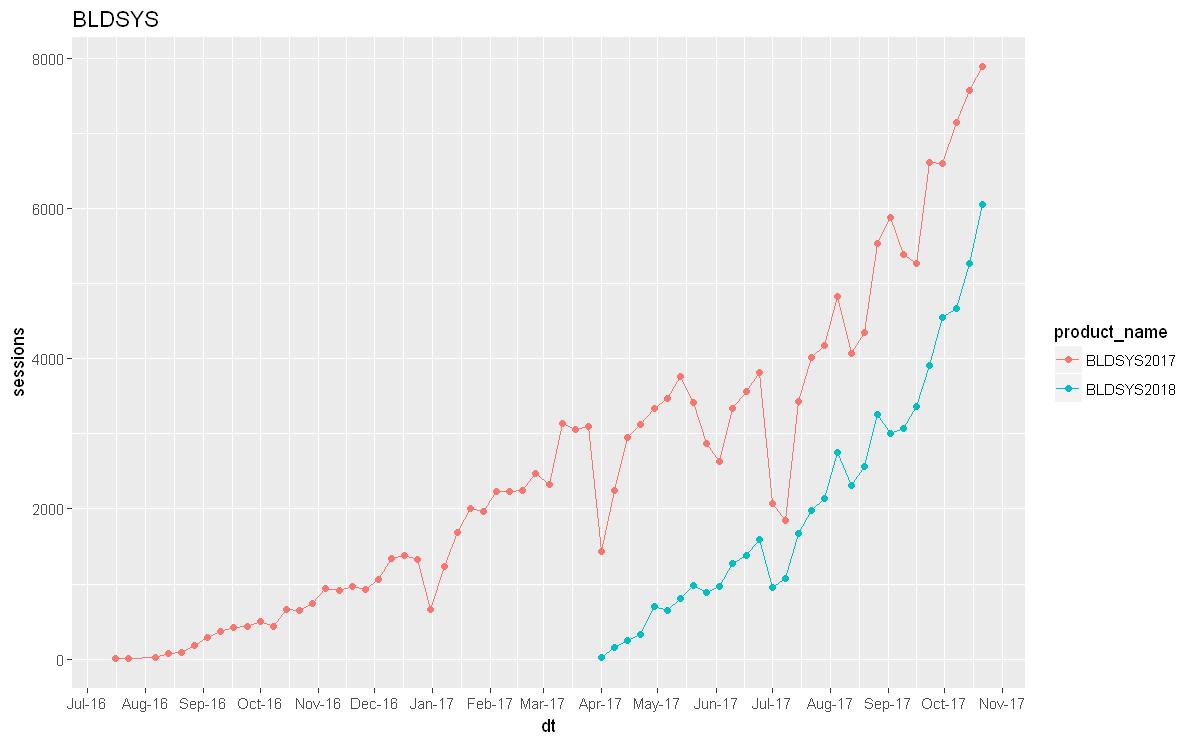


[[11]]


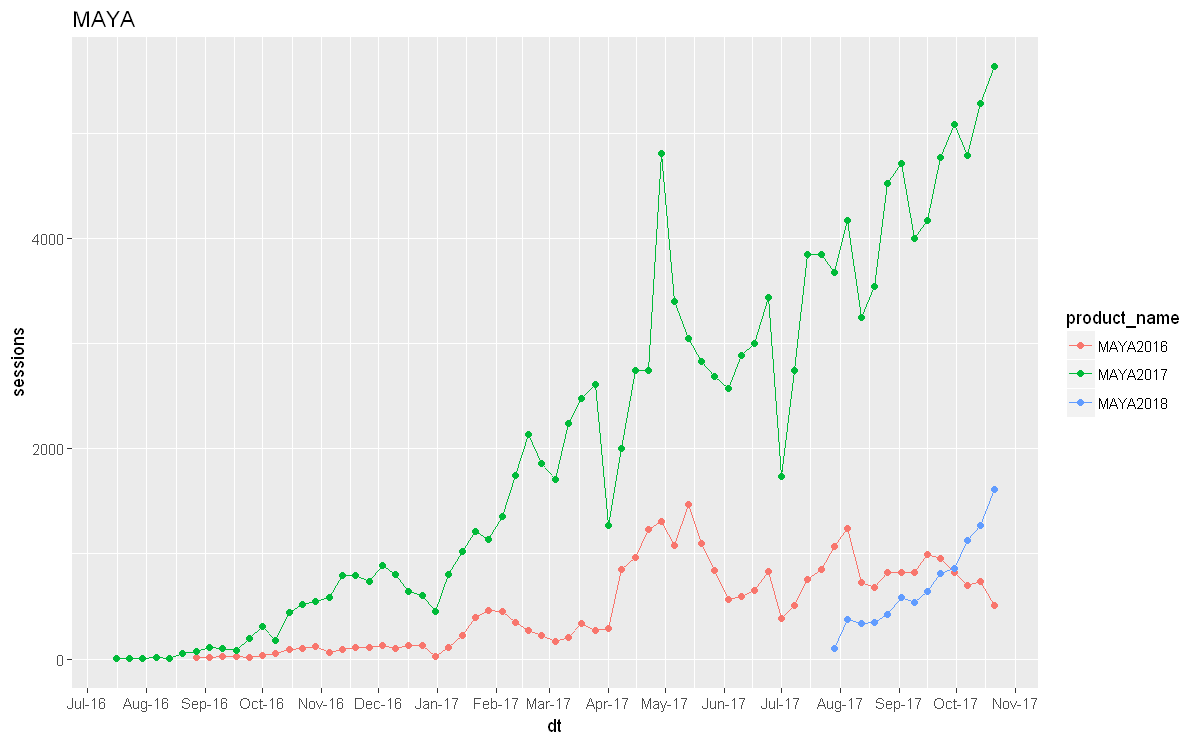


[[12]]


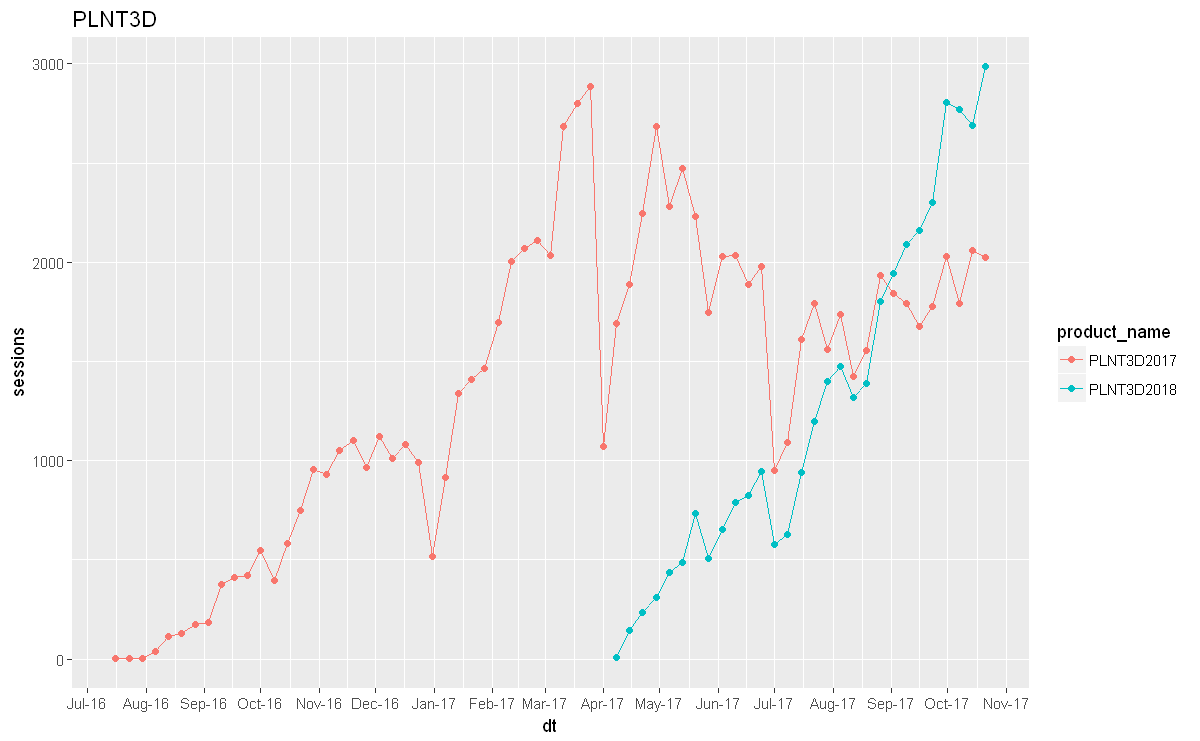


[[13]]


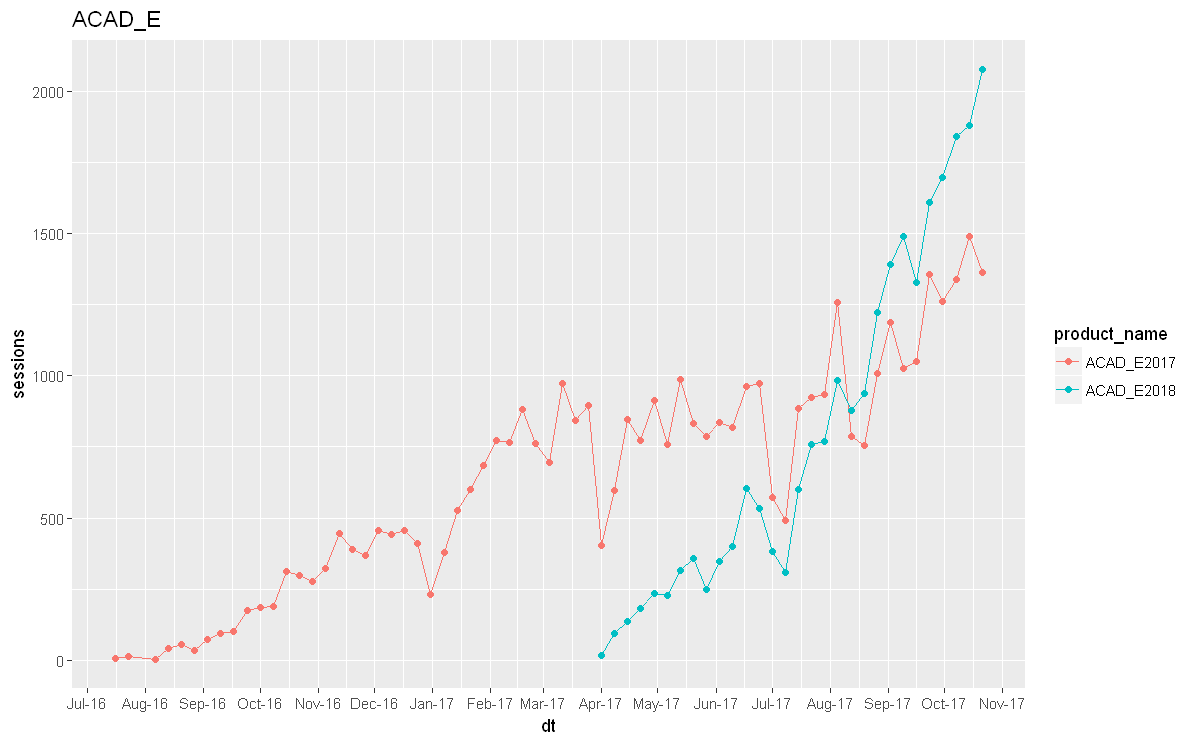


[[14]]


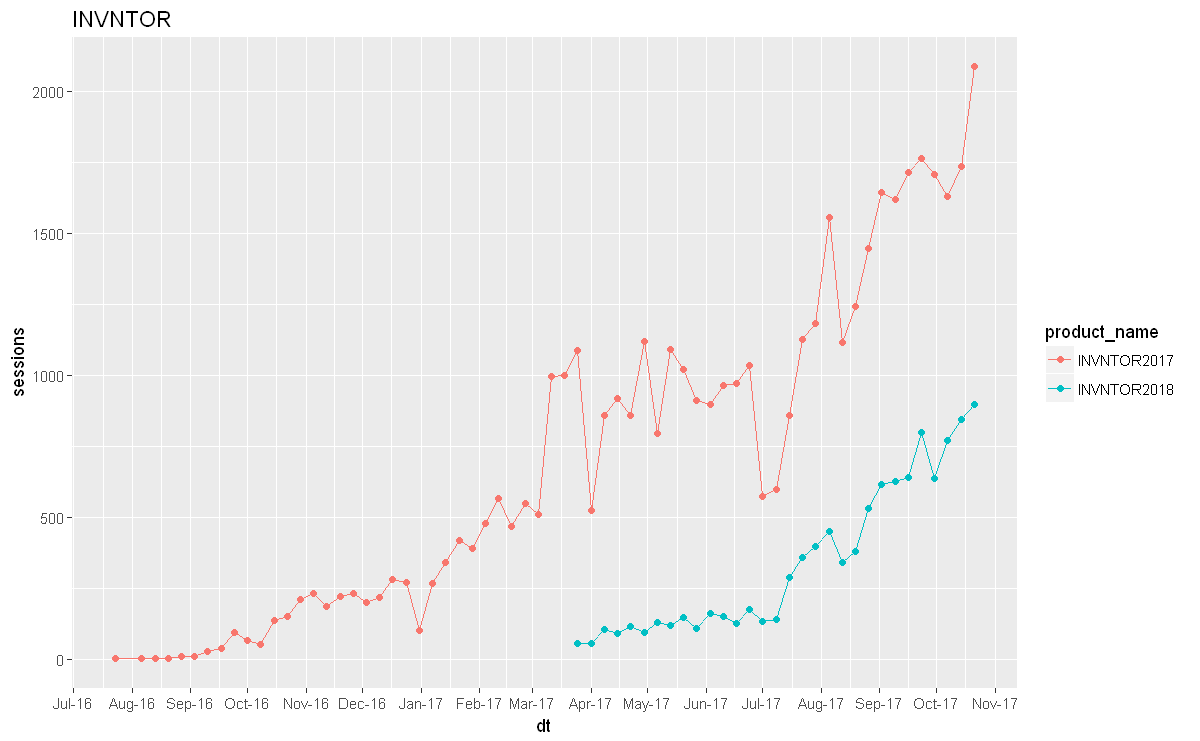


[[15]]


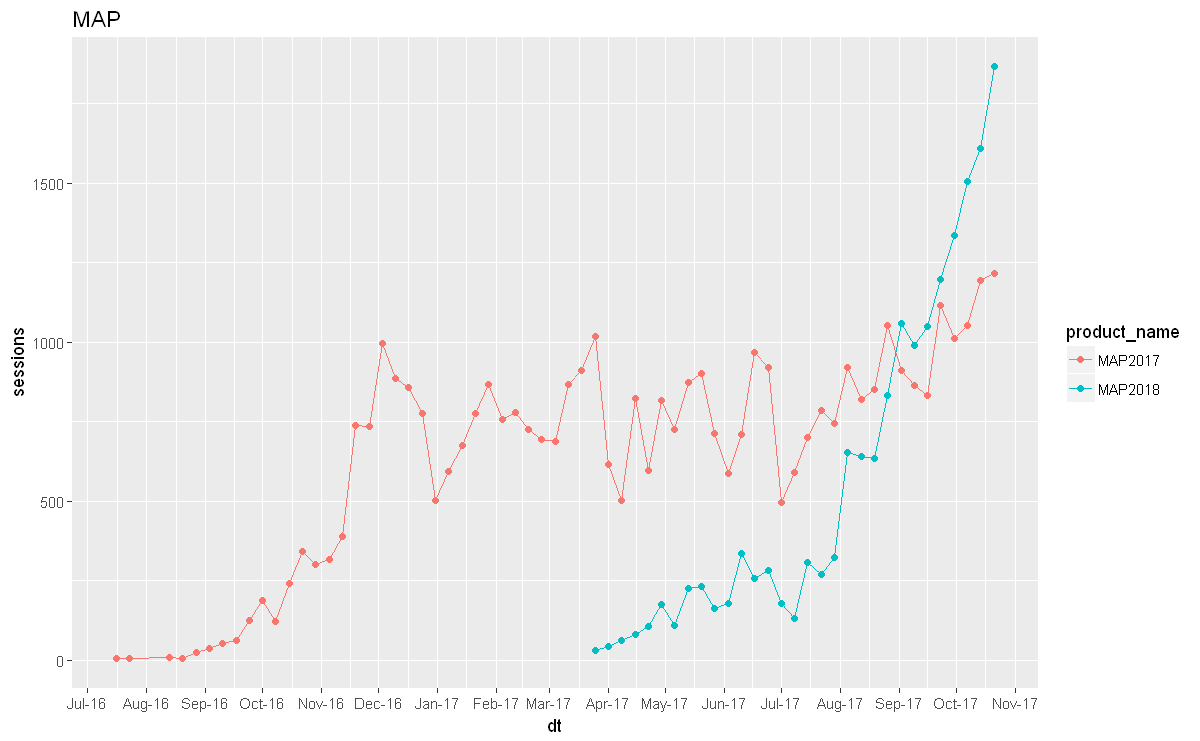


[[16]]


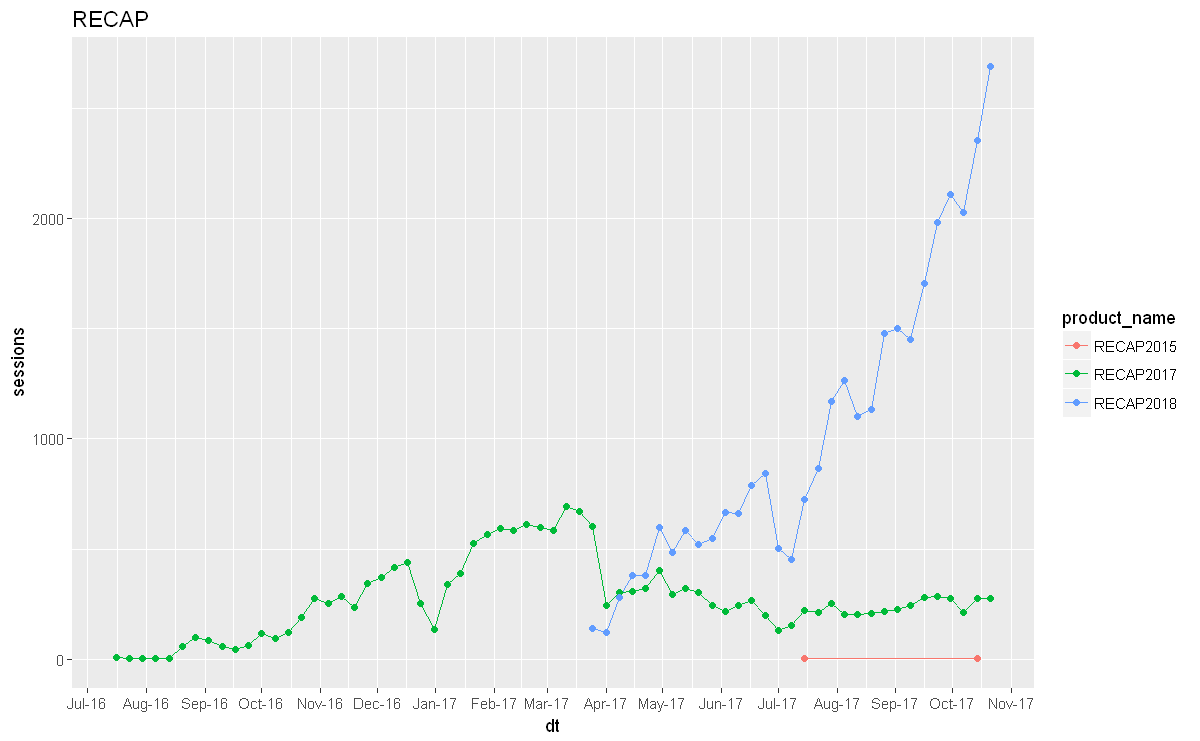


[[17]]


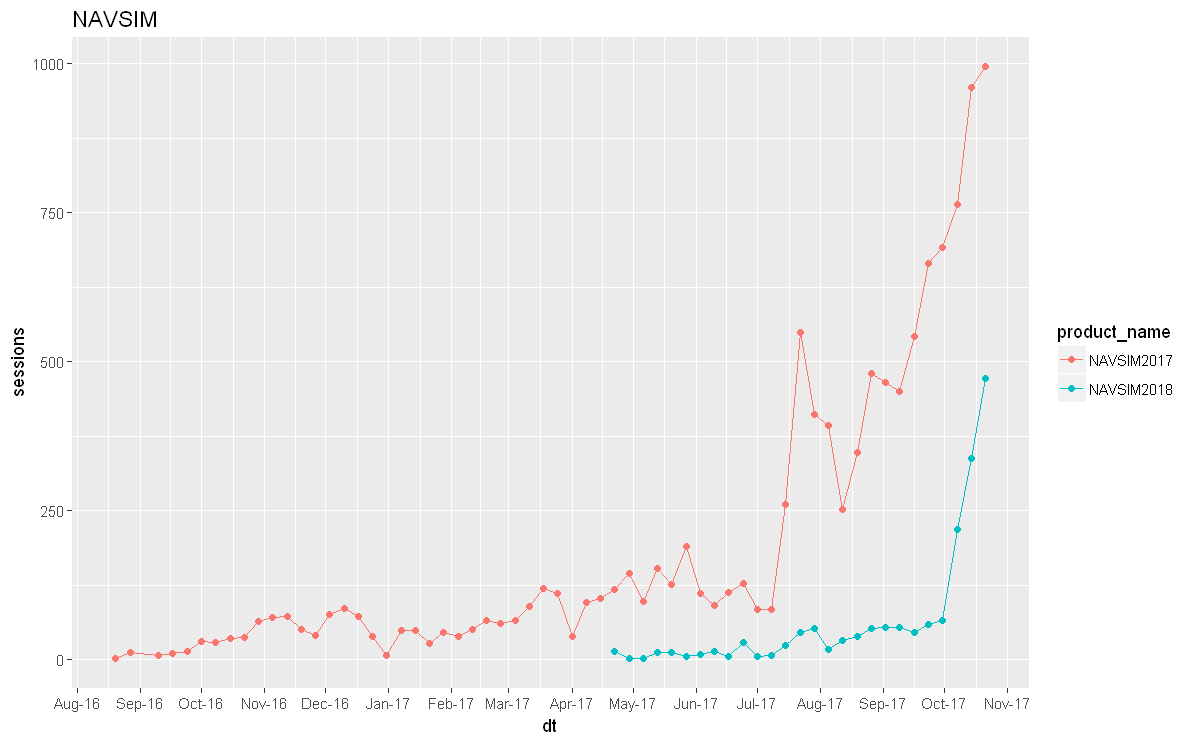

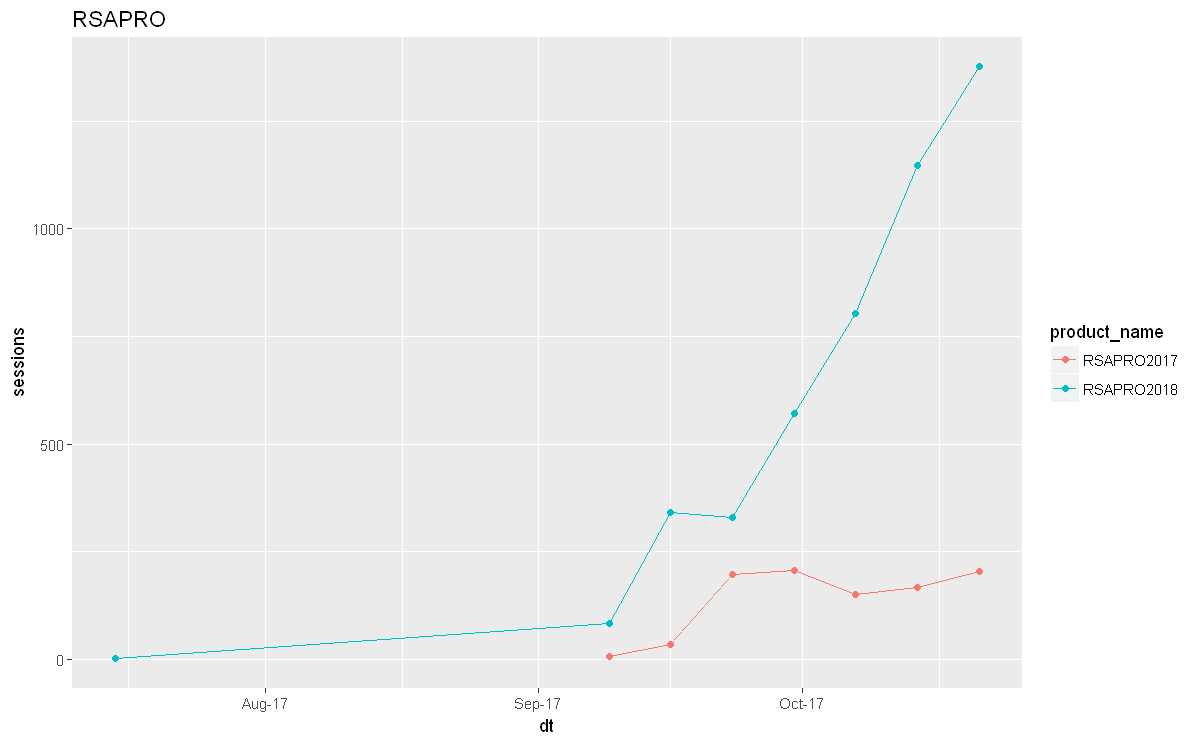

In [15]:
#sessions
sessions_dt <- focus_dataset %>%
    group_by(product_line_name,product_name,dt) %>%
    summarise(sessions = sum(sessions)) %>%
    ungroup()

graph_list_sessions <- list()
for(i in 1 : length(focus_product)){
    graph_list_sessions[[i]] <- sessions_dt %>%
        filter(product_line_name == focus_product[i]) %>%
        ggplot(mapping = aes(x = dt,y = sessions,color = product_name)) +
        geom_line()+
        geom_point() +
        scale_x_date(breaks = date_breaks("months"), labels = date_format("%b-%y")) +
        labs(title = focus_product[i])
}

options(repr.plot.width=10, repr.plot.height=10 * 0.618)
print(graph_list_sessions)

### Number of seats

[[1]]

[[2]]


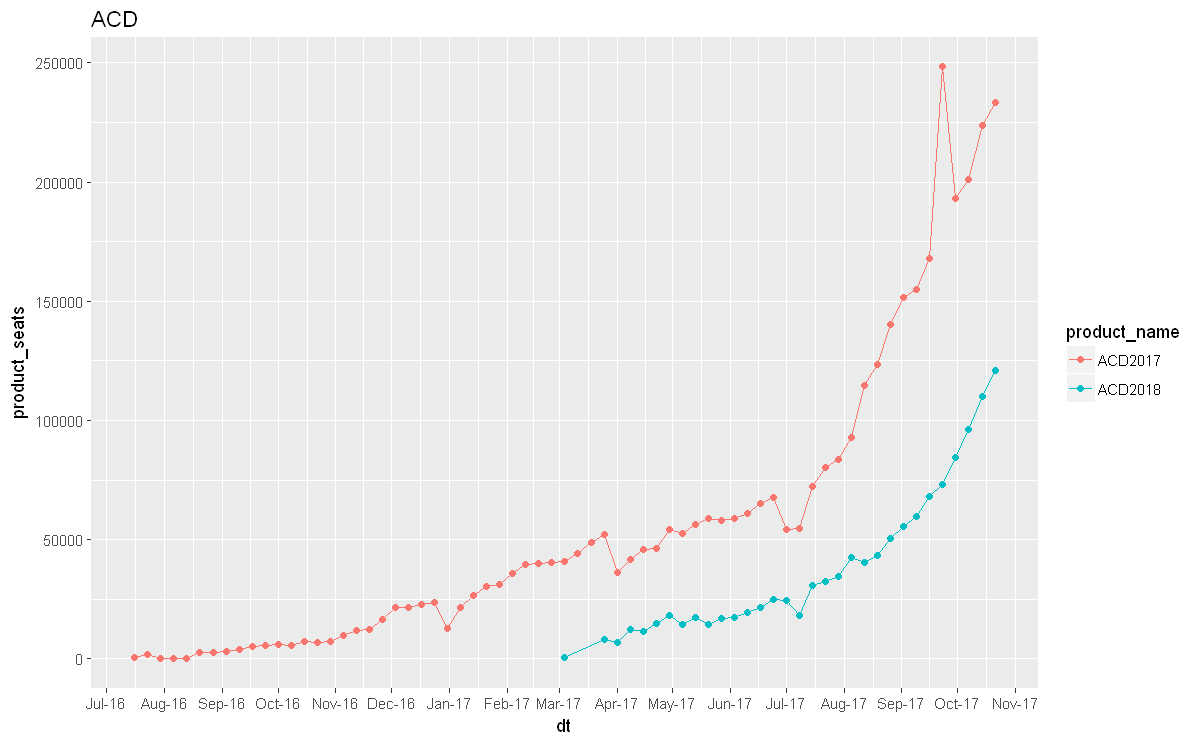


[[3]]


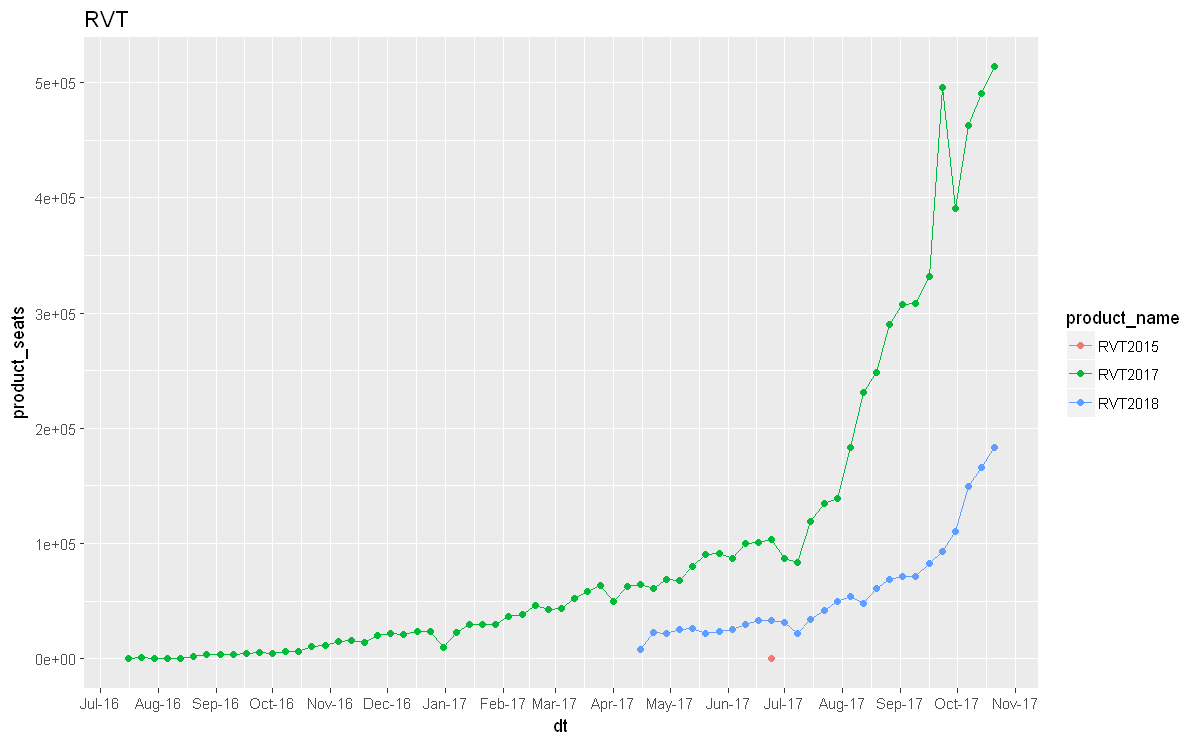


[[4]]


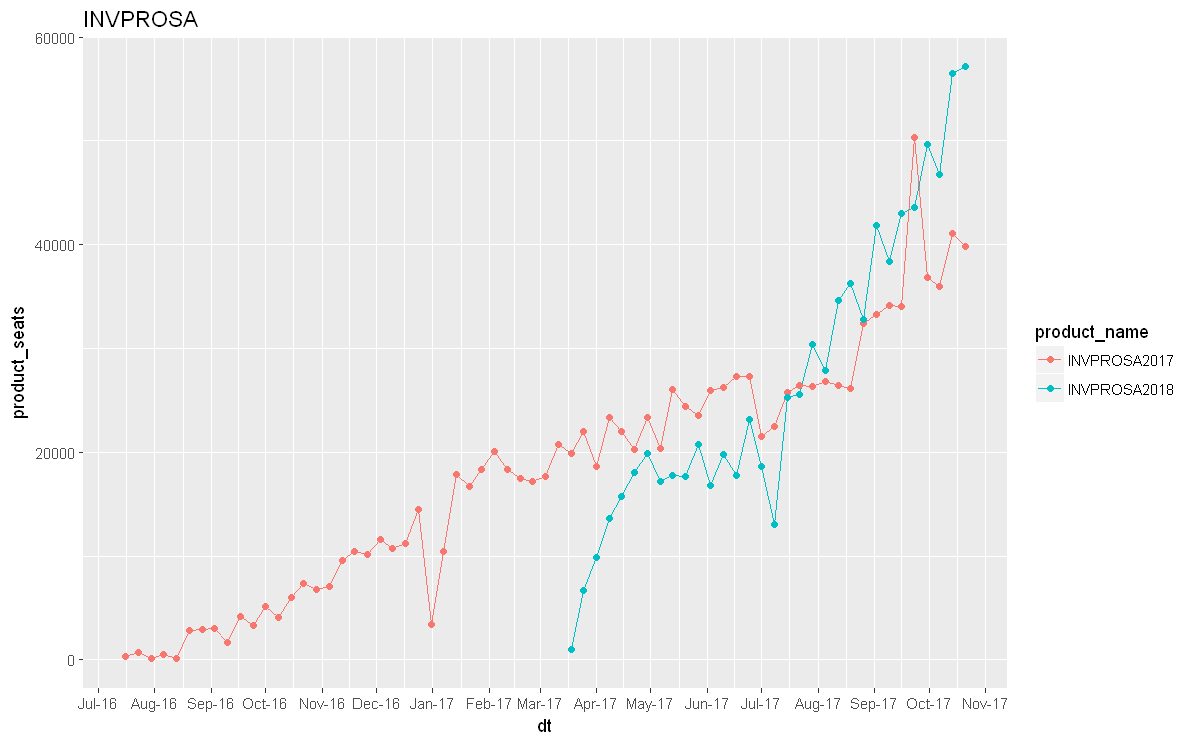


[[5]]


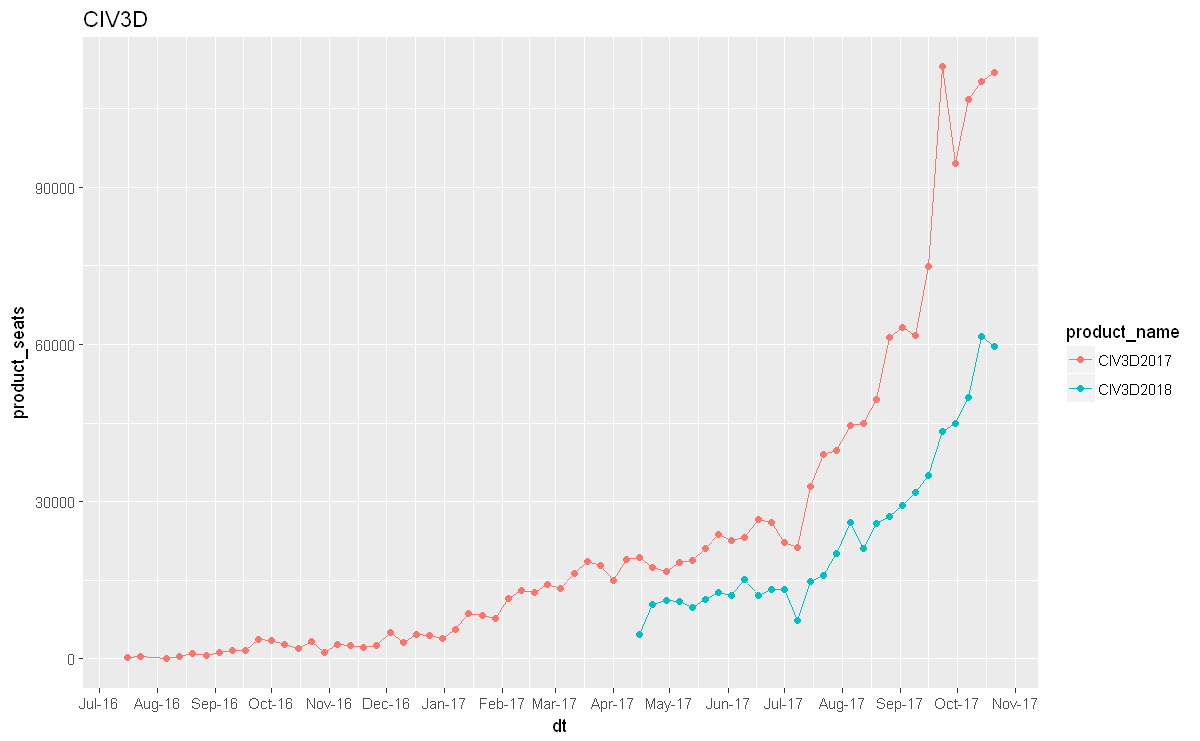


[[6]]


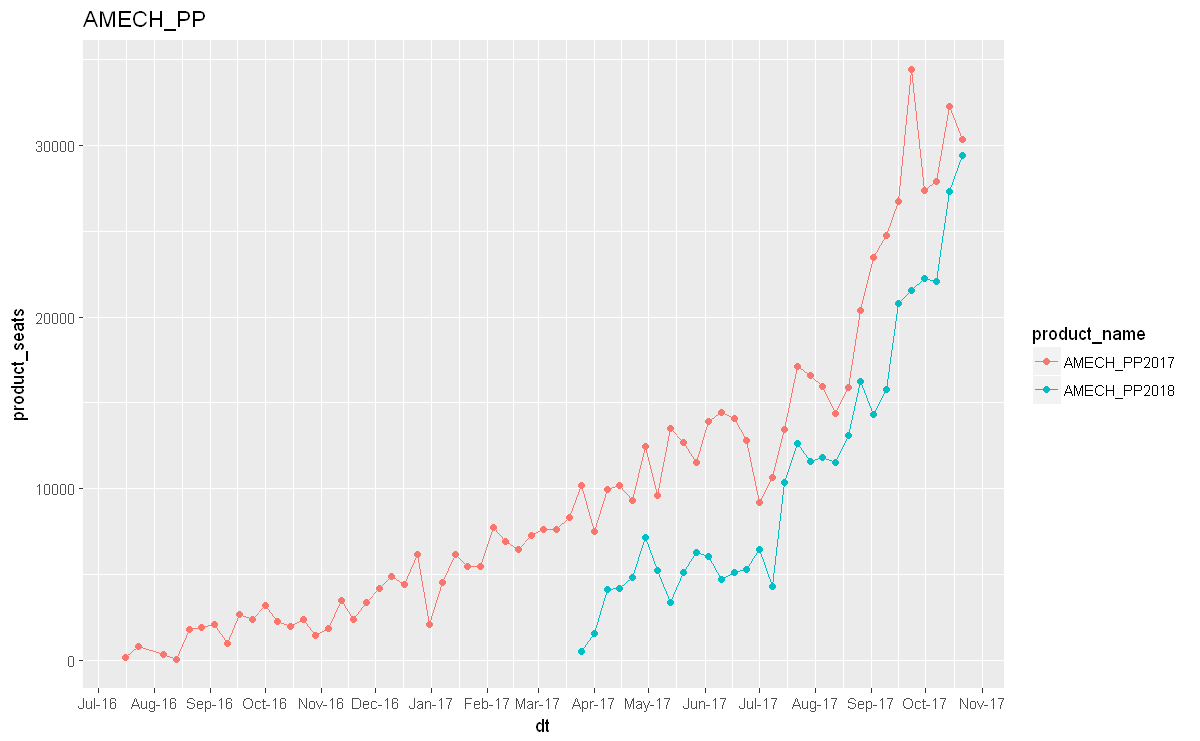


[[7]]


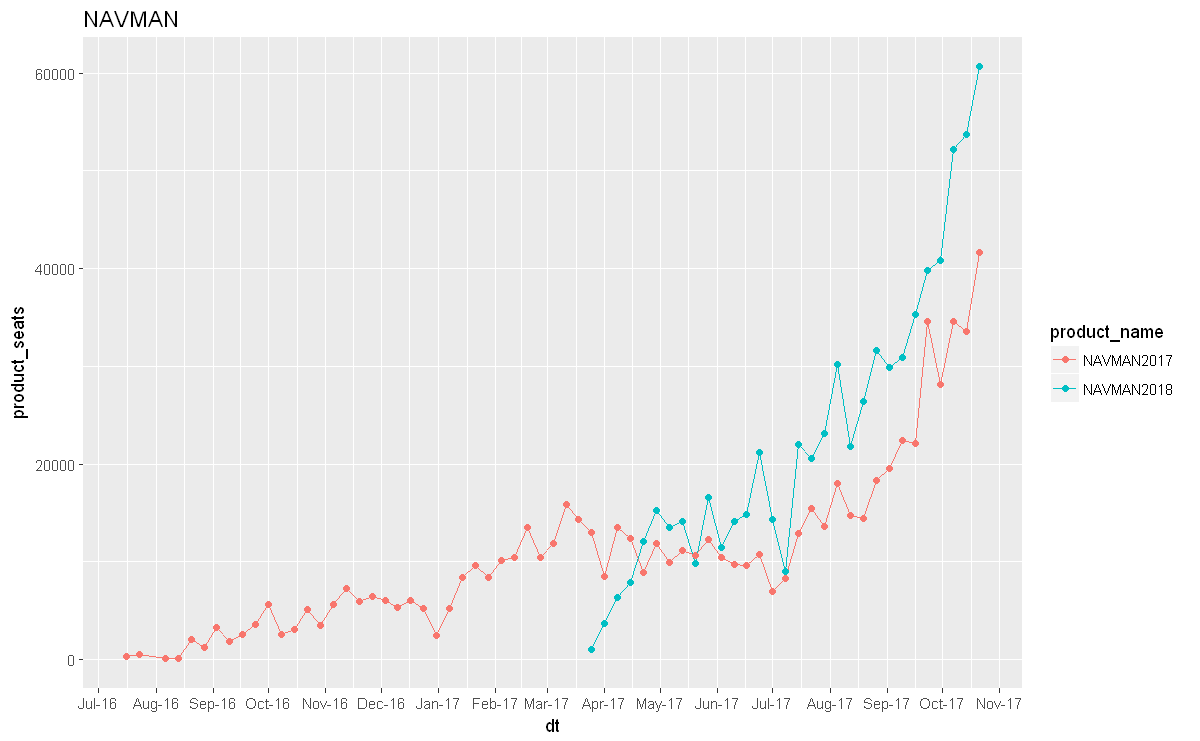


[[8]]


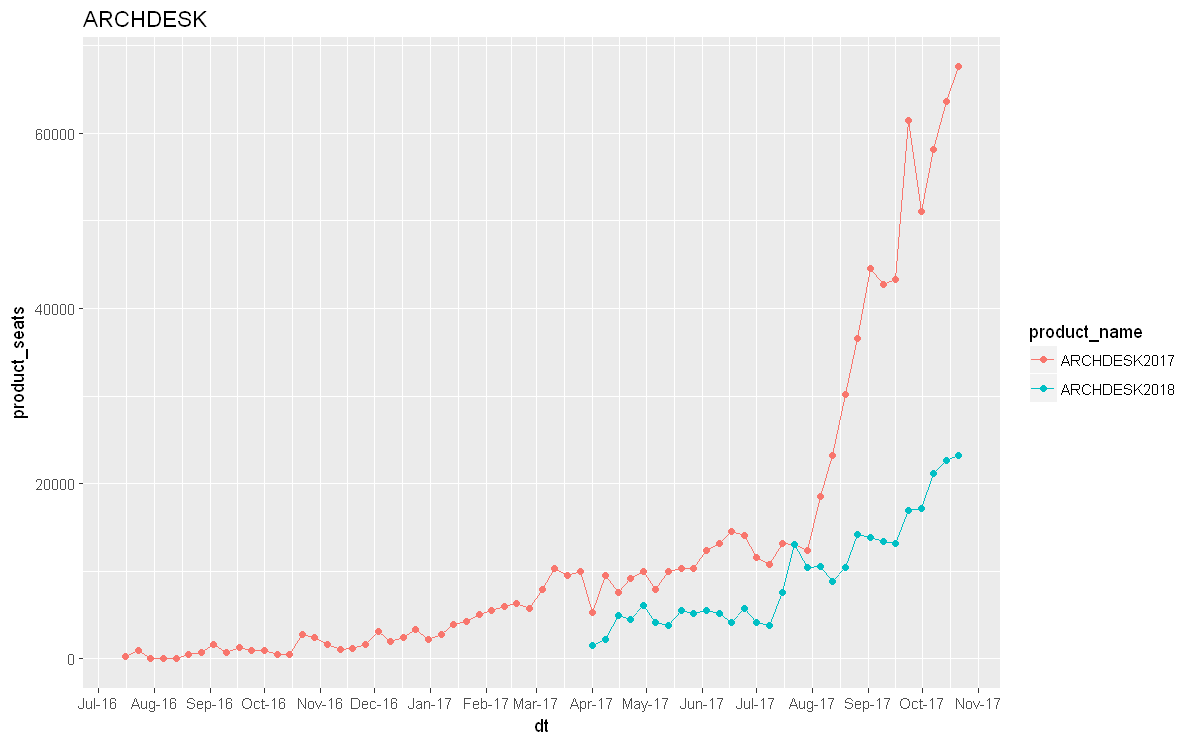


[[9]]


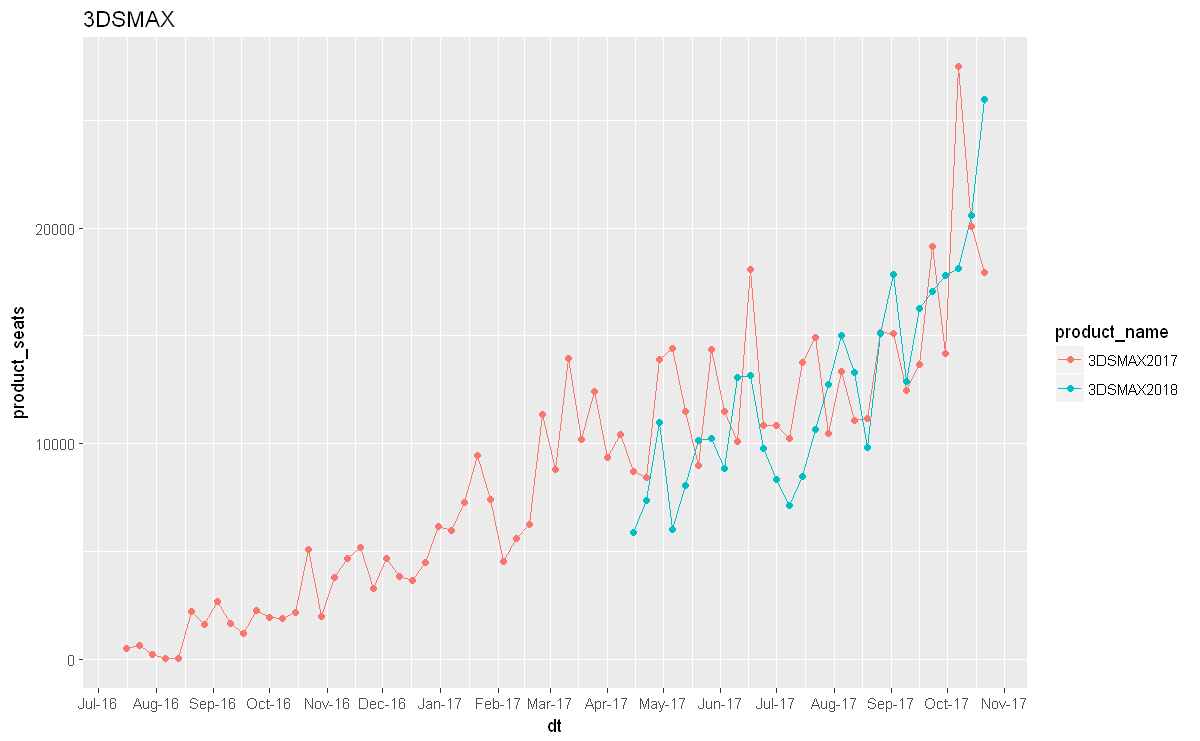


[[10]]


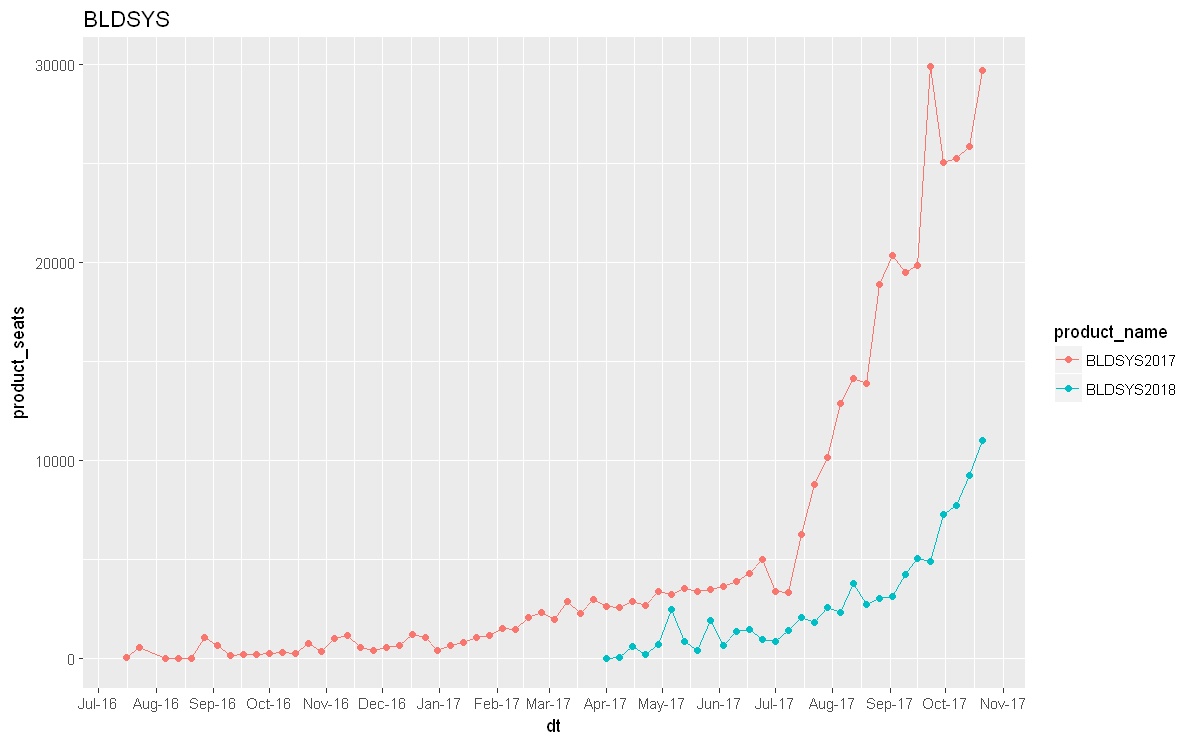


[[11]]


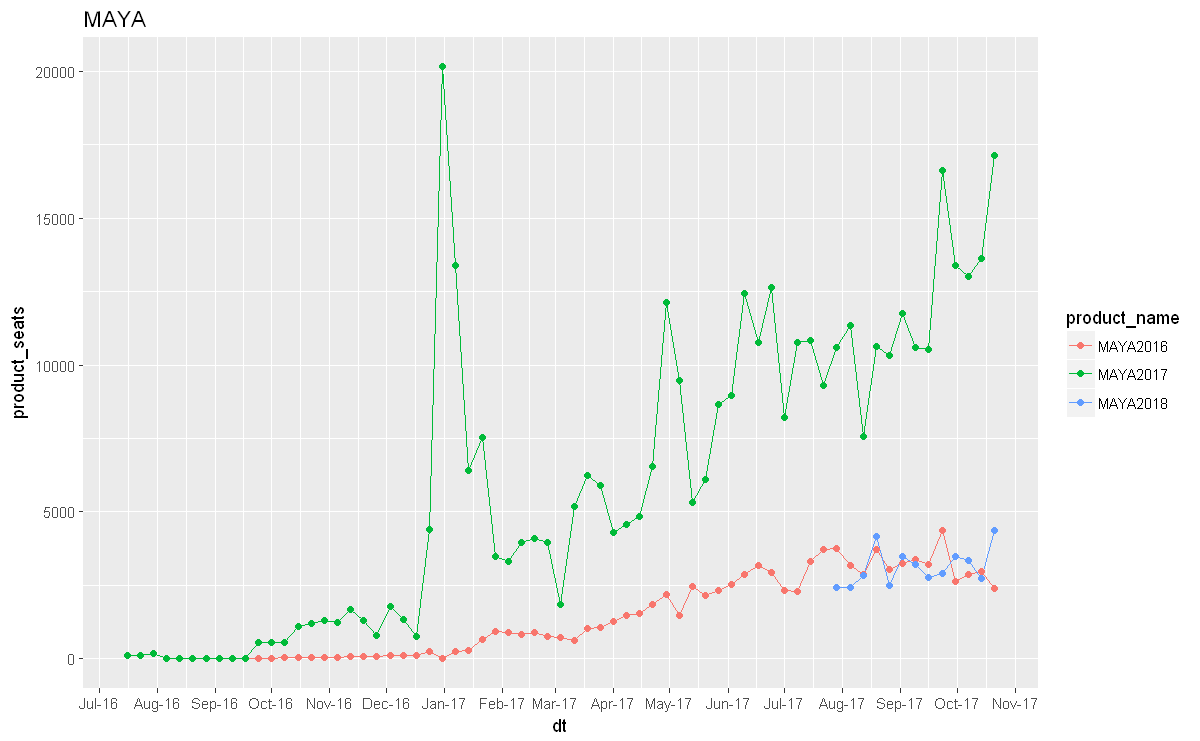


[[12]]


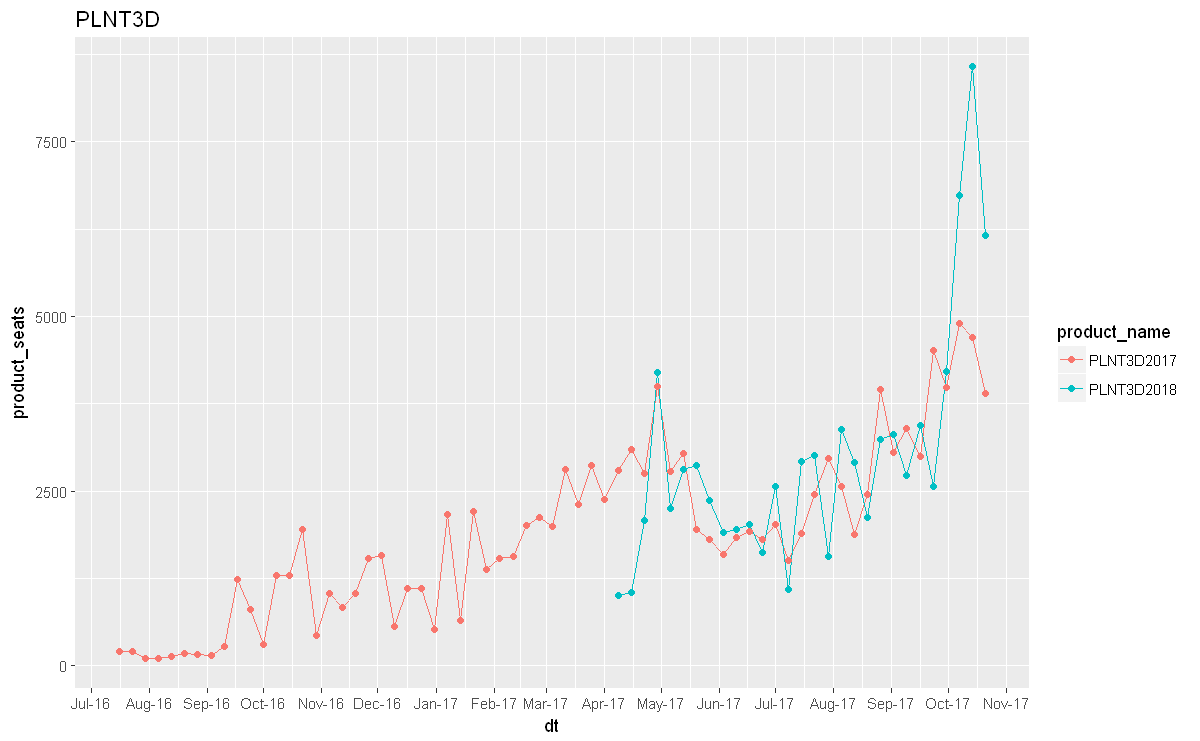


[[13]]


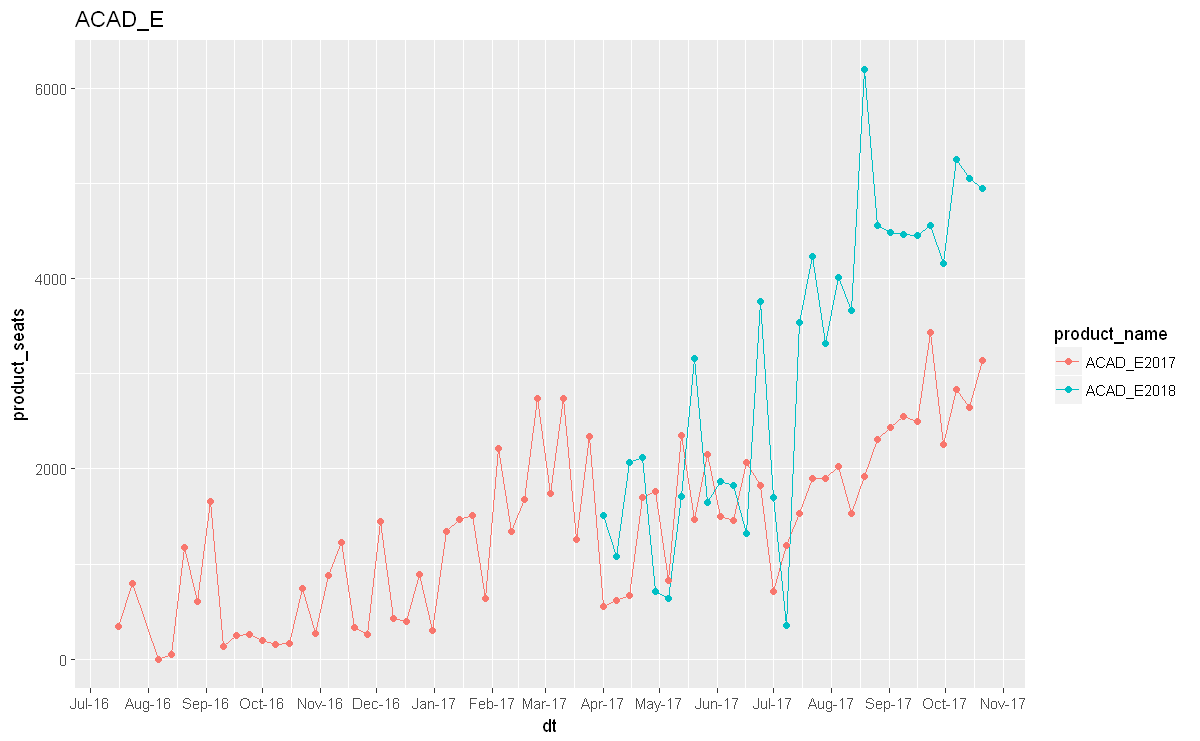


[[14]]


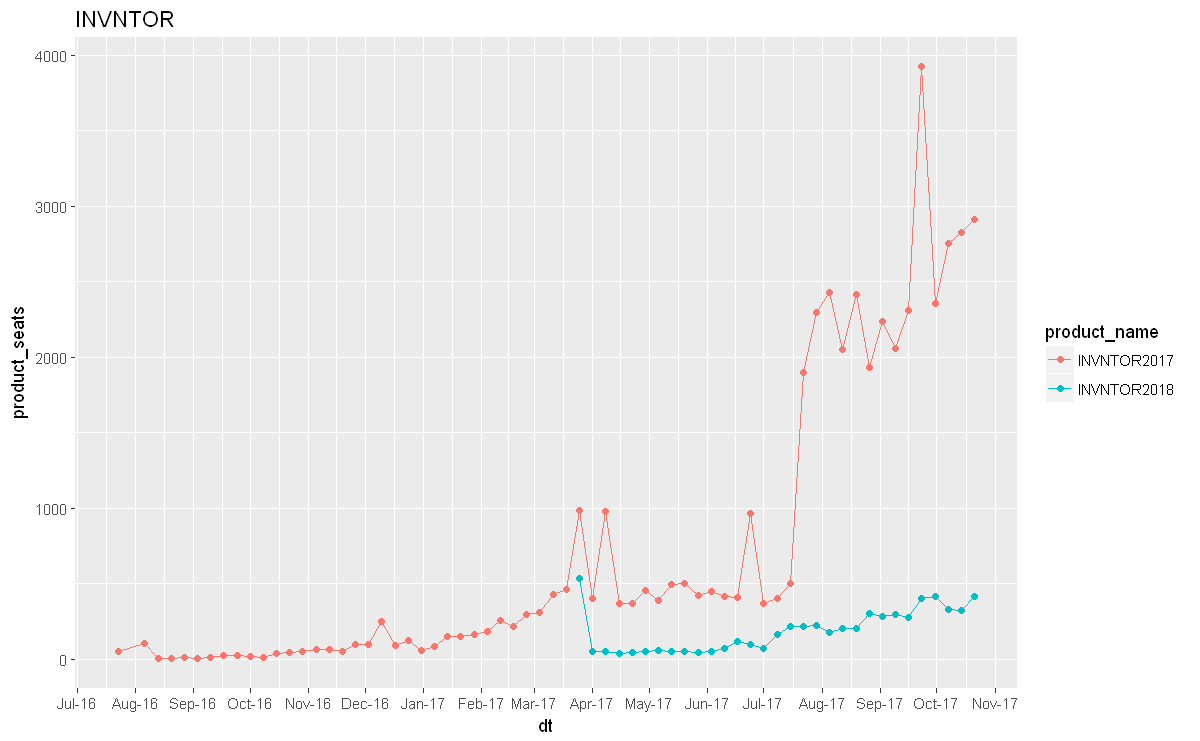


[[15]]


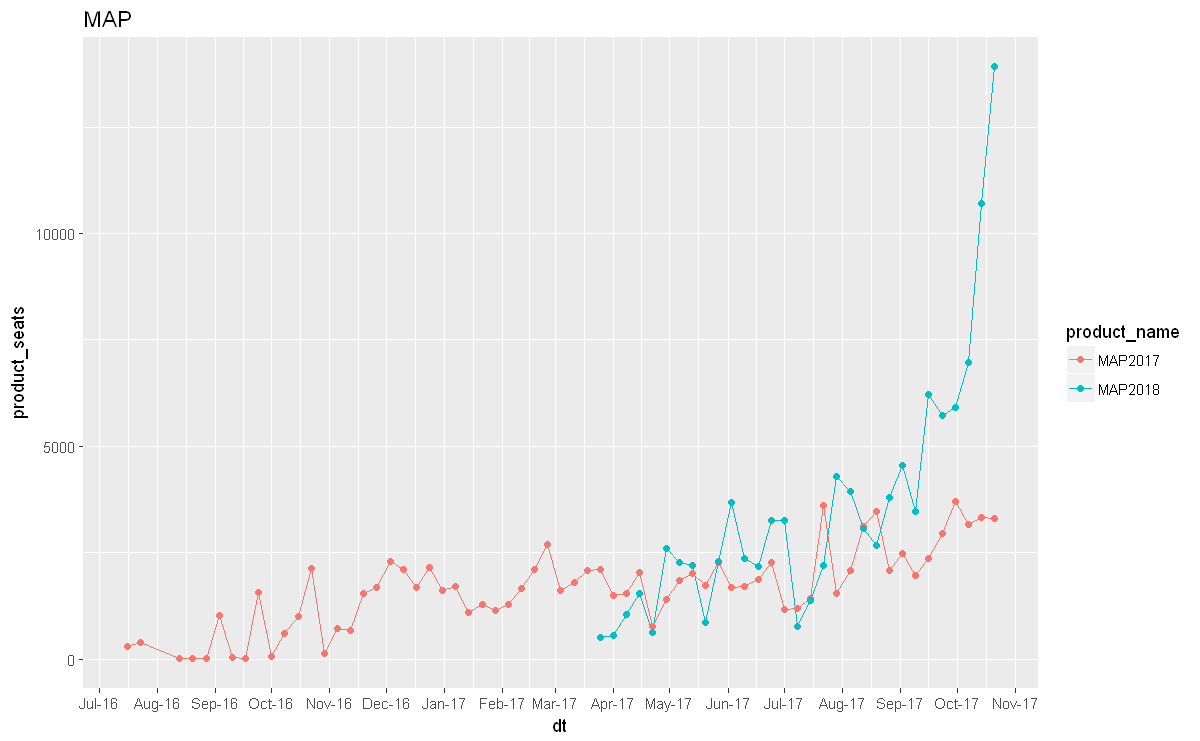


[[16]]


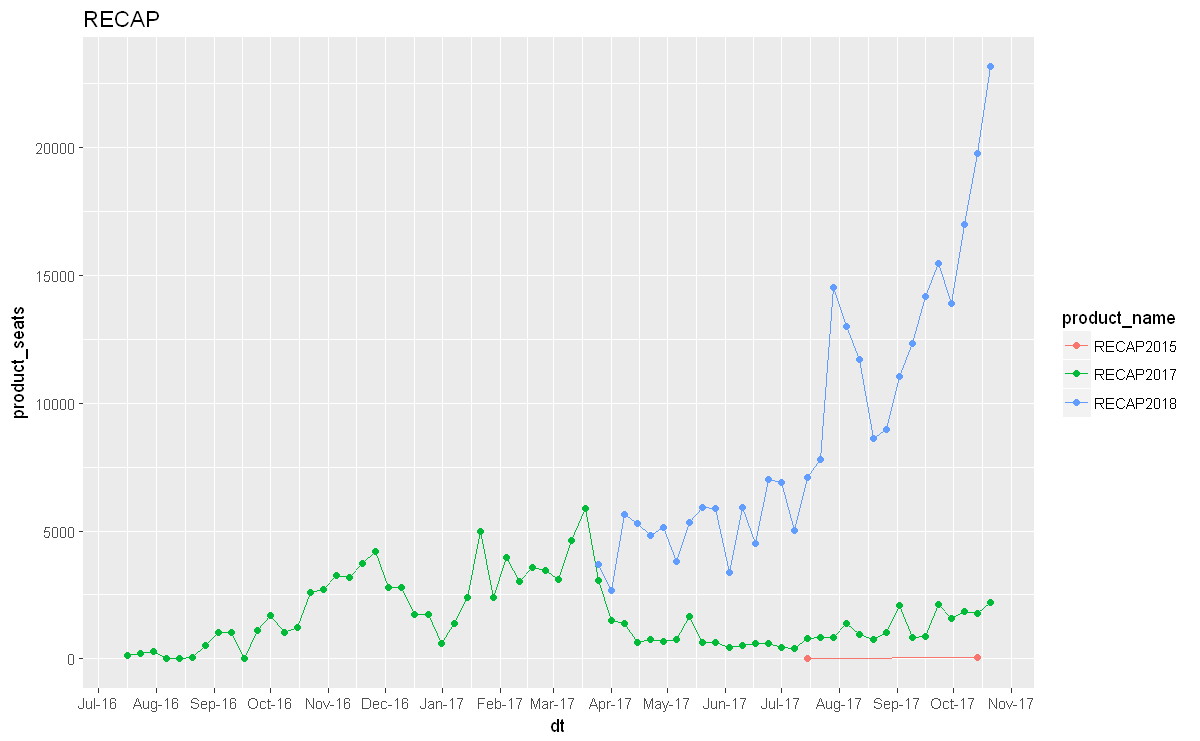


[[17]]


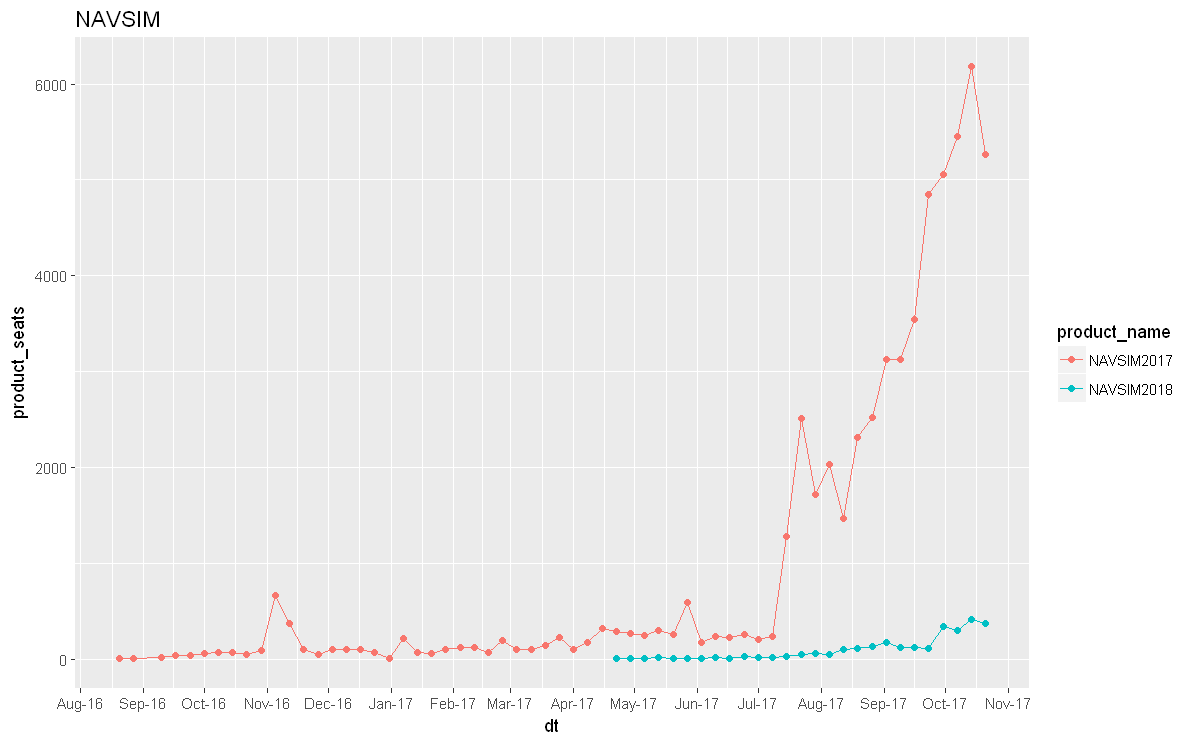

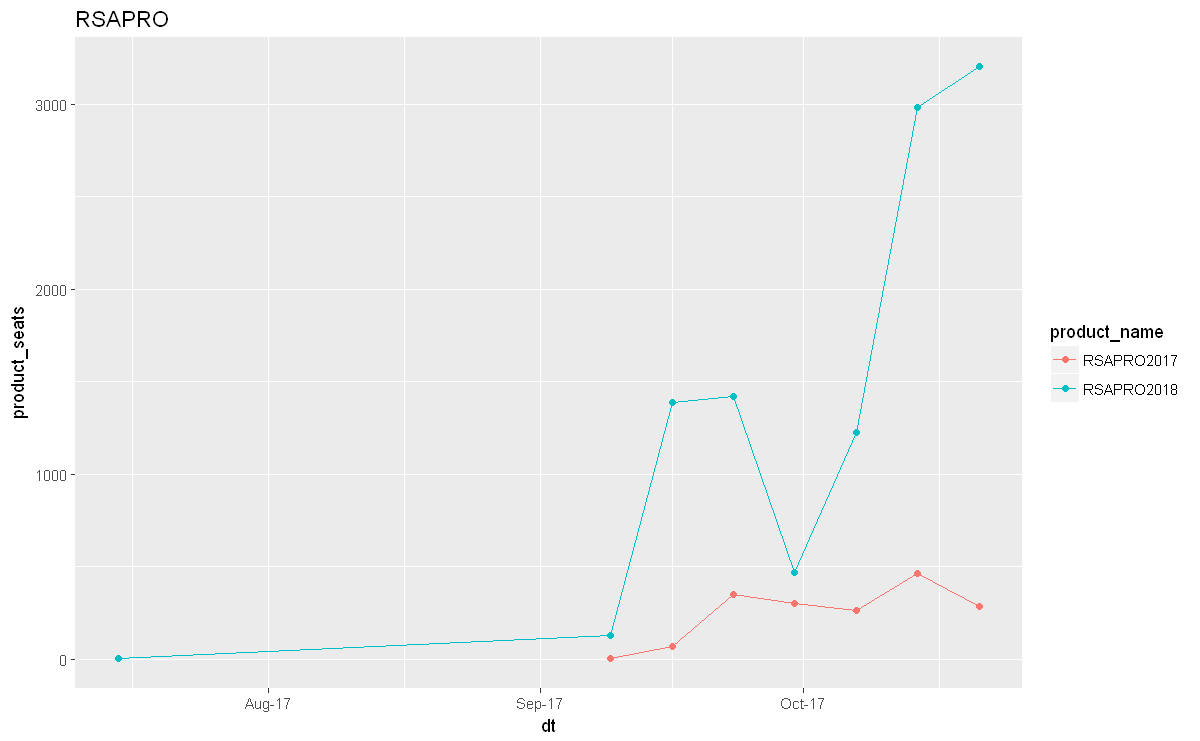

In [18]:
#number of products
#update of product in terms of number of products
seats_dt <- focus_dataset %>% 
    group_by(entitlement_id,owner_id,product_line_name,product_name,dt) %>%
    summarise(product_seats = sum(purchased_seat_quantity)) %>%
    ungroup() %>%
    group_by(product_line_name,product_name,dt) %>%
    summarise(product_seats = sum(product_seats)) %>%
    ungroup()

graph_list_seats <- list()
for(i in 1 : length(focus_product)){
    graph_list_seats[[i]] <- seats_dt %>%
        filter(product_line_name == focus_product[i]) %>%
        ggplot(mapping = aes(x = dt,y = product_seats,color = product_name)) +
        geom_line()+
        geom_point() +
        scale_x_date(breaks = date_breaks("months"), labels = date_format("%b-%y")) +
        labs(title = focus_product[i])
}
print(graph_list_seats)

### Sessions Per Seat

[[1]]

[[2]]


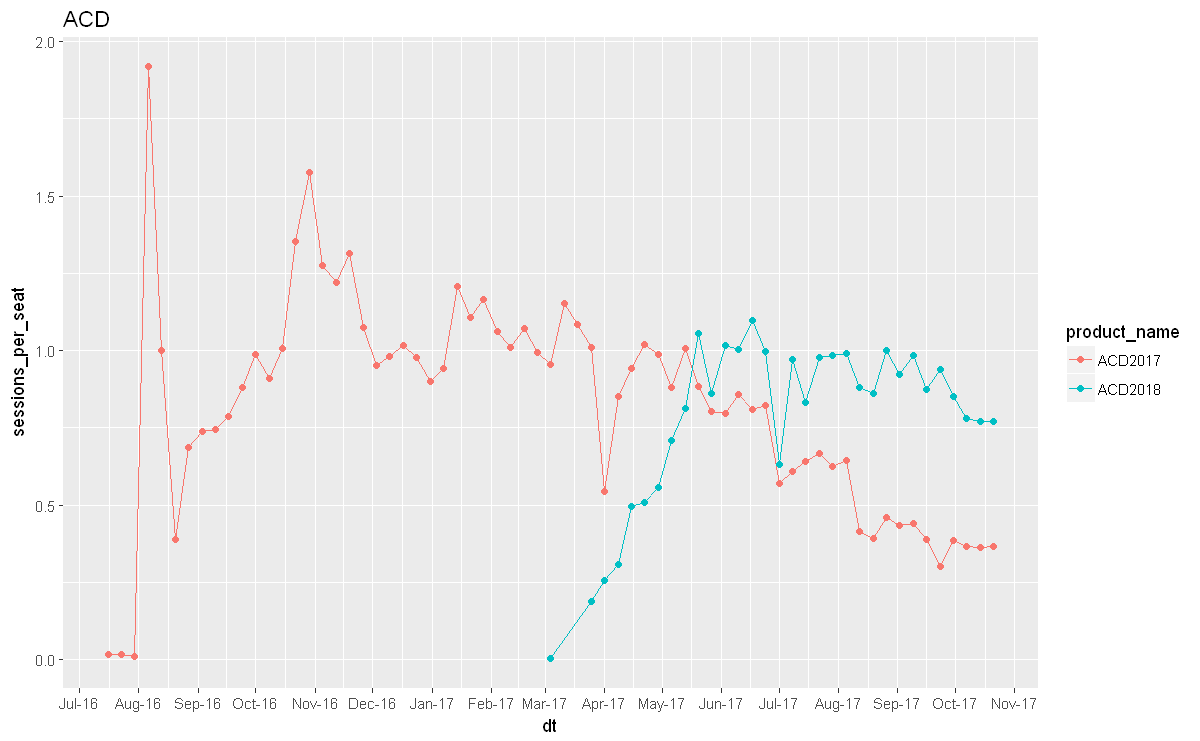


[[3]]


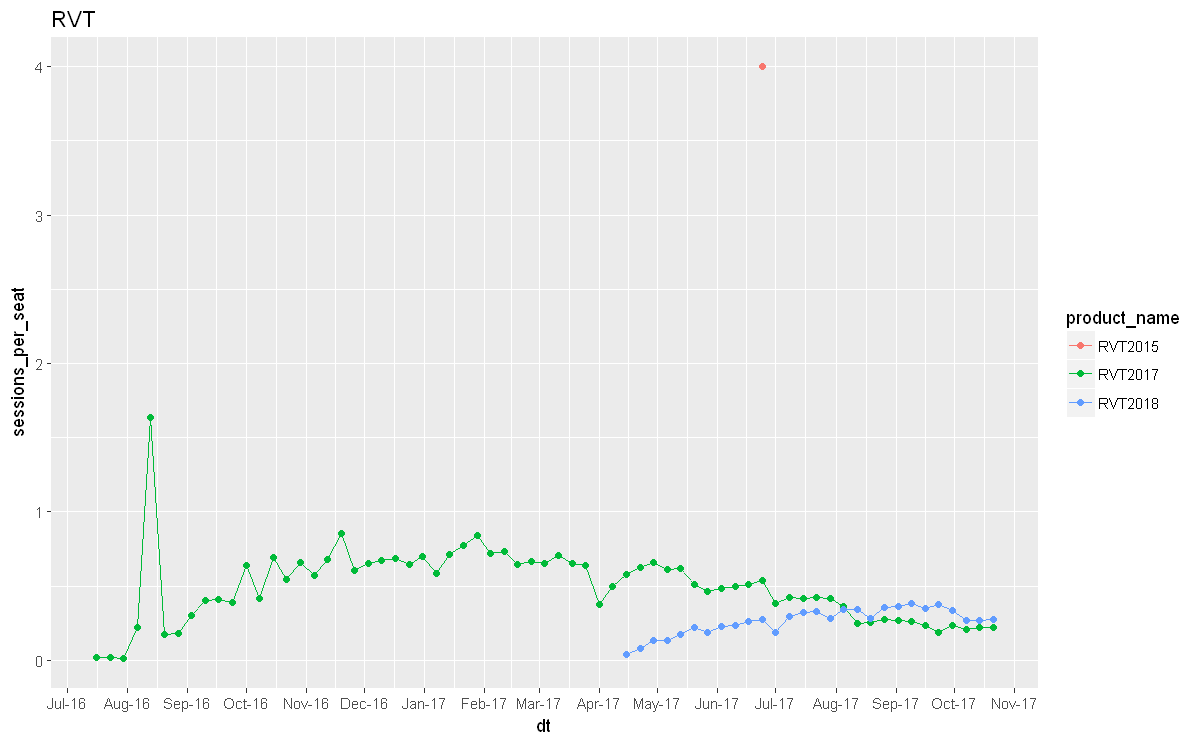


[[4]]


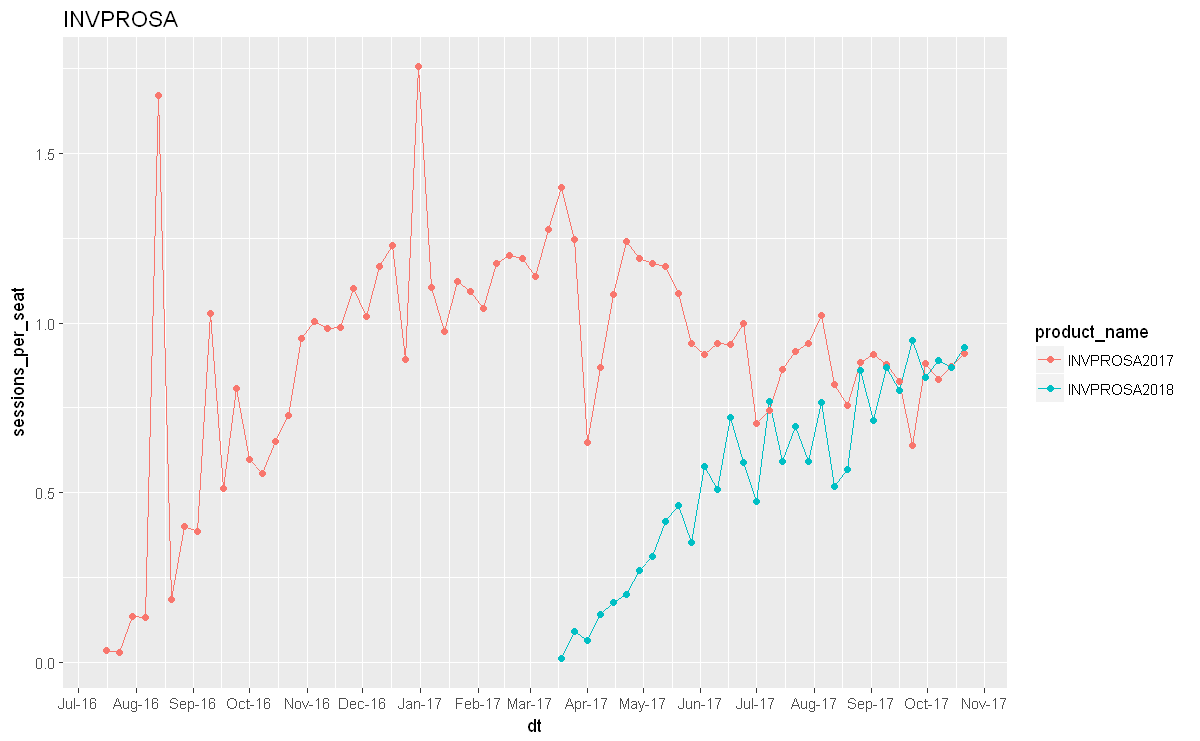


[[5]]


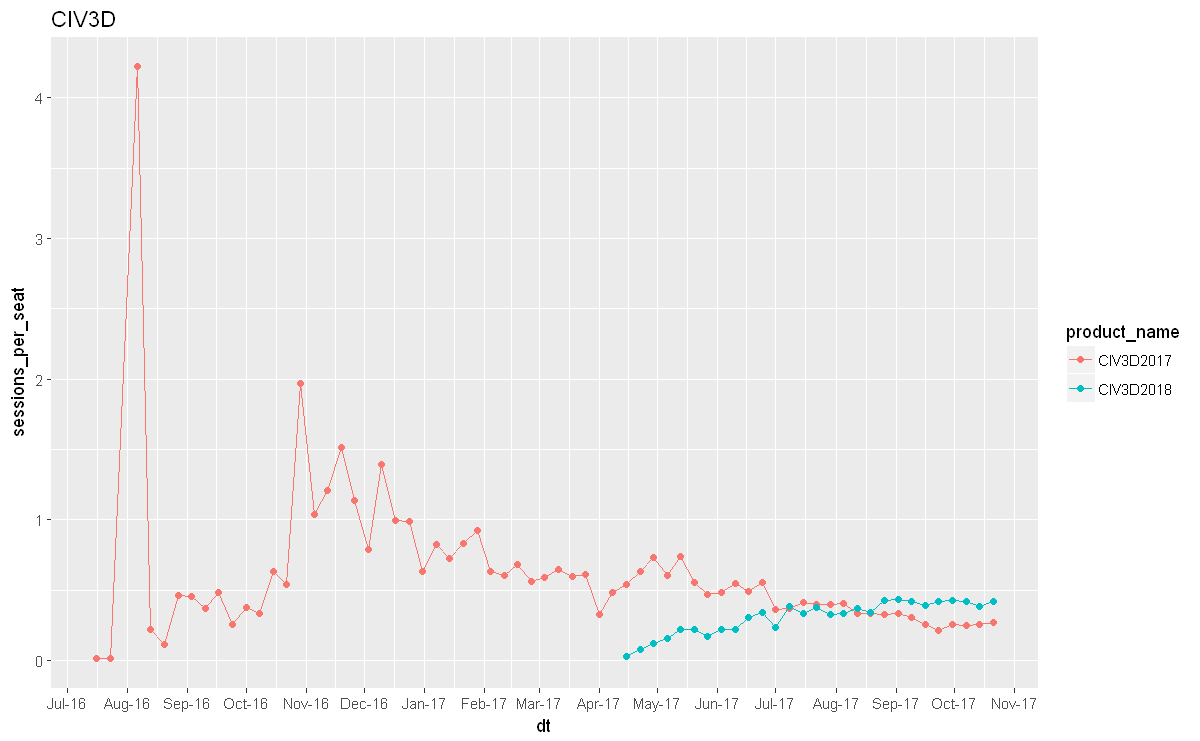


[[6]]


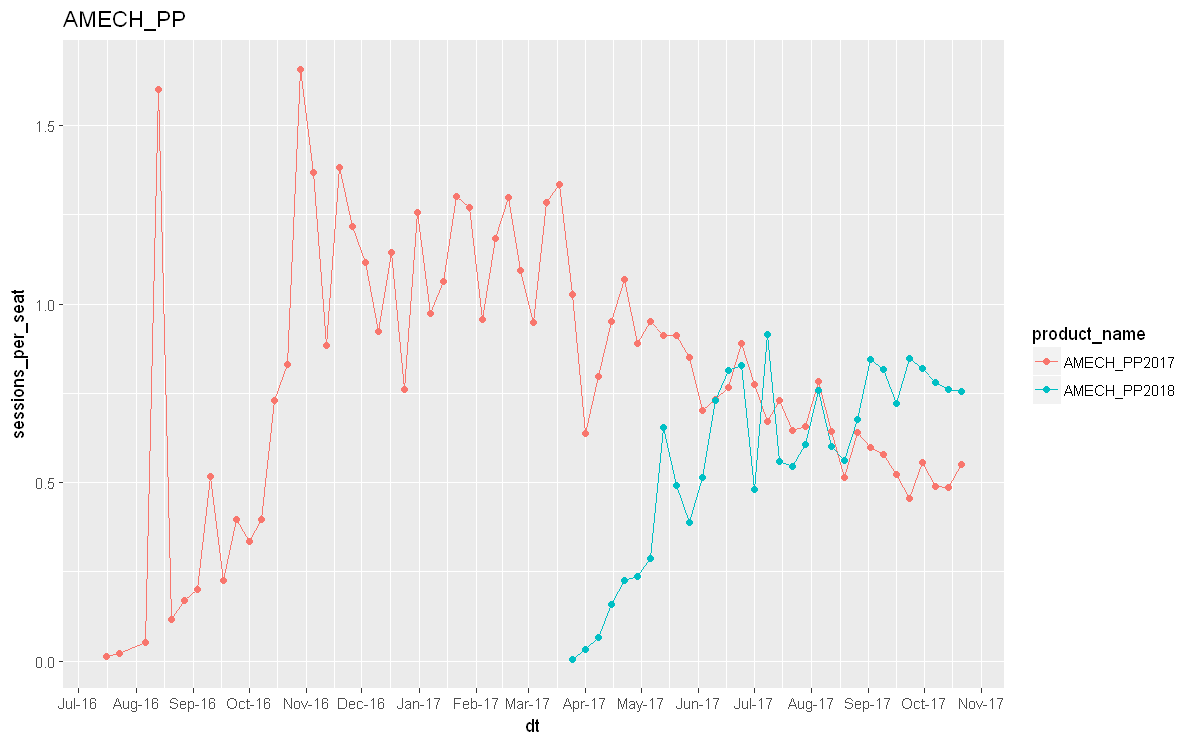


[[7]]


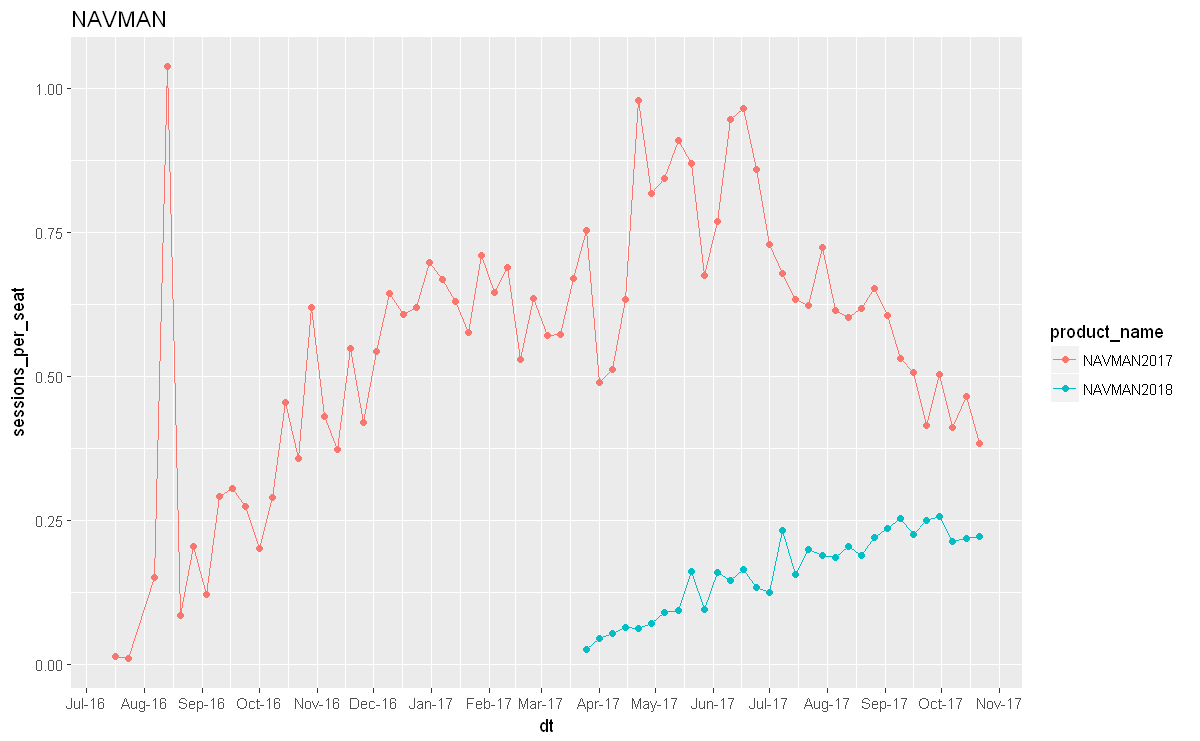


[[8]]


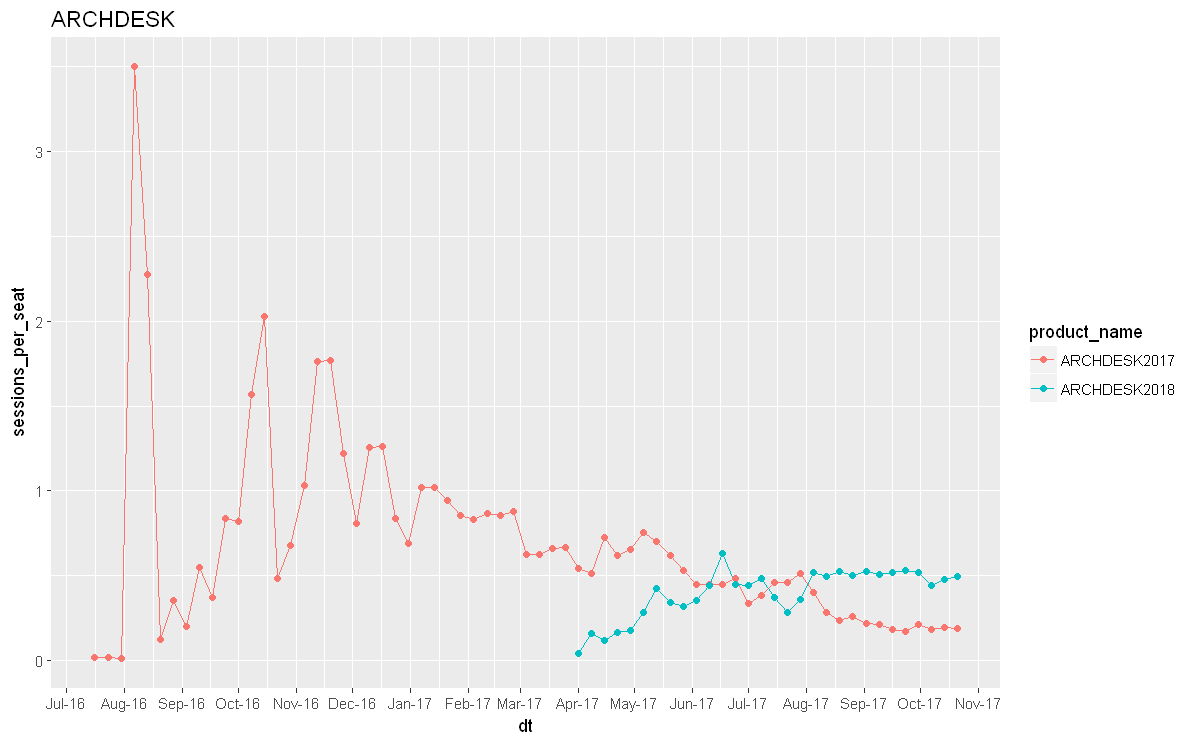


[[9]]


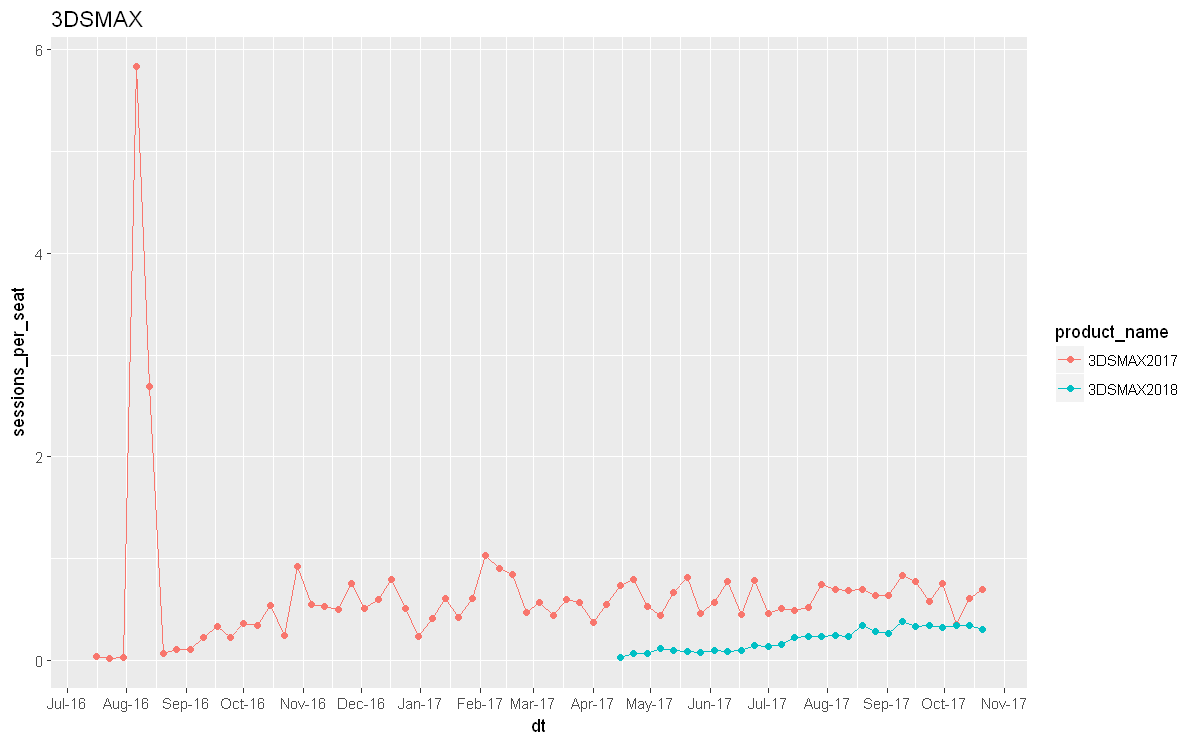


[[10]]


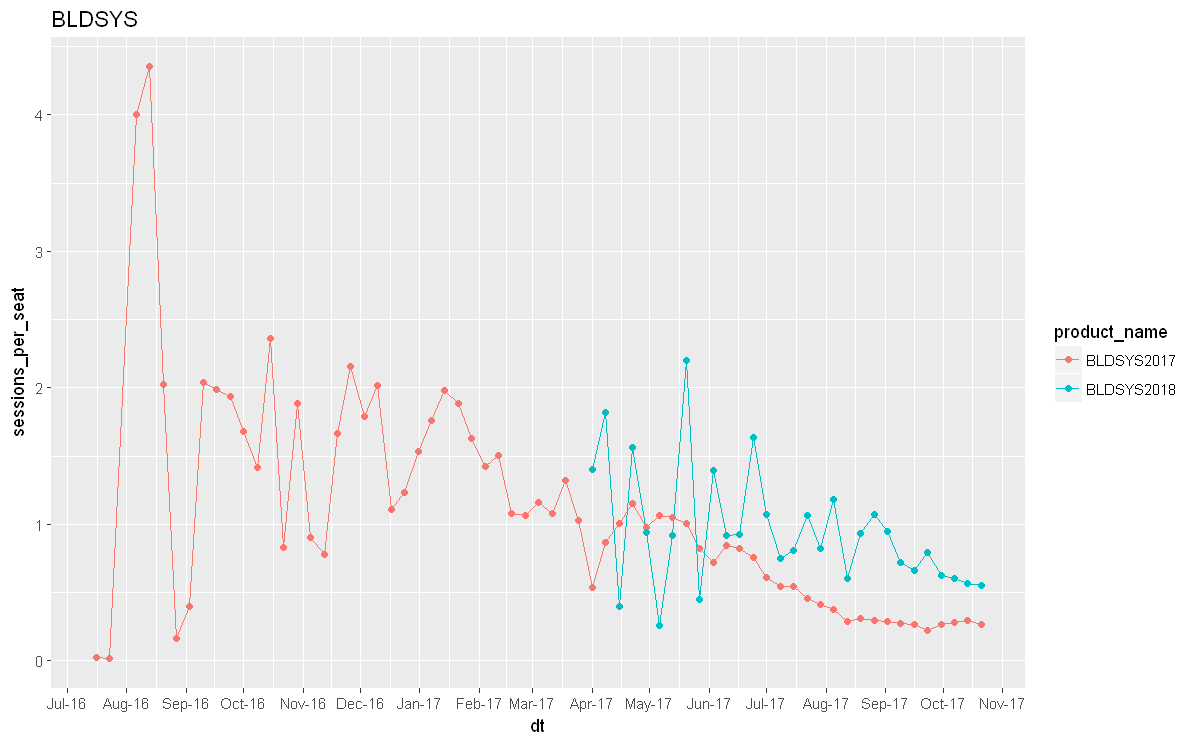


[[11]]


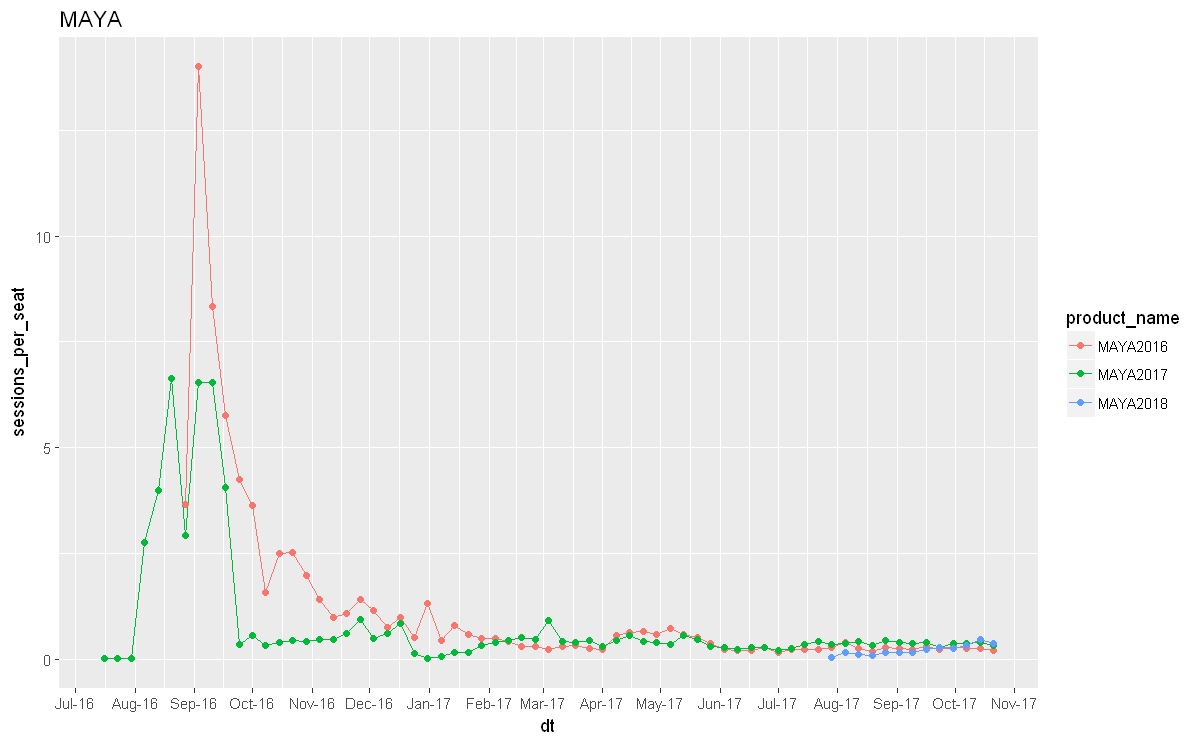


[[12]]


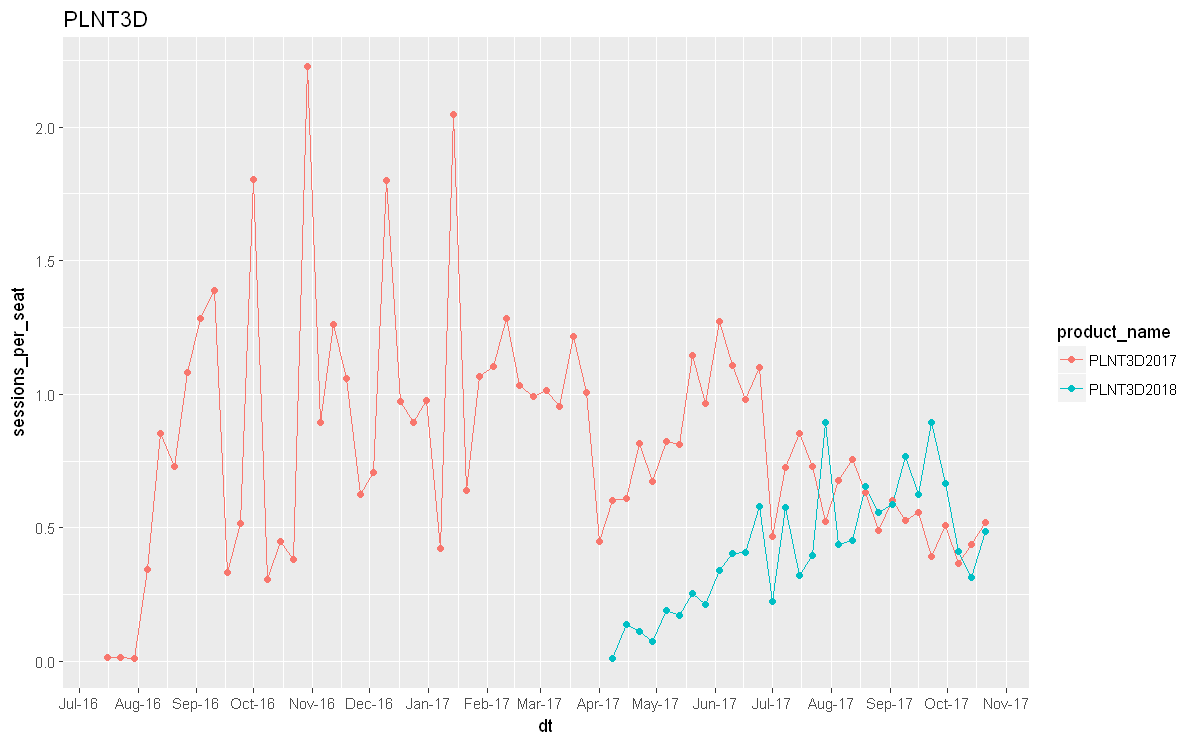


[[13]]


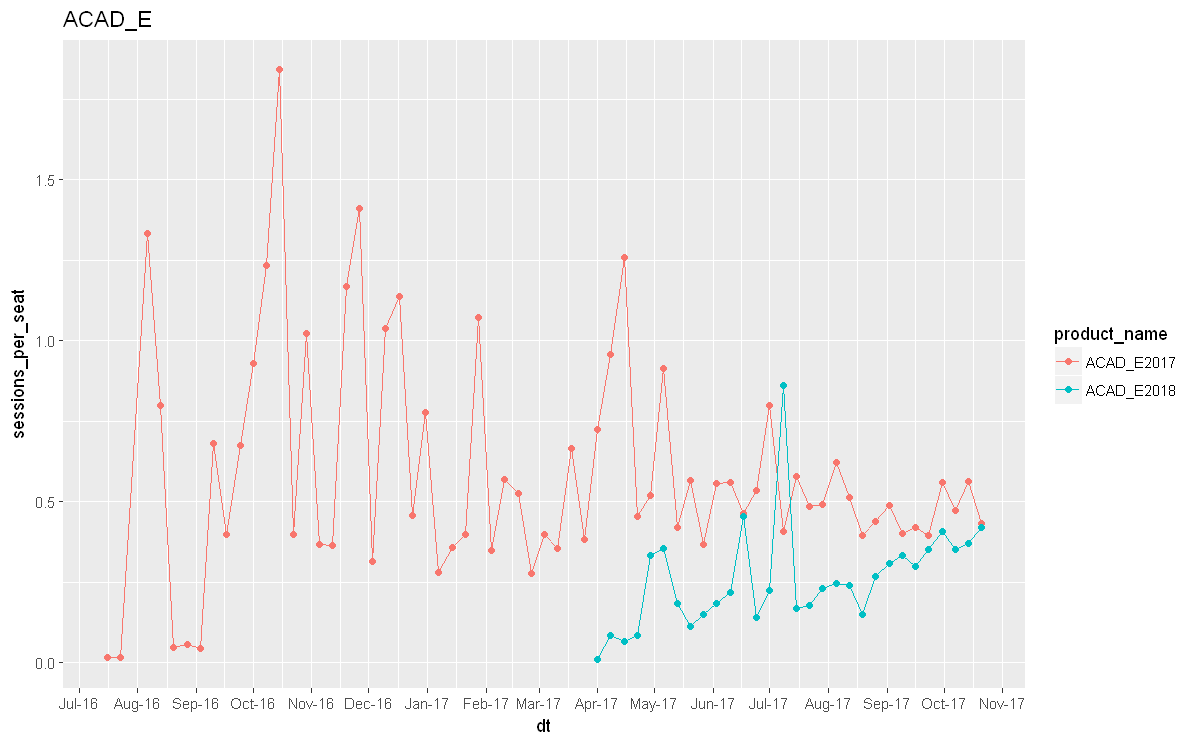


[[14]]


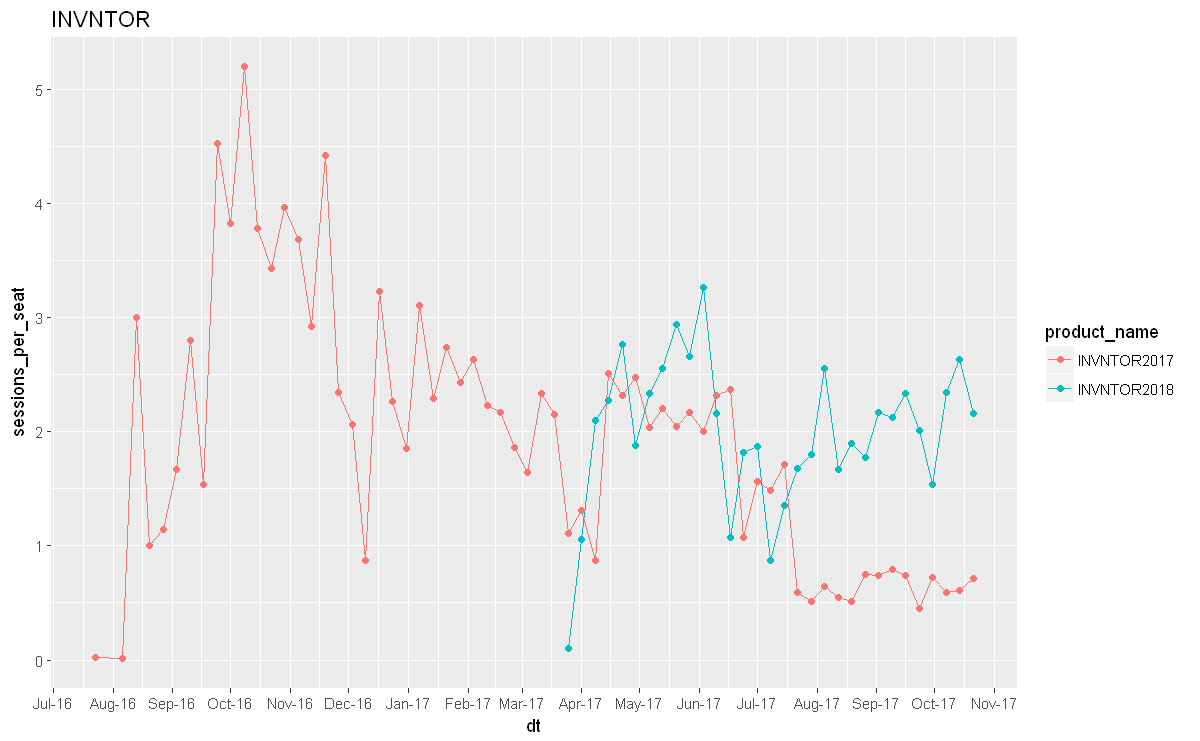


[[15]]


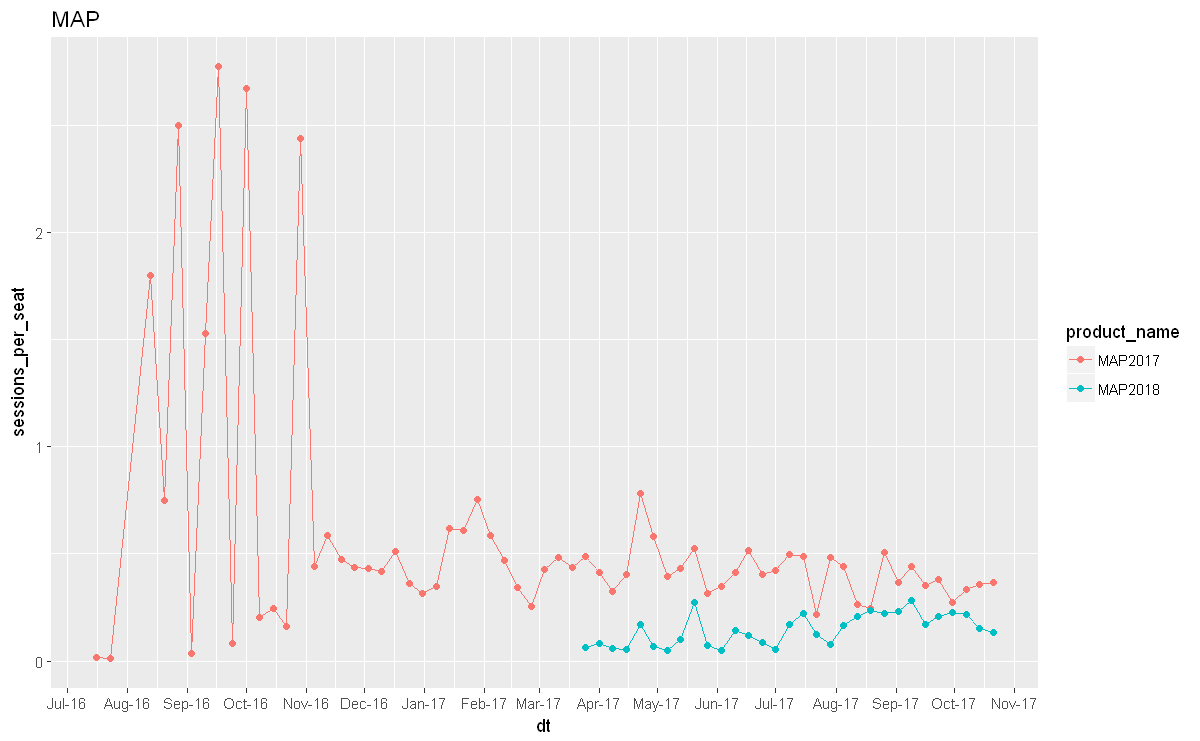


[[16]]


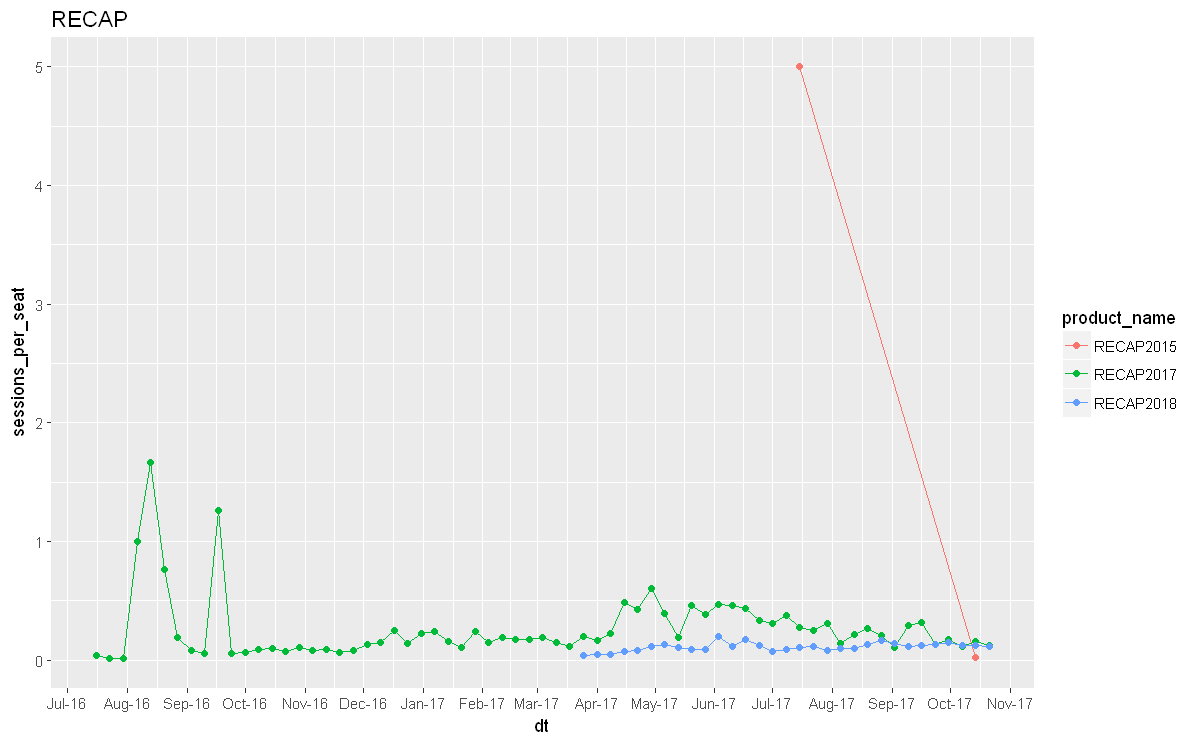


[[17]]


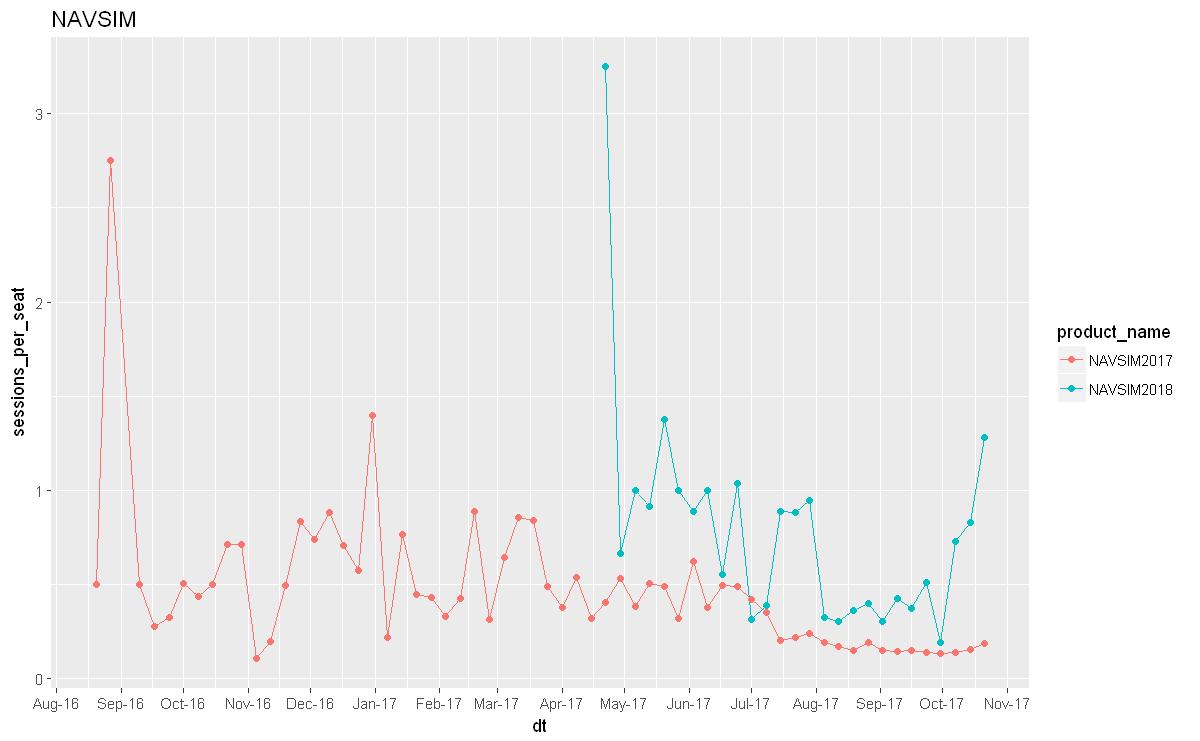

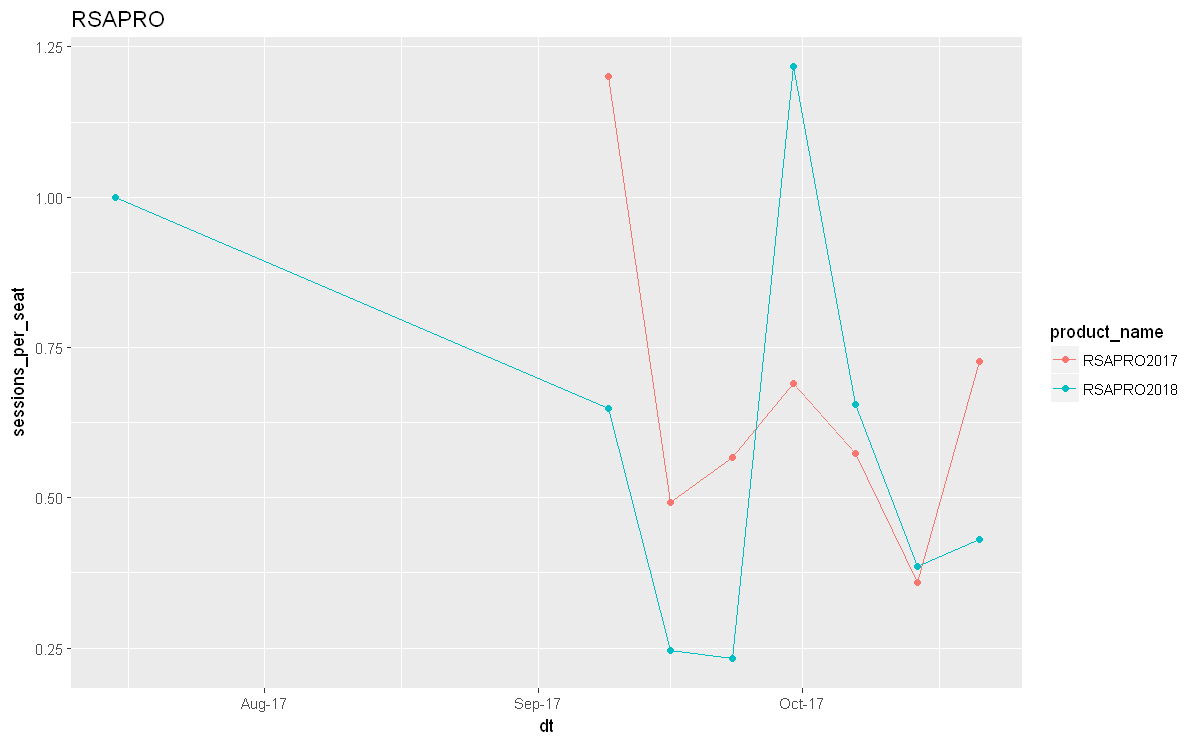

In [21]:
#sessions per seat
per_dt <- focus_dataset %>% 
    group_by(entitlement_id,owner_id,product_line_name,product_name,dt) %>%
    summarise(product_seats = sum(purchased_seat_quantity),
             product_sessions = sum(sessions)) %>%
    ungroup() %>%
    group_by(product_line_name,product_name,dt) %>%
    summarise(product_seats = sum(product_seats),
             product_sessions = sum(product_sessions)) %>%
    ungroup() %>%
    mutate(sessions_per_seat = product_sessions/product_seats)

graph_list_per <- list()
for(i in 1 : length(focus_product)){
    graph_list_per[[i]] <- per_dt %>%
        filter(product_line_name == focus_product[i]) %>%
        ggplot(mapping = aes(x = dt,y = sessions_per_seat,color = product_name)) +
        geom_line()+
        geom_point() +
        scale_x_date(breaks = date_breaks("months"), labels = date_format("%b-%y")) +
        labs(title = focus_product[i])
}
print(graph_list_per)

### Sessions Per Seat
### Obersevations
* When new versions are available, it usually takes 2 to 5 months for sessions per seat to converge.(Judging visually)

| Product  | Months for converging |
| ------------- | ------------- |
|  ACD | 2  |
| RVT  | 4.25  |
|  INVPROSA | 4.25  |
| CIV3D  |  3 |
| AMECH_PP  | 2.75  |
| NAVMAN  |  more than 8 |
| ARCHDESK  |  2.5 |
|  3DSMAX | more than 7  |
| BLDSYS  | -  |
| MAYA  |  - |
| PLNT3D  | 4.25  |
|  ACAD_E | 3.5  |
| INVNTOR  | 0.5  |
| MAP  |  5.5 |
|  RECAP |  5 |
|  NAVSIM | 0  |
|  RSAPRO | -  |

### product seats ratio

[[1]]

[[2]]


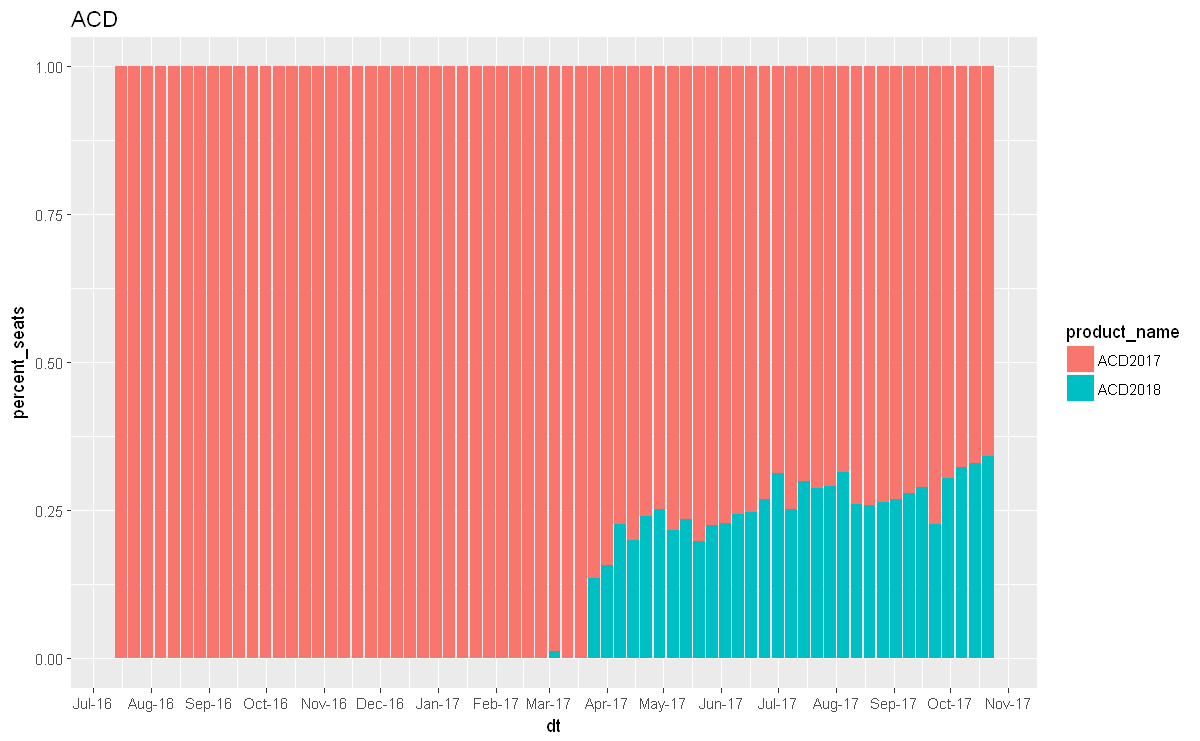


[[3]]


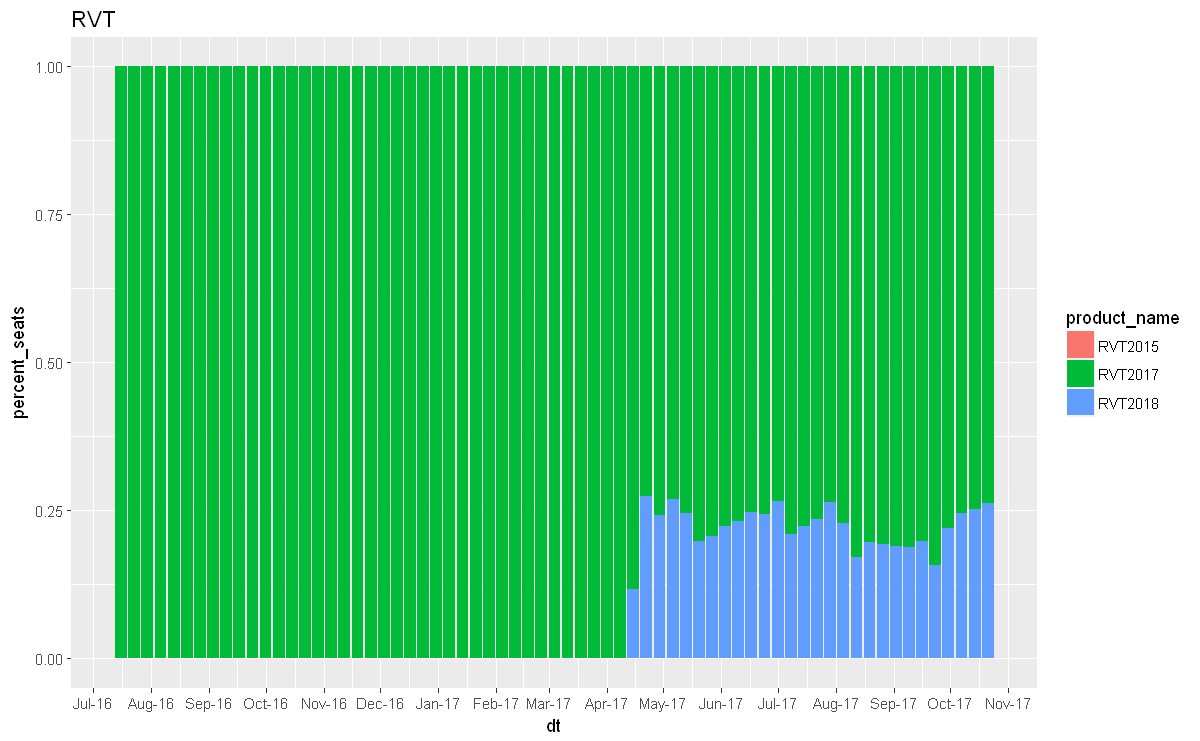


[[4]]


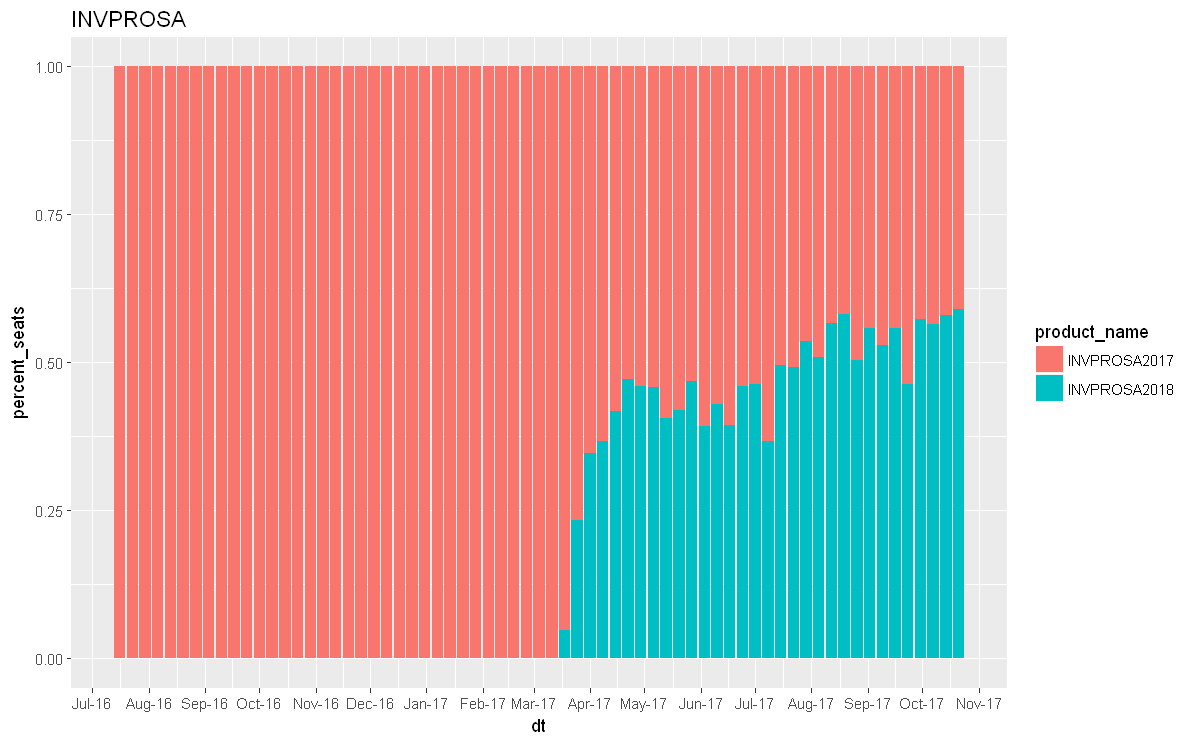


[[5]]


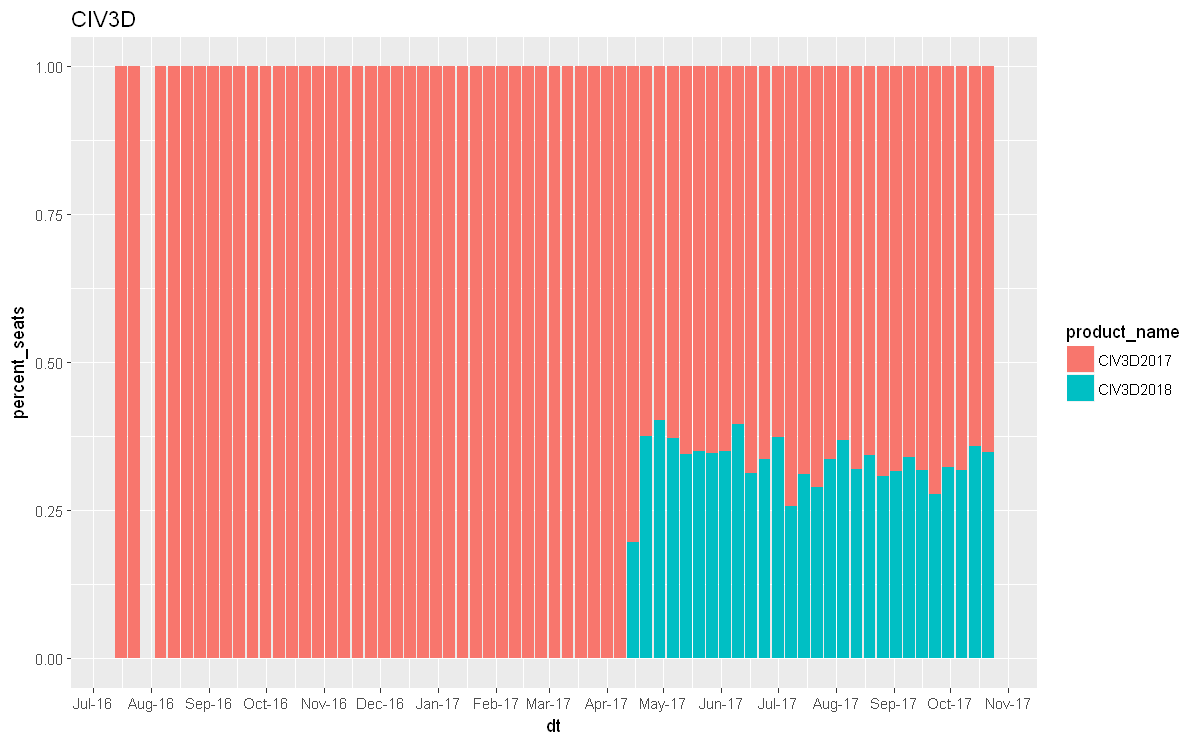


[[6]]


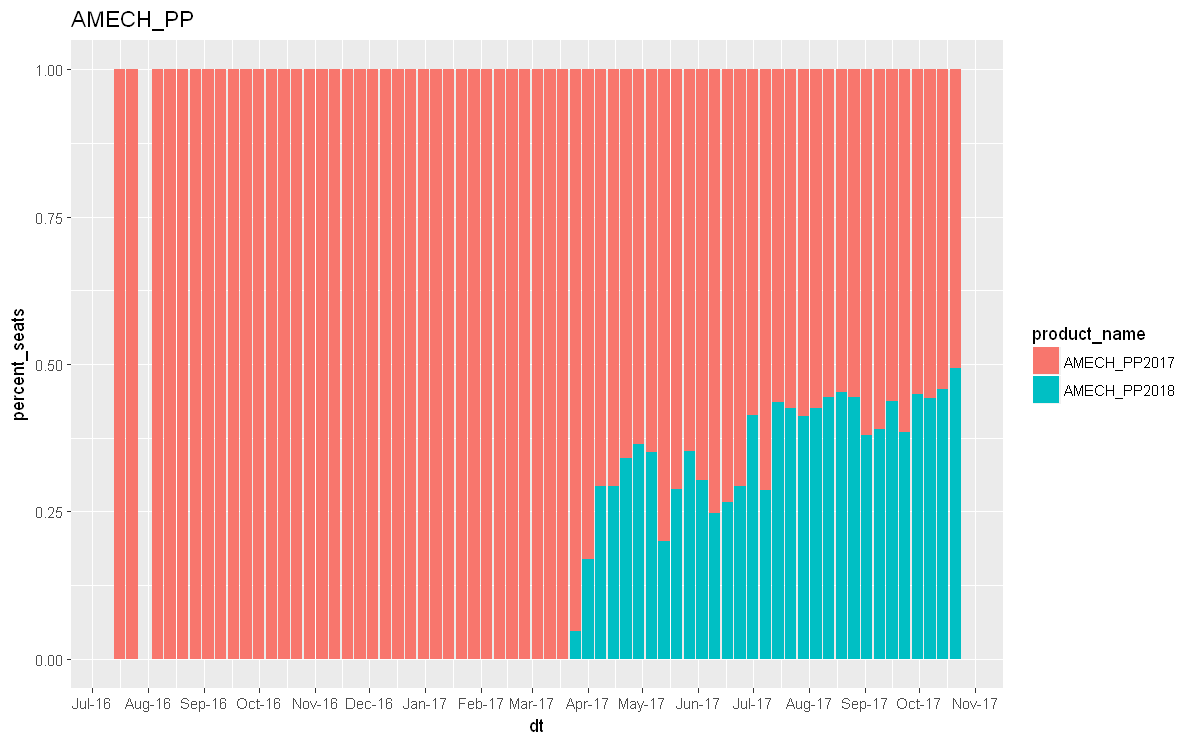


[[7]]


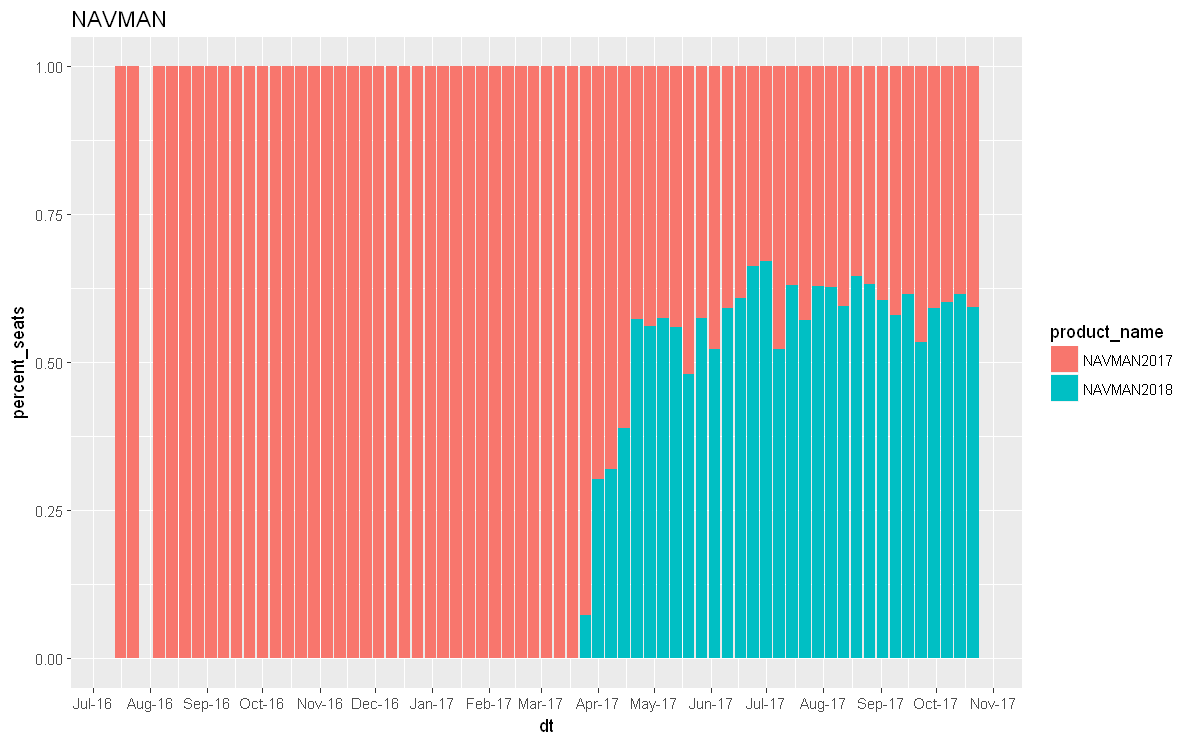


[[8]]


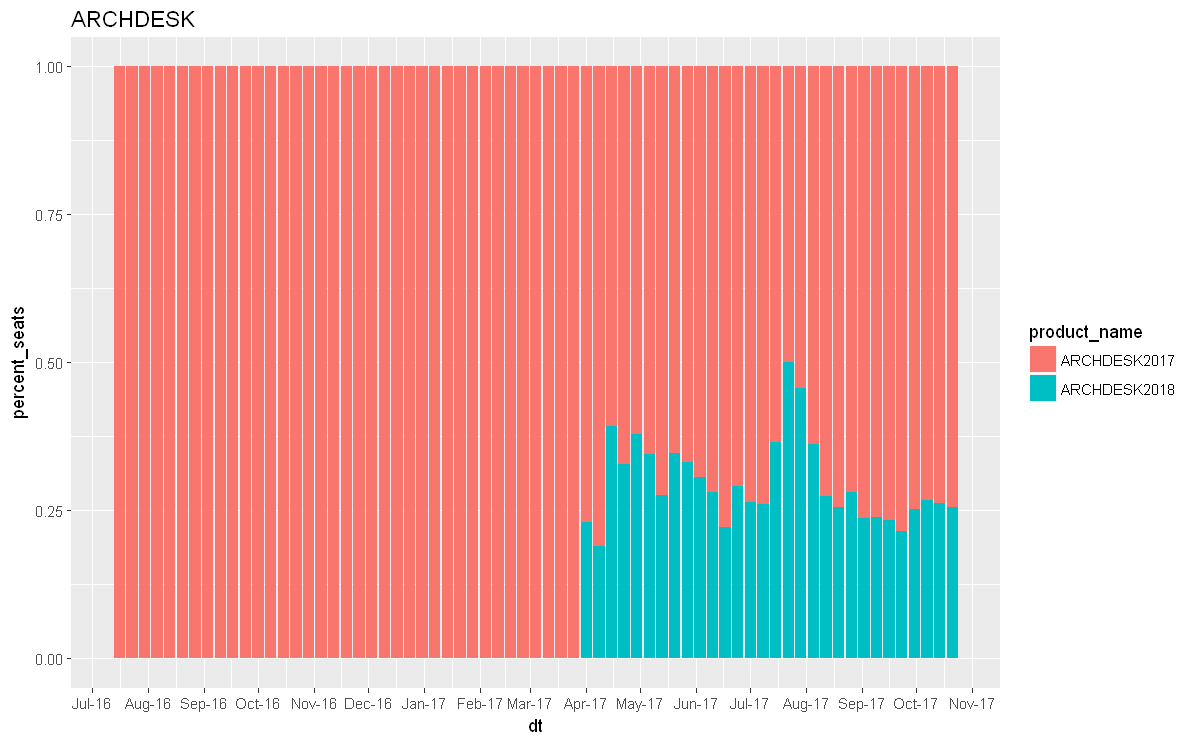


[[9]]


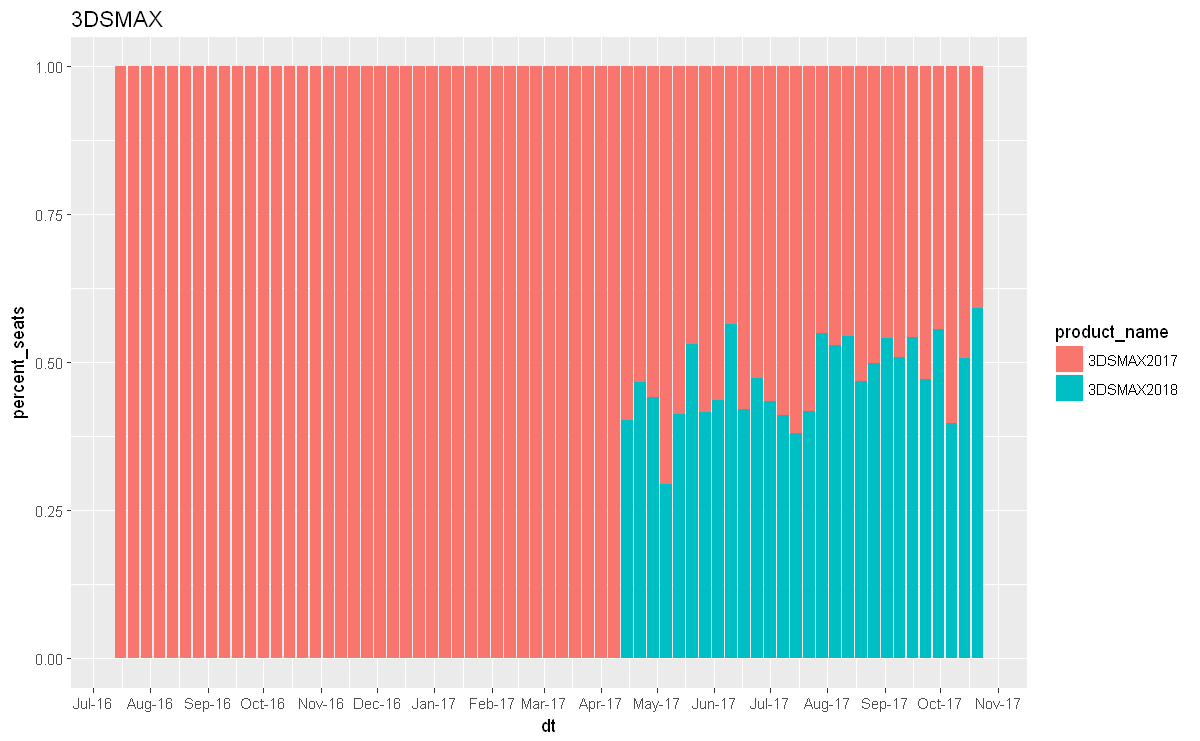


[[10]]


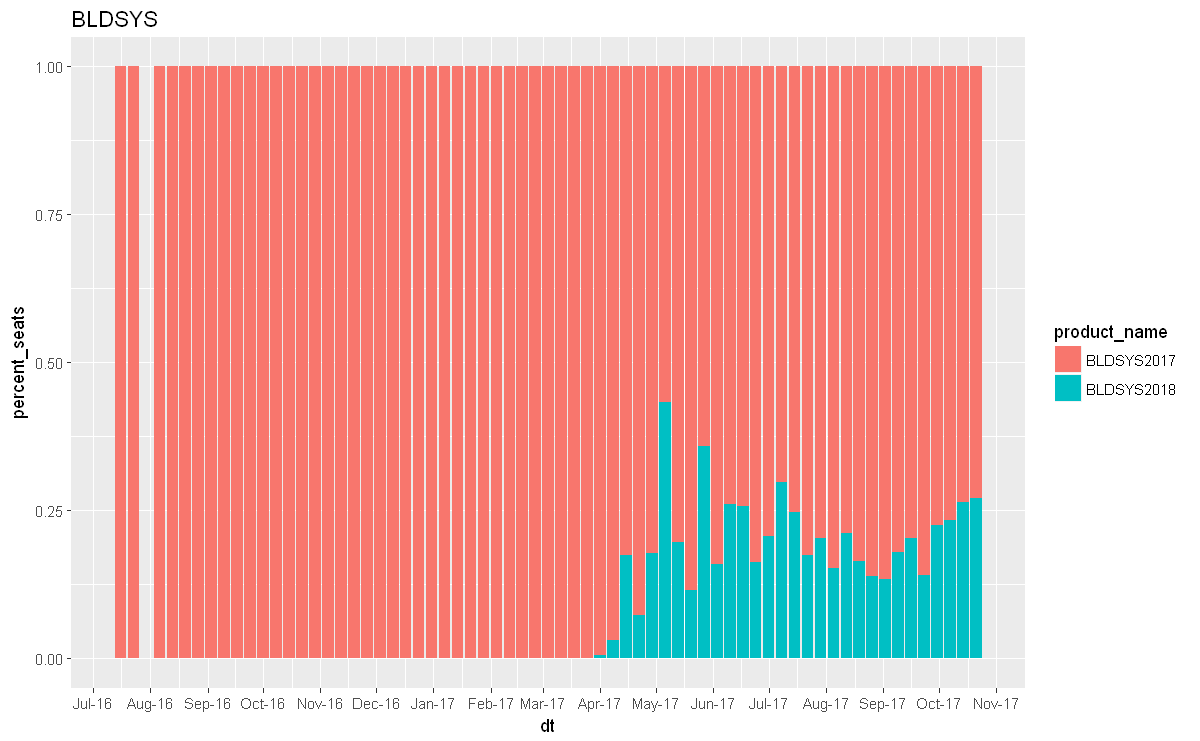


[[11]]


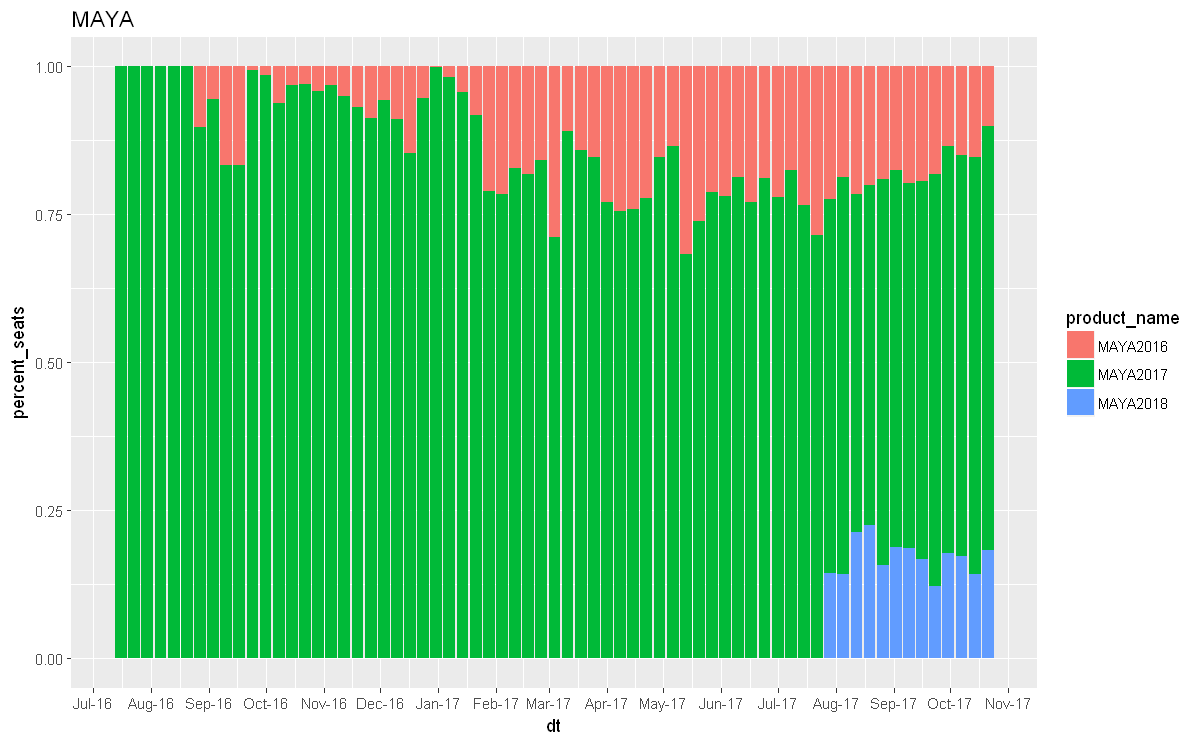


[[12]]


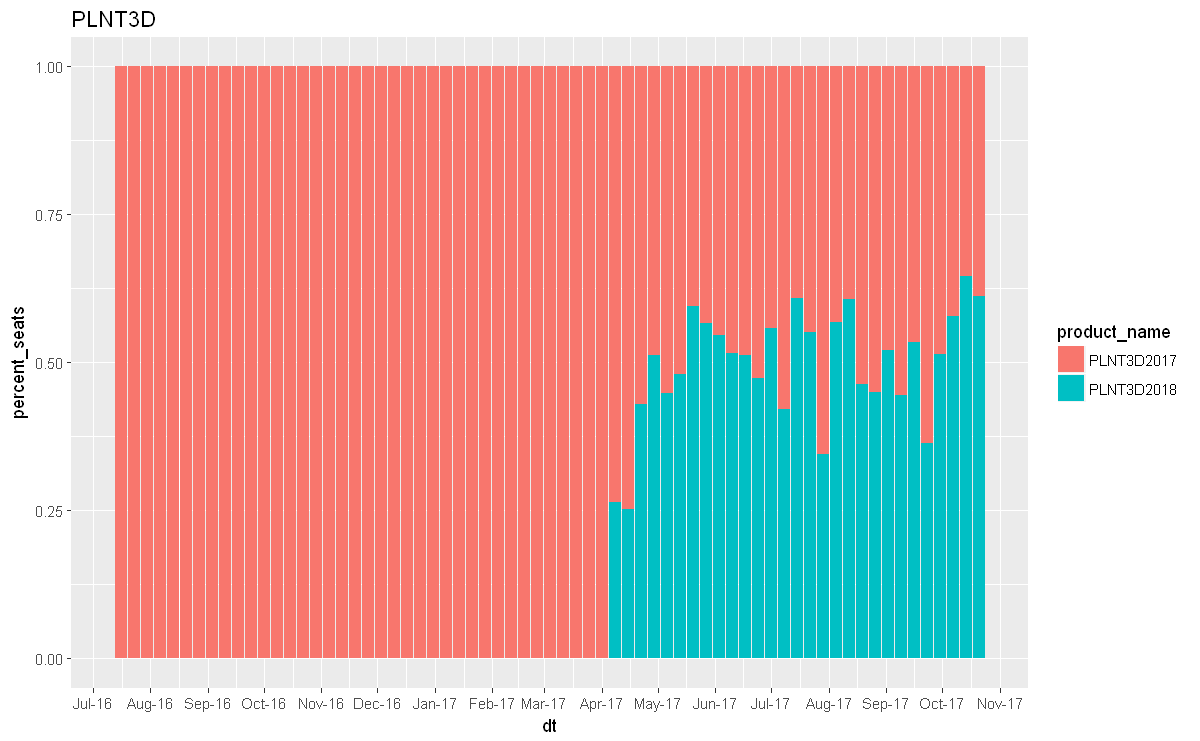


[[13]]


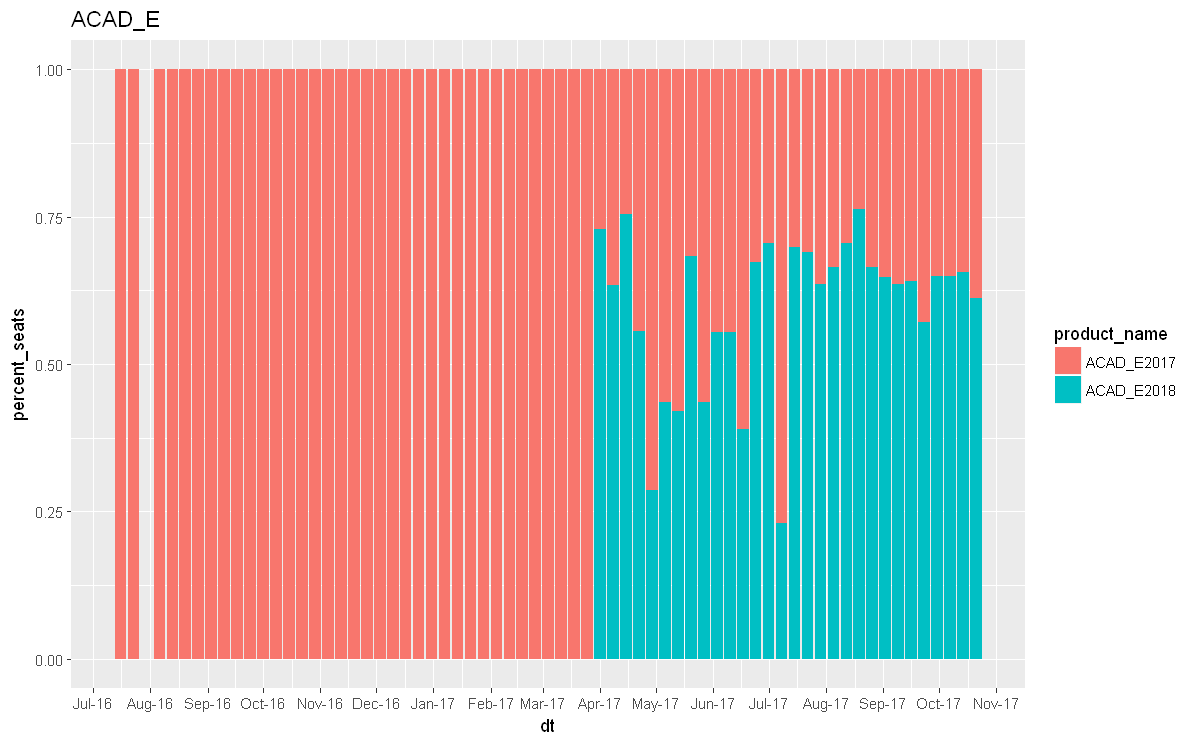


[[14]]


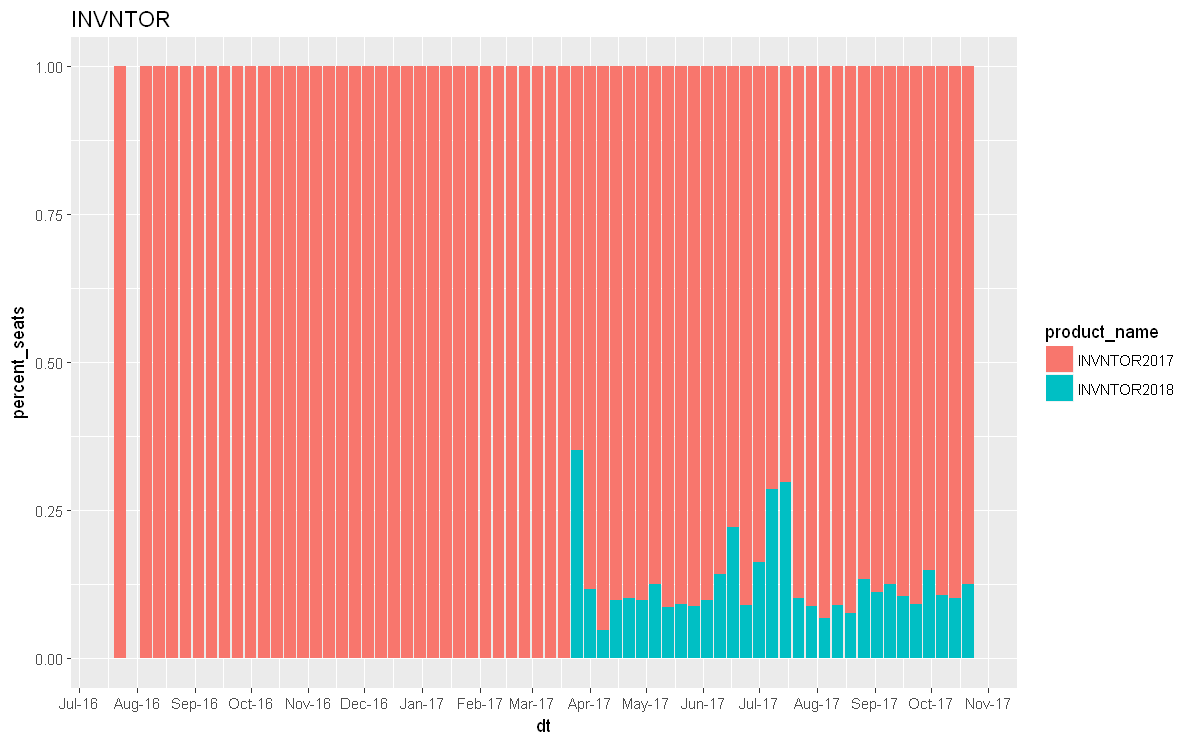


[[15]]


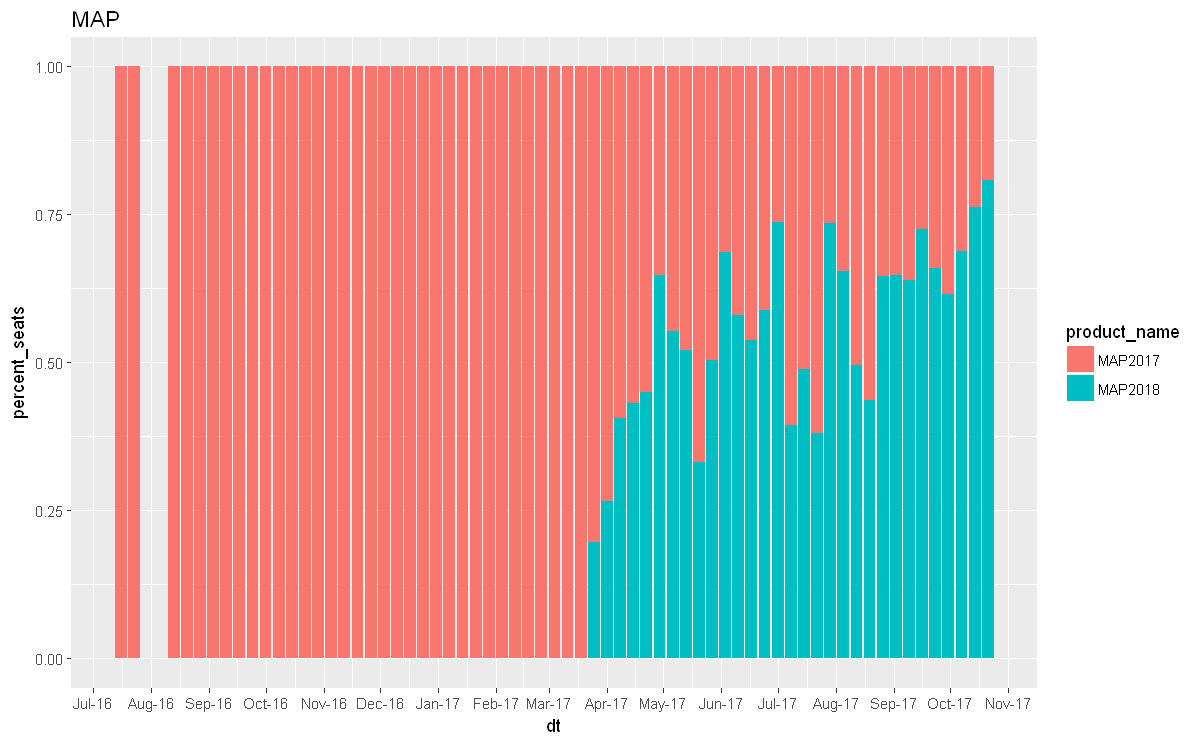


[[16]]


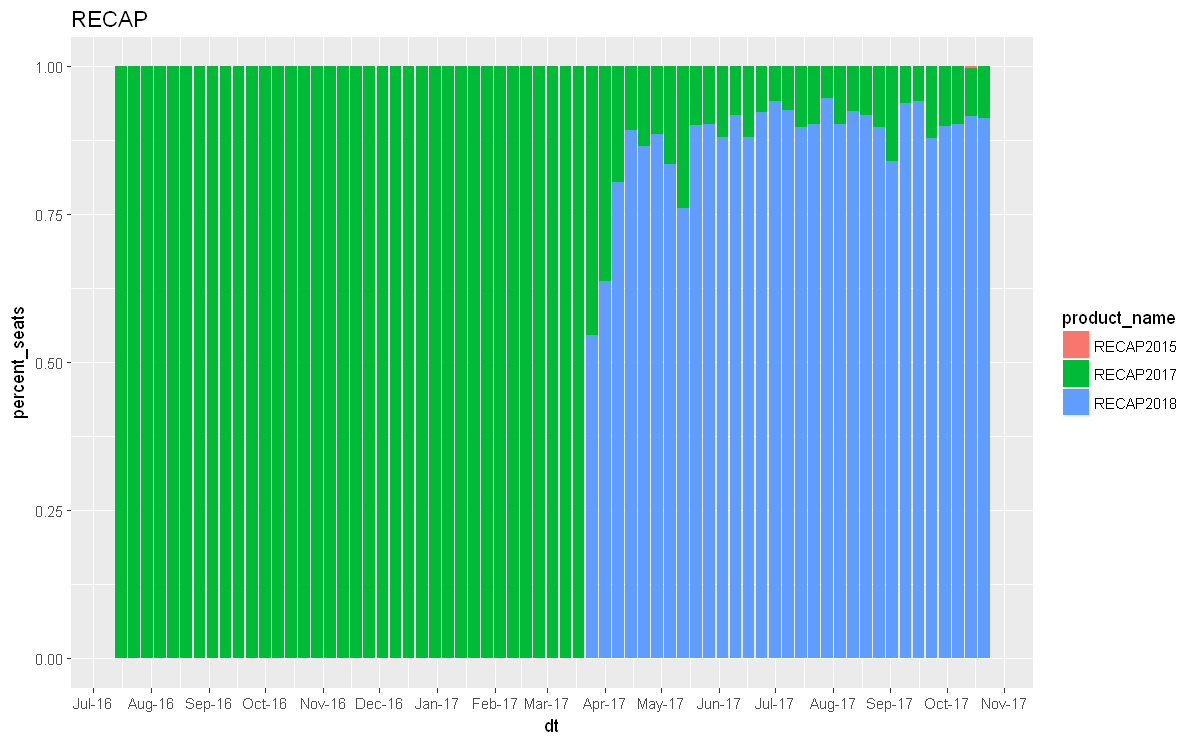


[[17]]


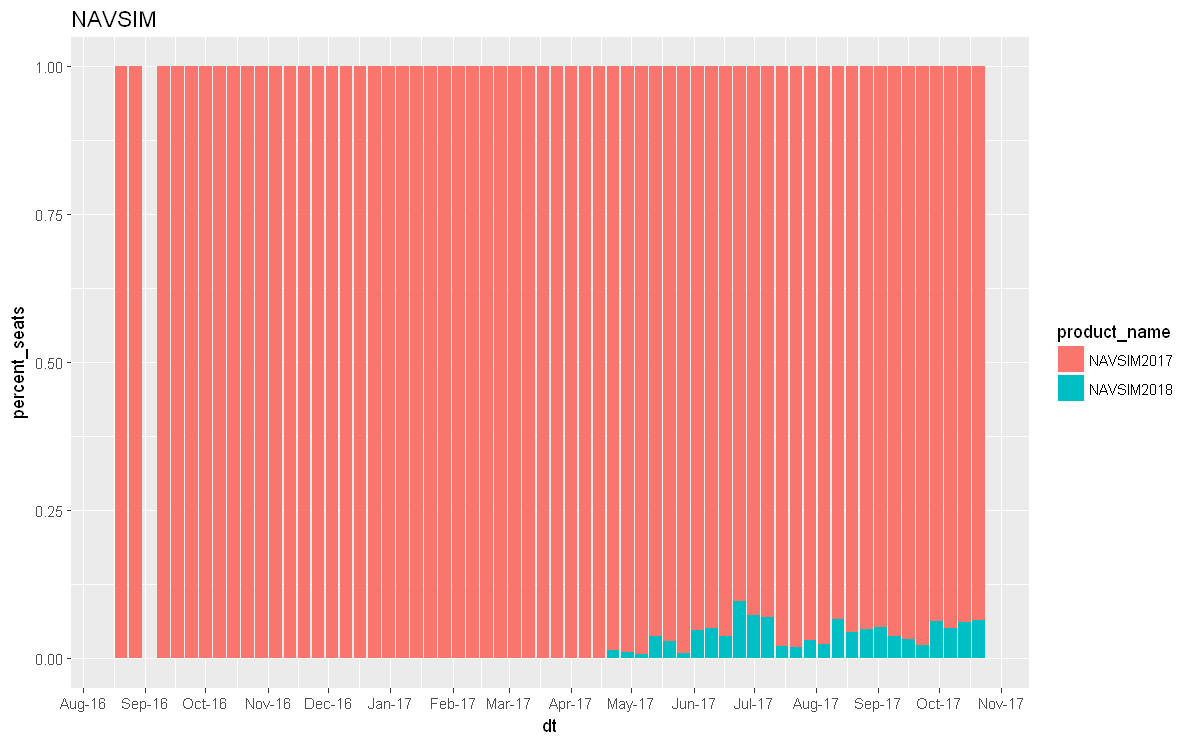

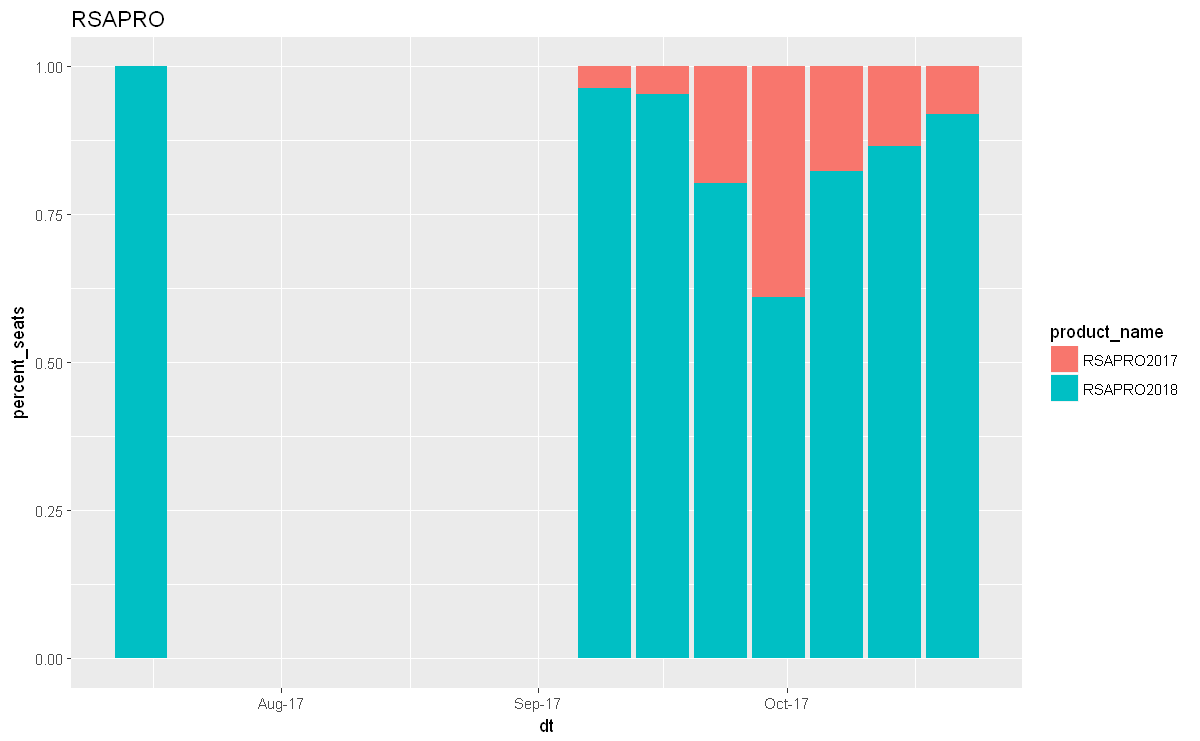

In [23]:
#product seats ratio
seats_ratio_dt <- dataset %>% 
    group_by(entitlement_id,owner_id,product_line_name,product_name,dt) %>%
    summarise(product_seats = sum(purchased_seat_quantity)) %>%
    ungroup() %>%
    group_by(product_line_name,product_name,dt) %>%
    summarise(product_seats = sum(product_seats)) %>%
    ungroup() %>%
    group_by(product_line_name, dt) %>%
    mutate(total_seats_all_versions = sum(product_seats)) %>%
    ungroup() %>%
    mutate(percent_seats = product_seats/total_seats_all_versions)

graph_list_ratio <- list()
for(i in 1 : length(focus_product)){
    graph_list_ratio[[i]] <- seats_ratio_dt %>%
        filter(product_line_name == focus_product[i]) %>%
        ggplot(mapping = aes(x = dt,y = percent_seats,fill = product_name)) +
        geom_col(position = "stack") +
        scale_x_date(breaks = date_breaks("months"), labels = date_format("%b-%y")) +
        labs(title = focus_product[i])
}
print(graph_list_ratio)

### product seats ratio
### Observations
* For companies which upgrades, most companies upgrade to new versions within the first month. And the ratio of upgrades increases slightly or stay steady.
* The ratio of companies which upgrades are between 10% to 90%. 
* For most popular products, the ratio are between 25% to 50% percent.

| Product  | Time reach steay status(Month) |Steady Ratio|Treand afterwards|
| ------------- | ------------- |---------|-----------|
|  ACD | 1  |25%|increase|
| RVT  | 0.5  |25%|steady|
|  INVPROSA | 1.5  |50%|increase|
| CIV3D  |  0.5 |30%|steady|
| AMECH_PP  | 1.25  |30%|increase|
| NAVMAN  |  1.25 |60%|steady|
| ARCHDESK  |  1 |35%|decrease|
|  3DSMAX | 0.5  |50%|increase|
| BLDSYS  | 3  |25%|steady|
| MAYA  |  - |-|-|
| PLNT3D  | 1.75  |60%|steady|
|  ACAD_E | 4  |70%|steady|
| INVNTOR  | 4  |13%|steady|
| MAP  |  2 |50%|increase|
|  RECAP |  1 |90%|steady|
|  NAVSIM | 2  |10%|steady|
|  RSAPRO | -  |-|-|

### Do people use different versions at the same time(based on account_uuid)

In [36]:
compared_dataset <- focus_dataset %>%
    distinct(account_uuid,dt,product_line_name,product_name,sessions,product_line_code)

diff_version1 <- compared_dataset %>%
    group_by(account_uuid,product_line_name,dt,sessions,product_line_code) %>%
    summarise(is_diff_same_collection = if_else(n() > 1,TRUE,FALSE)) %>%
    ungroup() %>%
    group_by(account_uuid,product_line_name,dt,sessions) %>%
    summarise(is_diff_same_collection = any(is_diff_same_collection)) %>%
    ungroup() 
#---------
diff_version2_prep <- compared_dataset %>%
    group_by(account_uuid,product_line_name,dt,sessions) %>%
    summarise(num_collections = n()) %>%
    ungroup() %>%
    filter(num_collections > 1)

diff_version2 <- diff_version2_prep %>%
    left_join(compared_dataset) %>%
    group_by(account_uuid,product_line_name,dt,sessions,product_line_code) %>%
    summarise(products = list(product_name)) %>%
    spread(key = product_line_code,value = products) %>%
    ungroup() %>%
    mutate(x1 = !map_lgl(AECCOL,is_null),
           x2 = !map_lgl(MECOLL,is_null),
           x3 = !map_lgl(PDCOLL,is_null),
           count = x1 + x2 + x3) %>%
    filter(count >= 2) %>%
    mutate(is_diff_diff_collection = if_else(x1 & x2,!map2_dbl(AECCOL,MECOLL,setequal),
                                             if_else(x1 & x3,!map2_dbl(AECCOL,PDCOLL,setequal),
                                                     if_else(x2 & x3,!map2_dbl(MECOLL,PDCOLL,setequal),
                                                             if_else(x1 & x2 & x3,any(!map2_dbl(AECCOL,MECOLL,setequal),
                                                                                      !map2_dbl(AECCOL,PDCOLL,setequal),
                                                                                      !map2_dbl(MECOLL,PDCOLL,setequal)),FALSE))))) %>%
    select(account_uuid,product_line_name,dt,sessions,is_diff_diff_collection)


result <- diff_version1 %>% 
    left_join(diff_version2) %>%
    mutate(is_diff_diff_collection = if_else(is.na(is_diff_diff_collection),FALSE,is_diff_diff_collection),
           both_situation = all(is_diff_diff_collection,is_diff_same_collection),
           only_diff_same_collection = is_diff_same_collection & !is_diff_diff_collection,
           only_diff_diff_collection = !is_diff_same_collection & is_diff_diff_collection,
           not_diff = !is_diff_same_collection & !is_diff_diff_collection) %>%
    group_by(product_line_name,dt) %>%
    summarise(same_collection_difference = sum(sessions*only_diff_same_collection)/sum(sessions),
              diff_collection_difference = sum(sessions*only_diff_diff_collection)/sum(sessions),
              diff_both_situation = sum(sessions*both_situation)/sum(sessions),
              not_diff = sum(sessions*not_diff)/sum(sessions)) %>%
    gather(key = "type", value = "percent",3 : 6)


Joining, by = c("account_uuid", "product_line_name", "dt", "sessions")
Joining, by = c("account_uuid", "product_line_name", "dt", "sessions")


### Are people using differnt versions of the same product together?

[[1]]

[[2]]


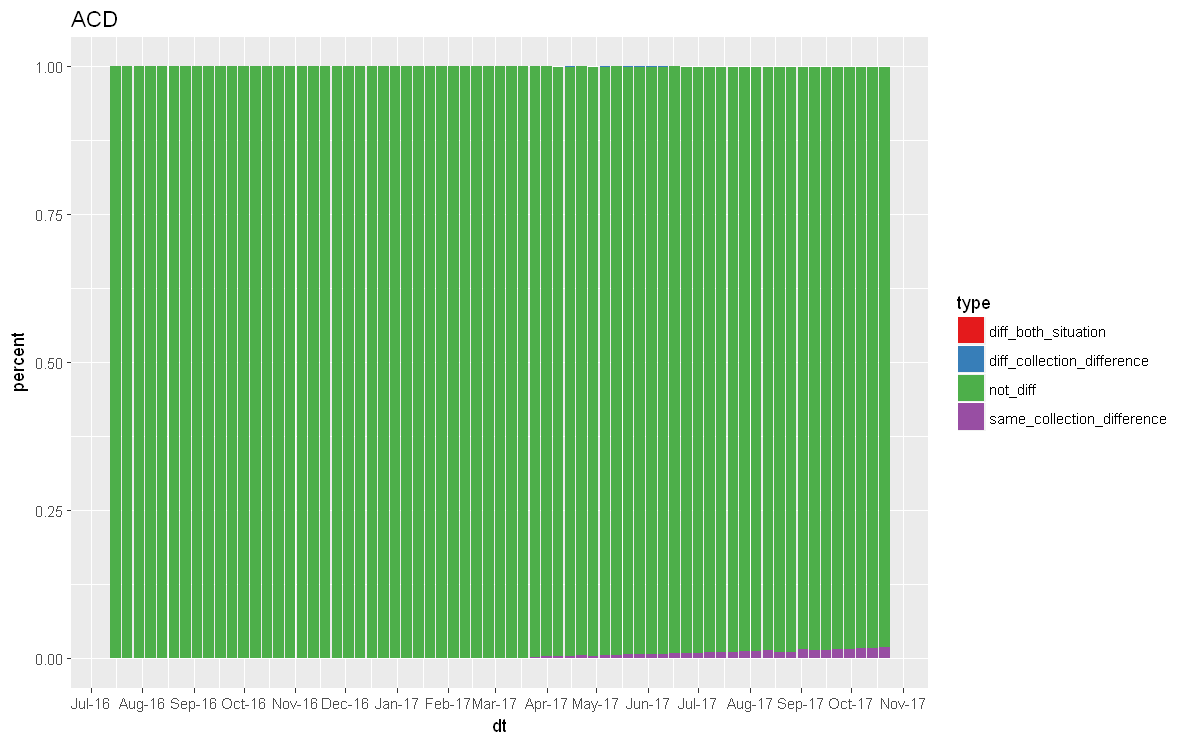


[[3]]


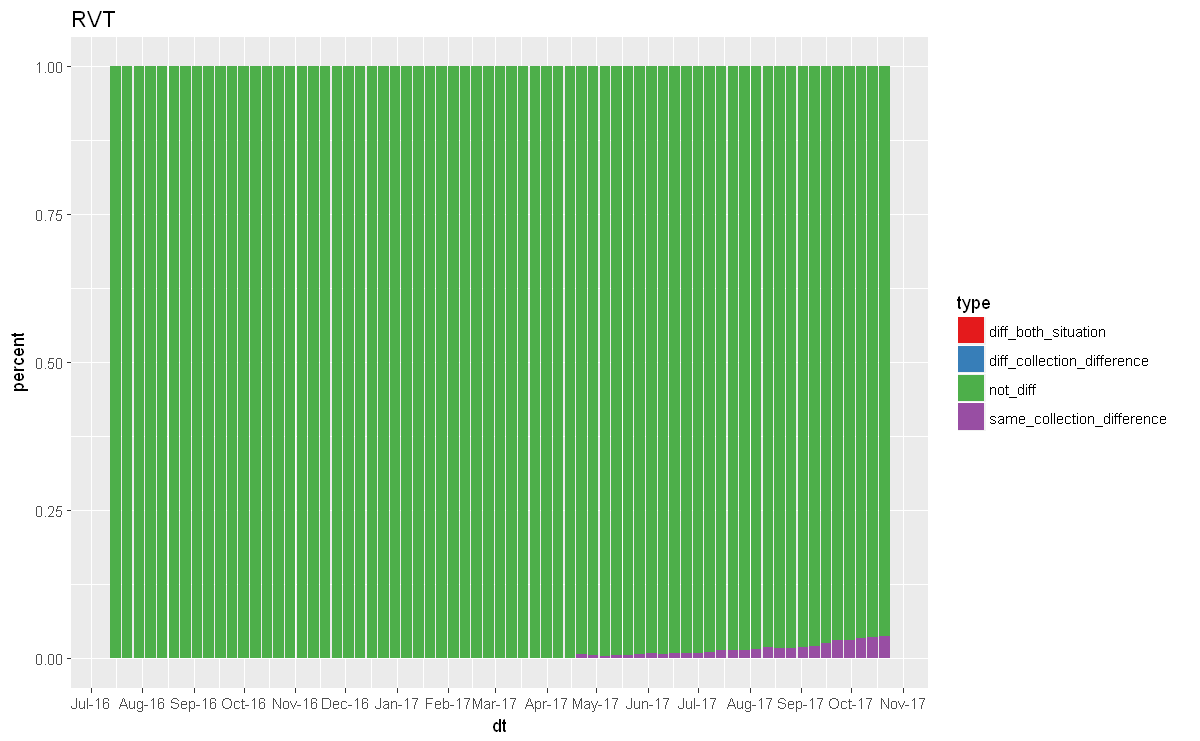


[[4]]


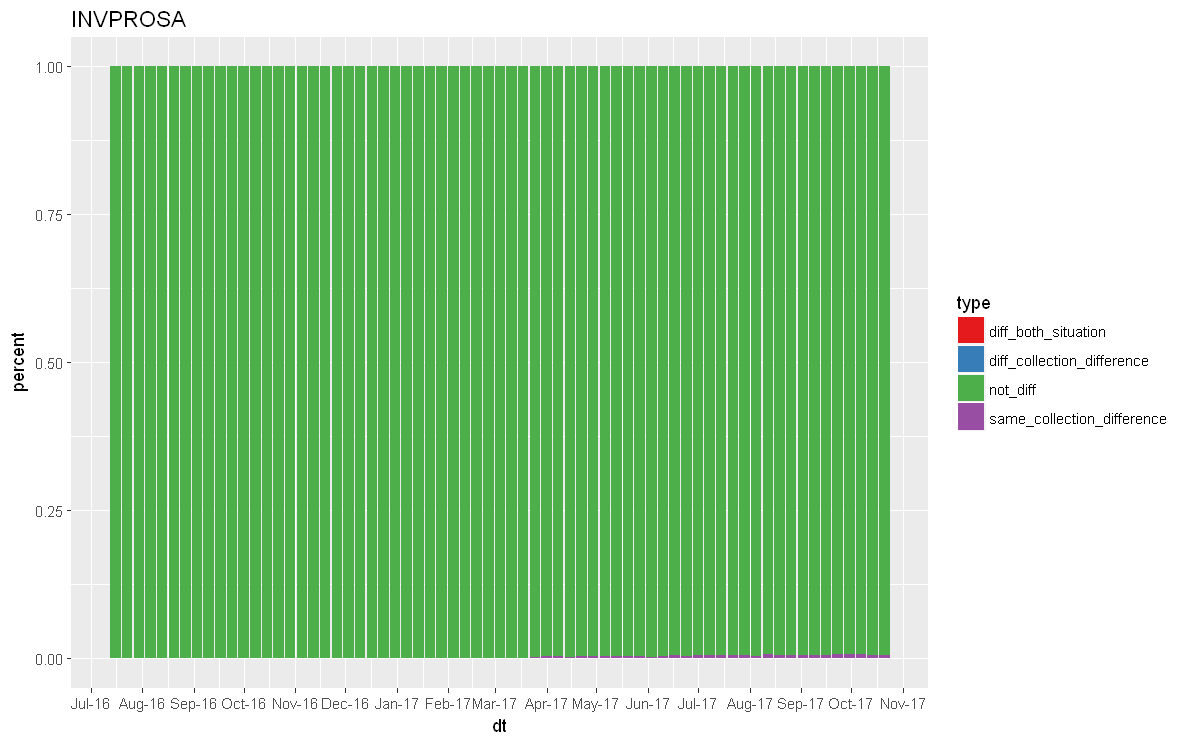


[[5]]


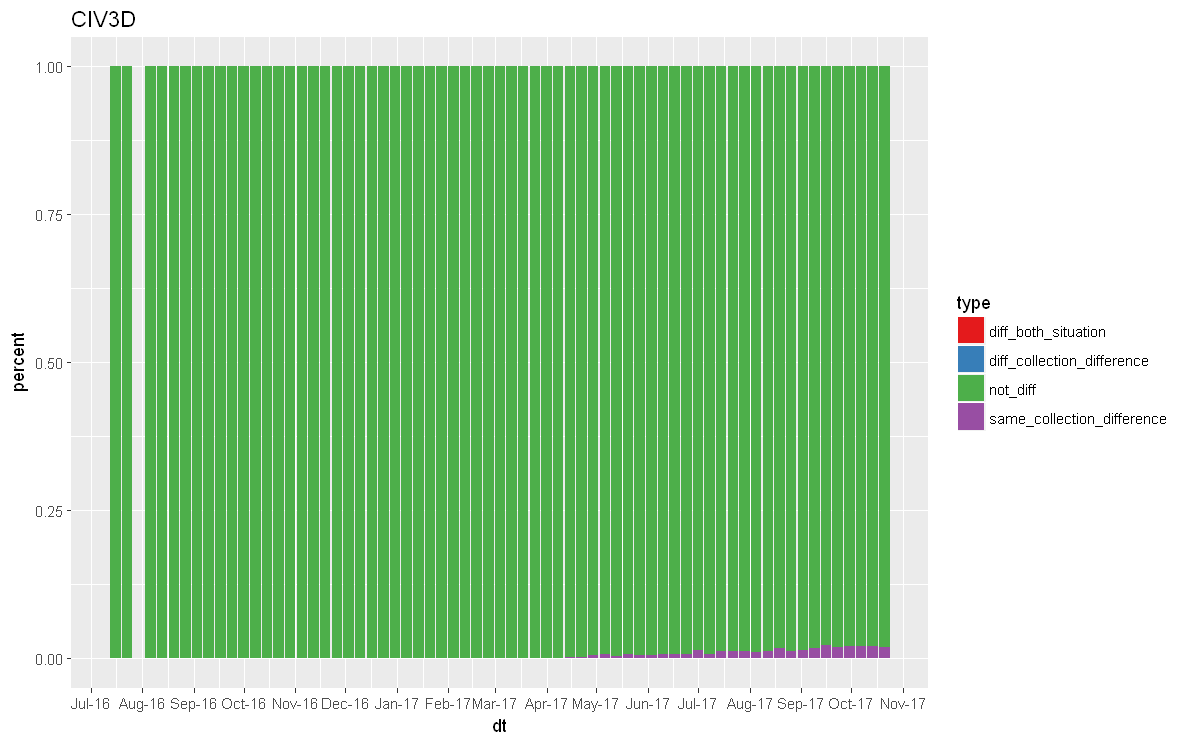


[[6]]


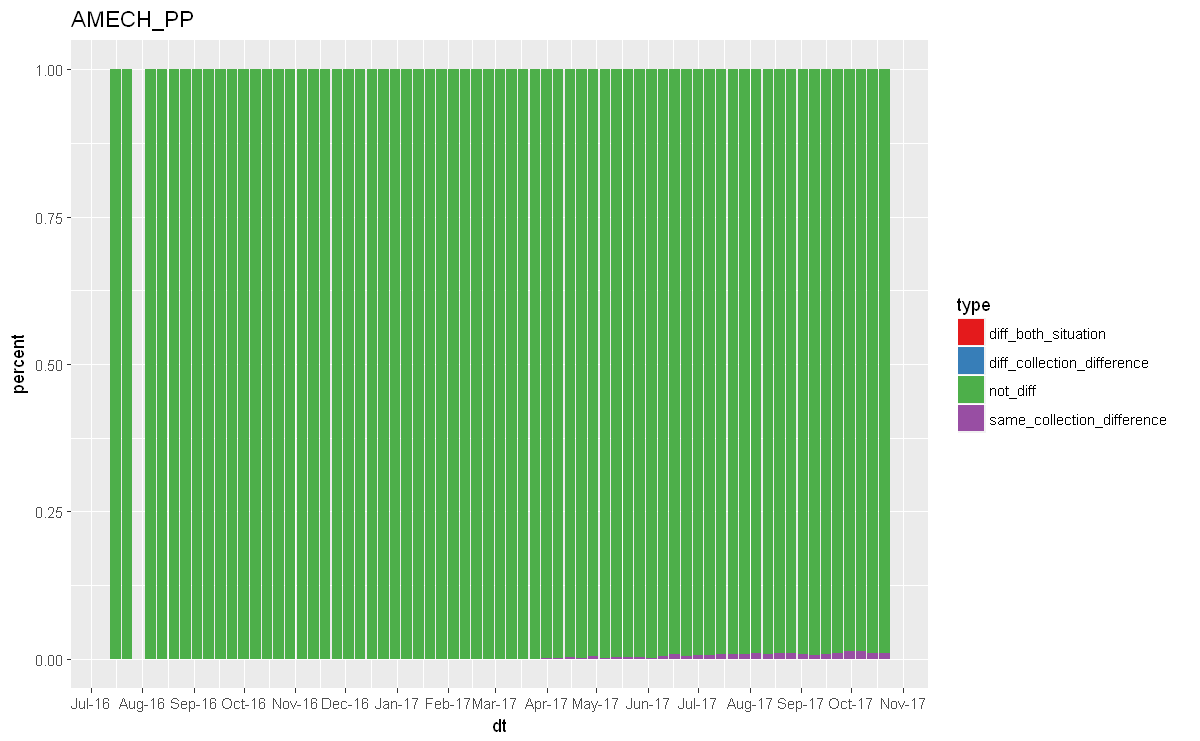


[[7]]


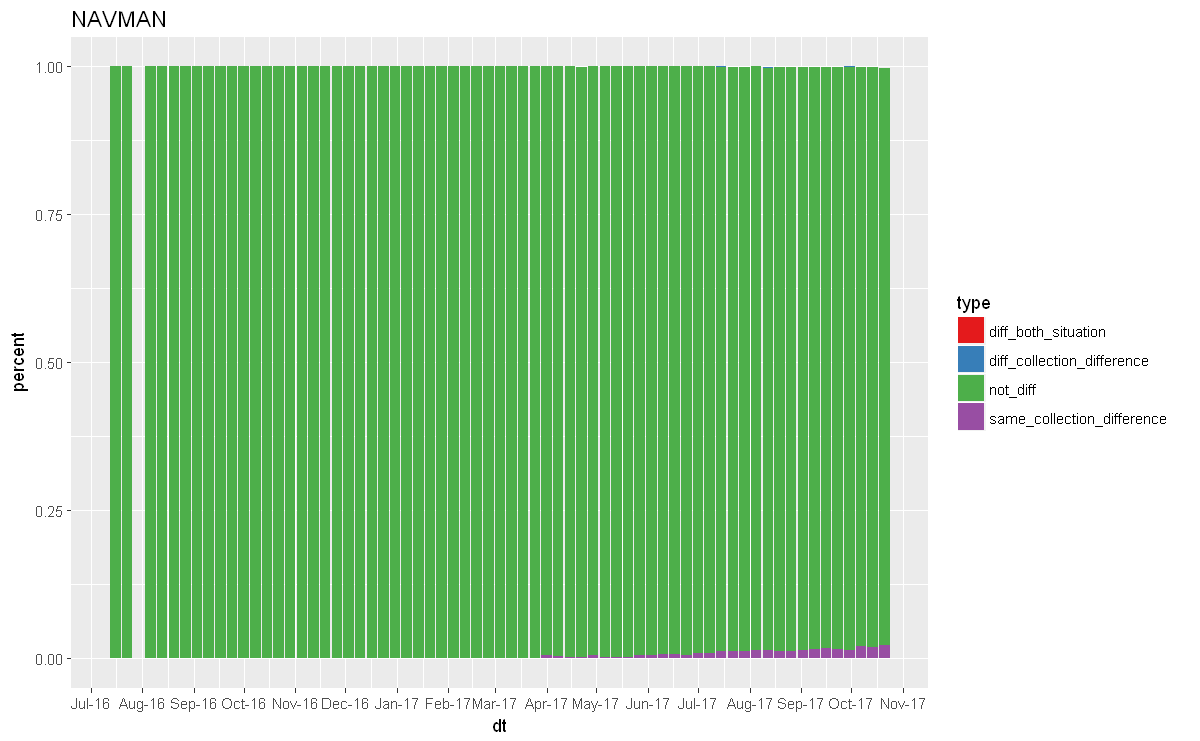


[[8]]


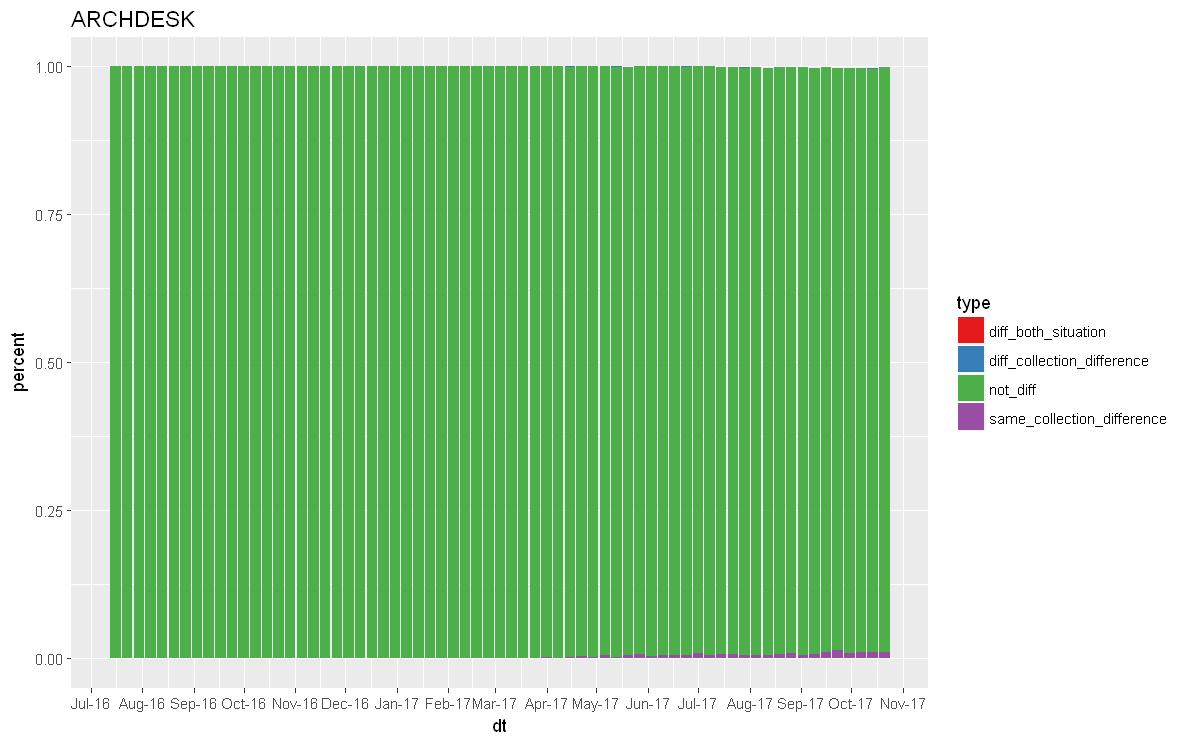


[[9]]


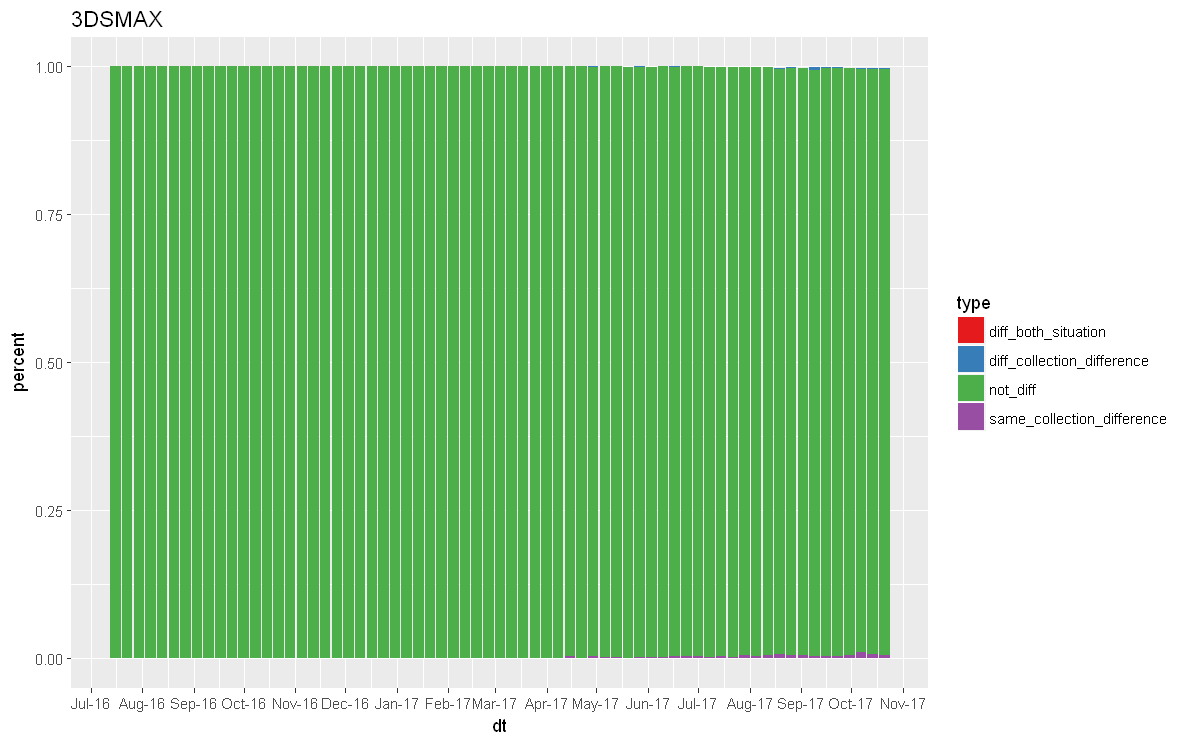


[[10]]


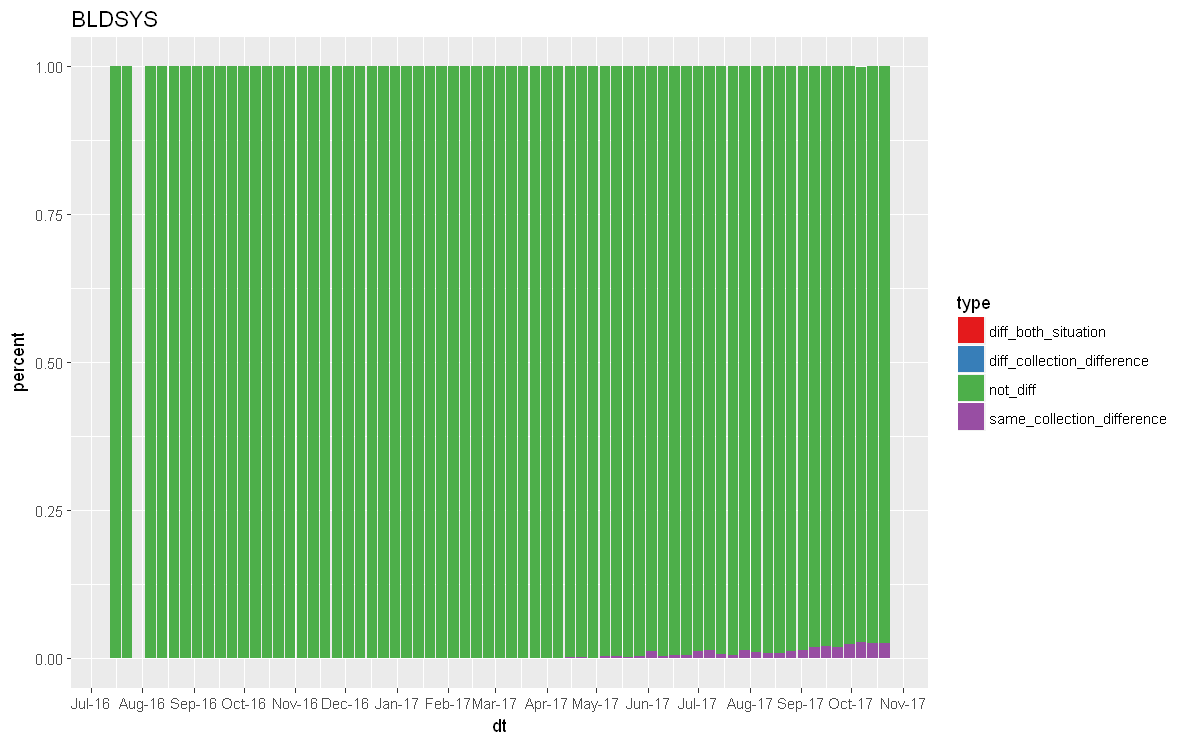


[[11]]


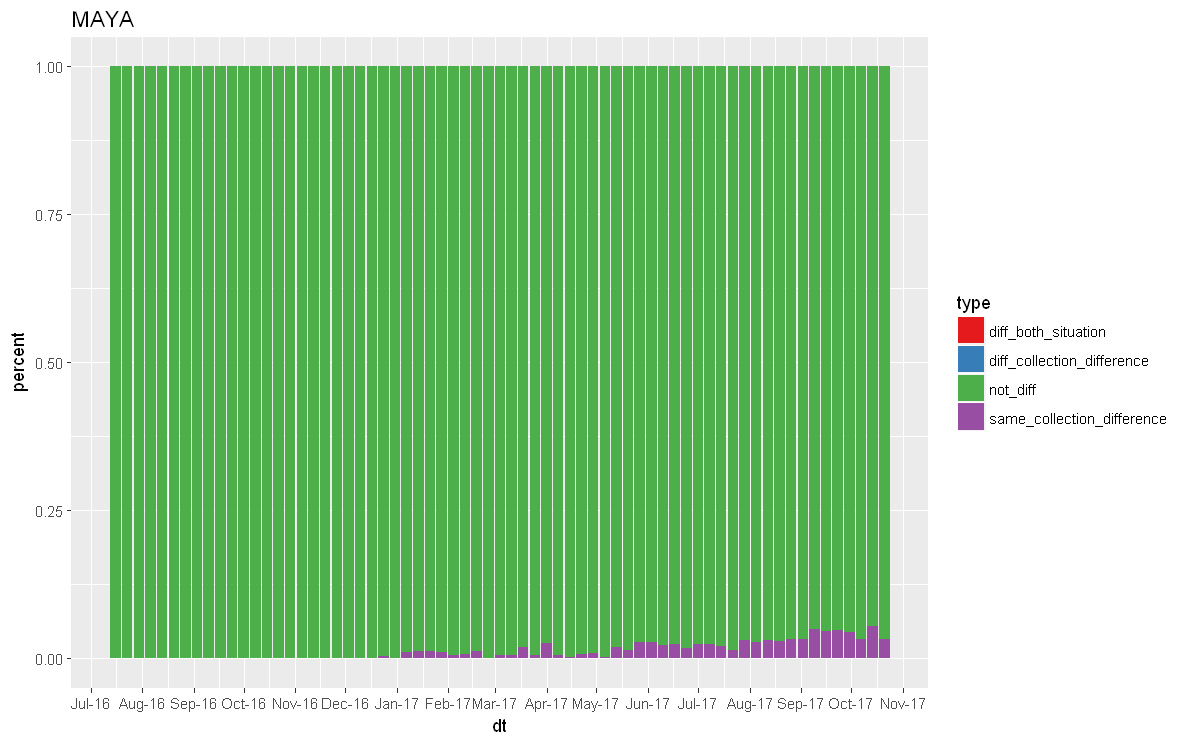


[[12]]


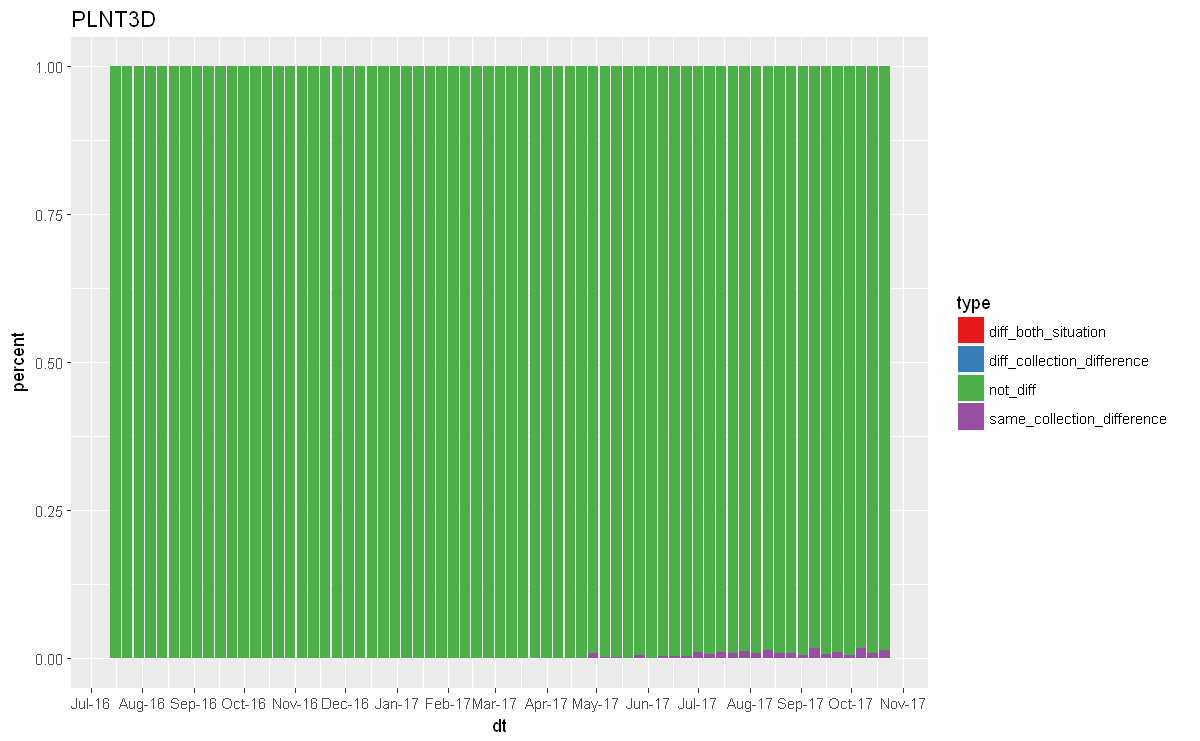


[[13]]


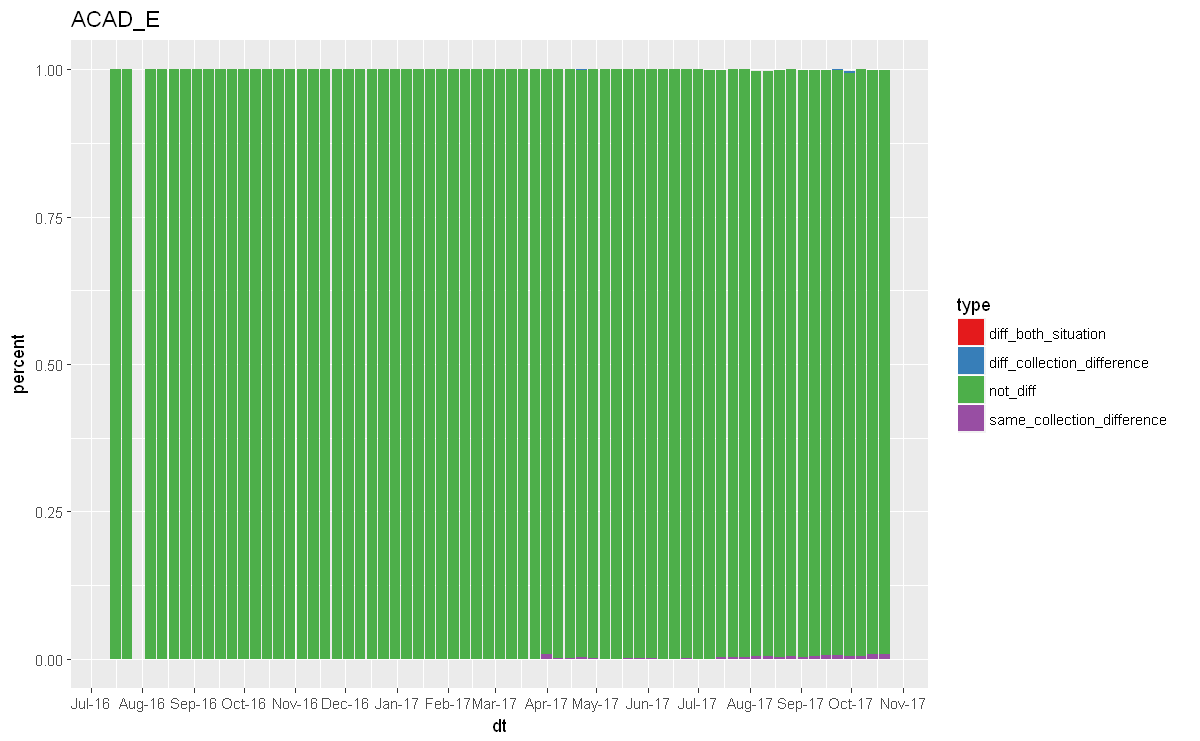


[[14]]


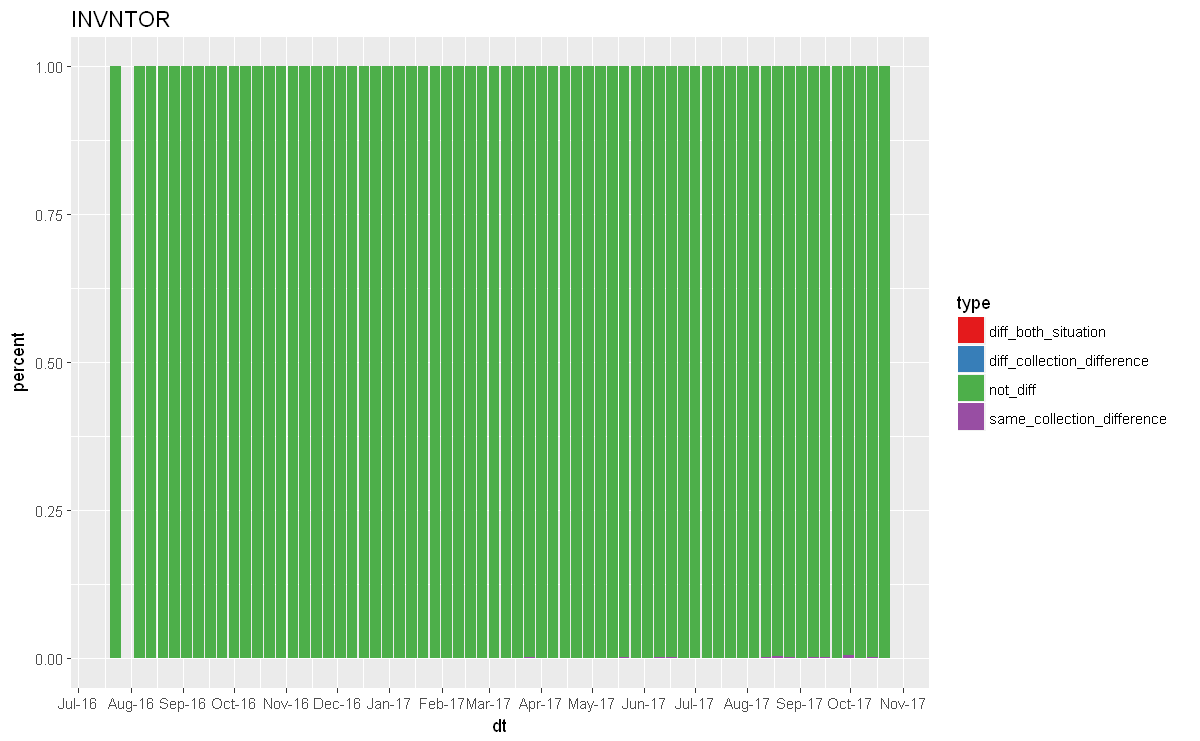


[[15]]


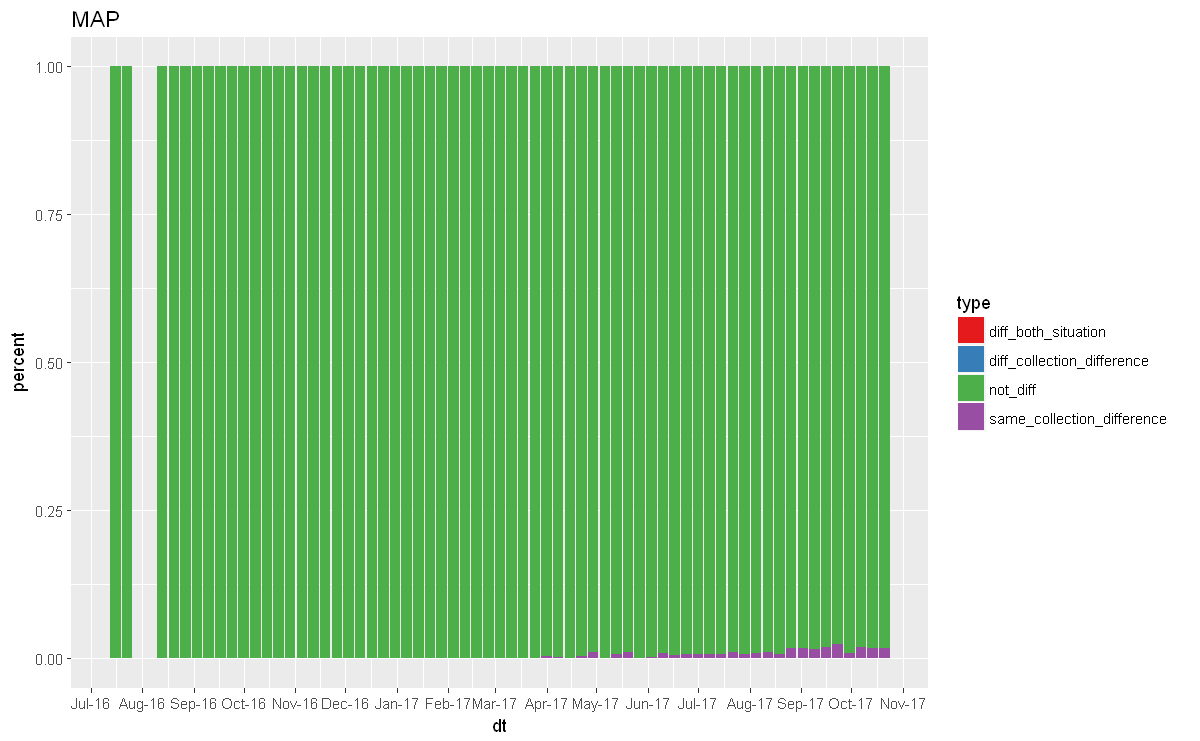


[[16]]


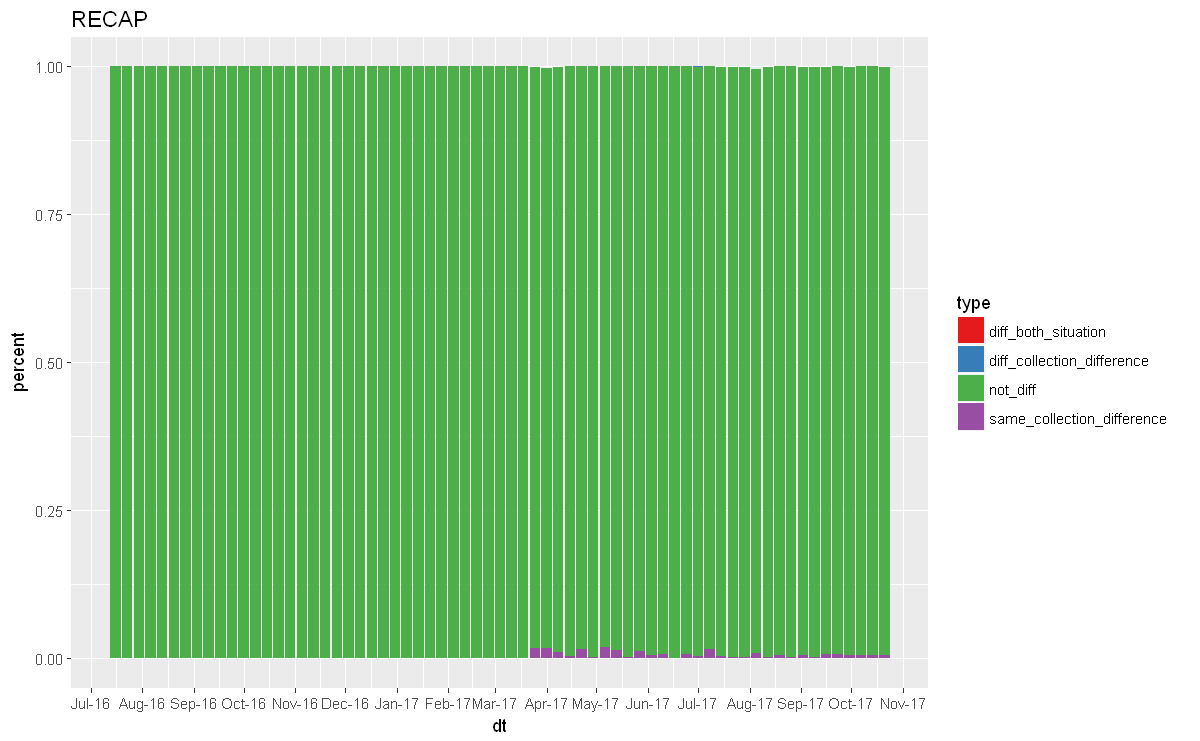


[[17]]


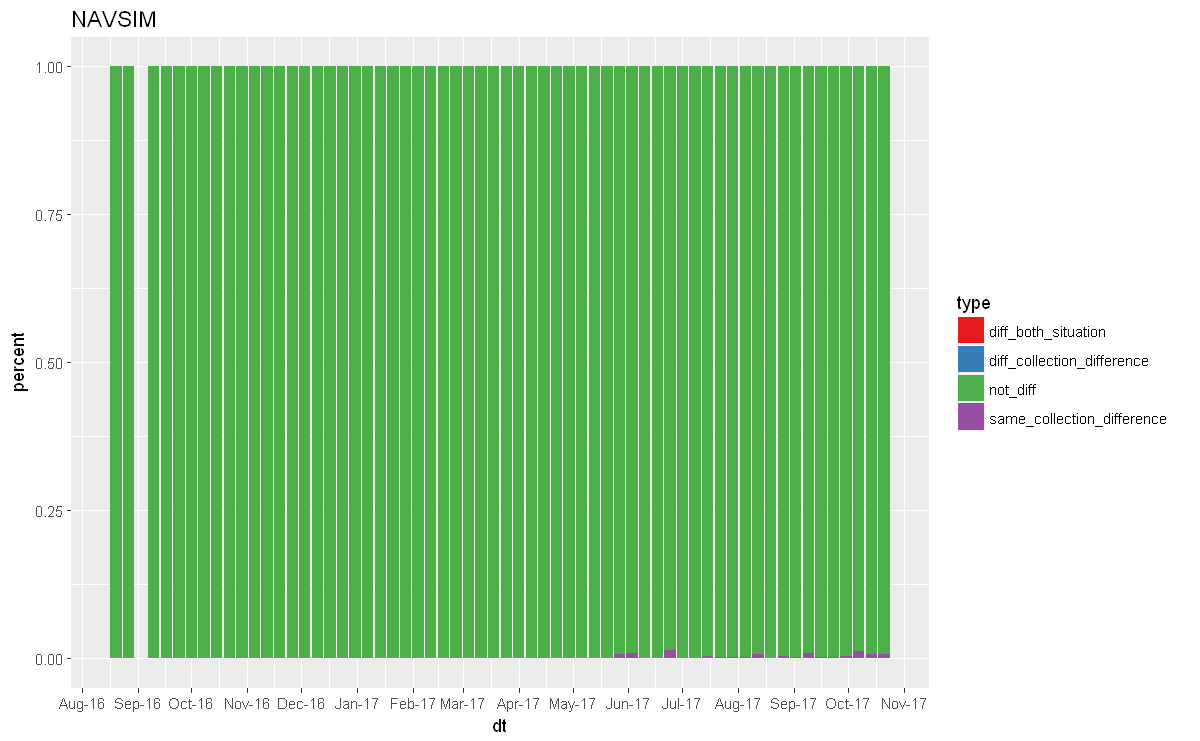

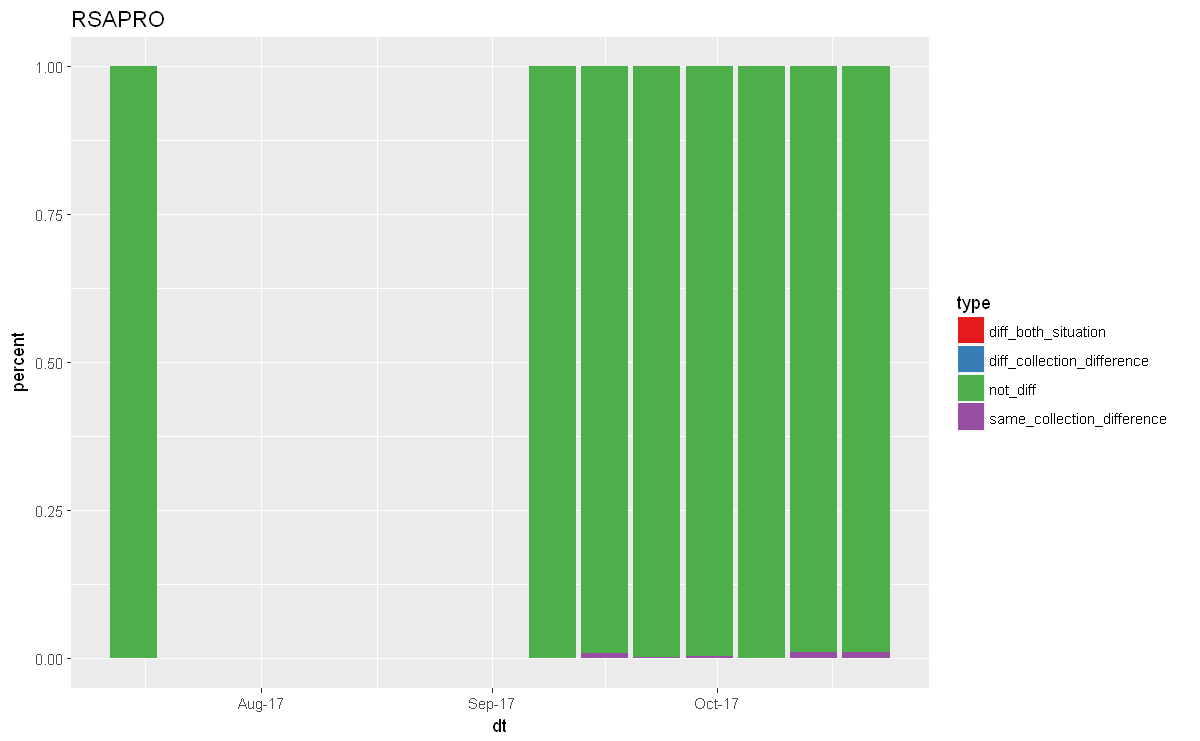

In [38]:
graph_result <- list()
for(i in 1 : length(focus_product)){
    graph_result[[i]] <- result %>%
        filter(product_line_name == focus_product[i]) %>%
        ggplot() +
        geom_col(mapping = aes(x = dt, y = percent,fill = type)) +
        scale_x_date(breaks = date_breaks("months"), labels = date_format("%b-%y")) +
        labs(title = focus_product[i]) +
        scale_fill_brewer(palette = "Set1")
}
print(graph_result)

### Observations
Usage of different versions of the same product happens rarely(no more than 5%) given any week.  
For those who use different versions of product, most usage comes from usage of different versions in the same collection.
### Which are the sources of difference
| Situations  | Time reach steay status(Month) |
| ------------- | ------------- |
|  1 | Use different version in the same collection  |
| 2  |  Use different version in the different collection  |
|  3 | both situation 1 & 2  |
| 4  | There are no usage of different versions  |

[[1]]


Warning message:
"Removed 105 rows containing missing values (position_stack)."


[[2]]


Warning message:
"Removed 117 rows containing missing values (position_stack)."

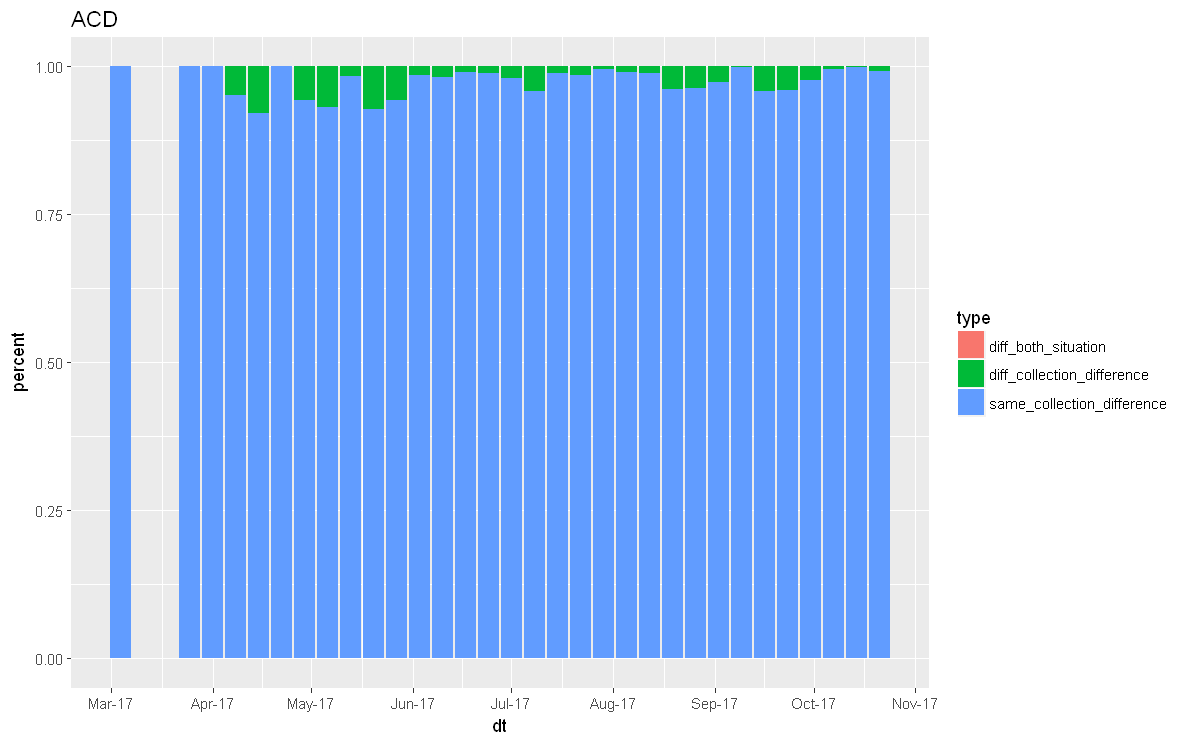


[[3]]


Warning message:
"Removed 108 rows containing missing values (position_stack)."

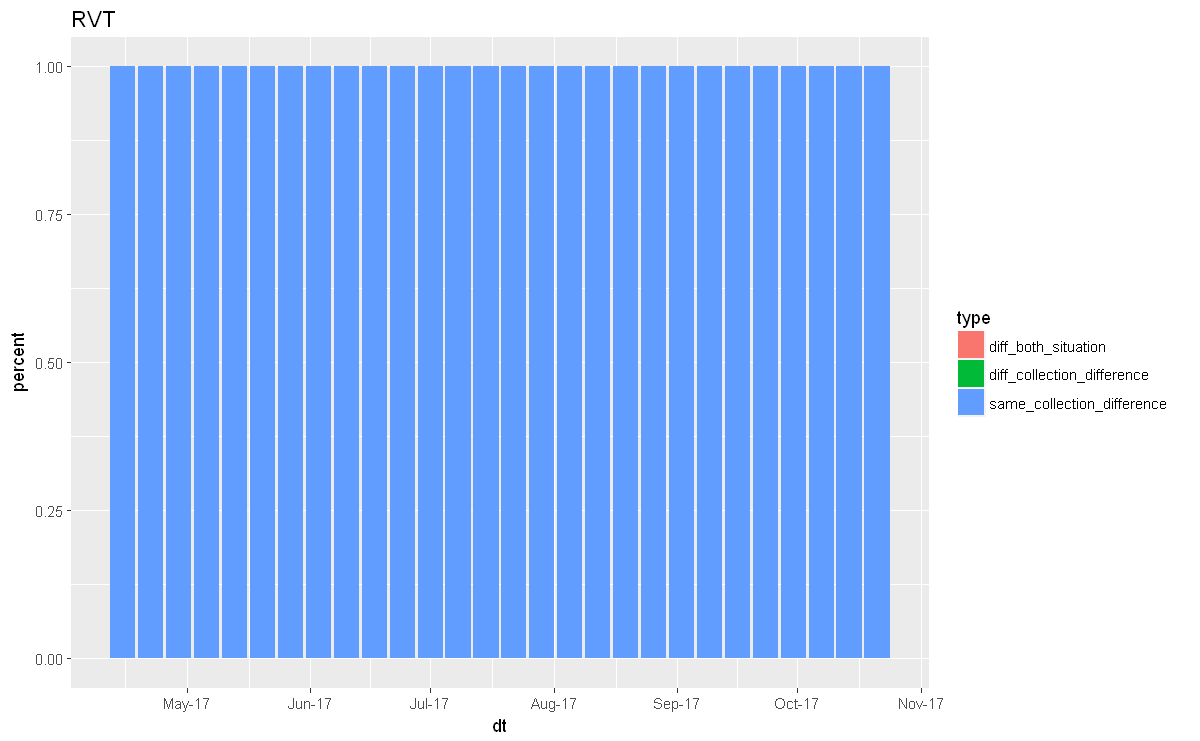


[[4]]


Warning message:
"Removed 114 rows containing missing values (position_stack)."

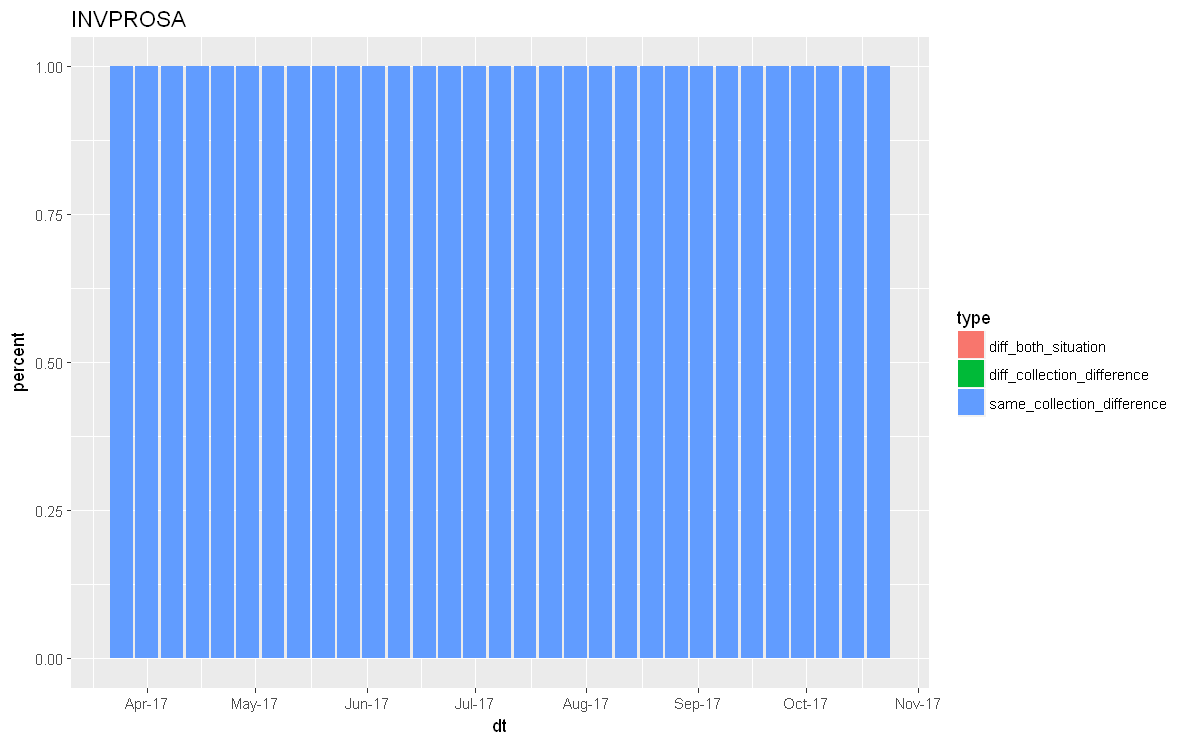


[[5]]


Warning message:
"Removed 108 rows containing missing values (position_stack)."

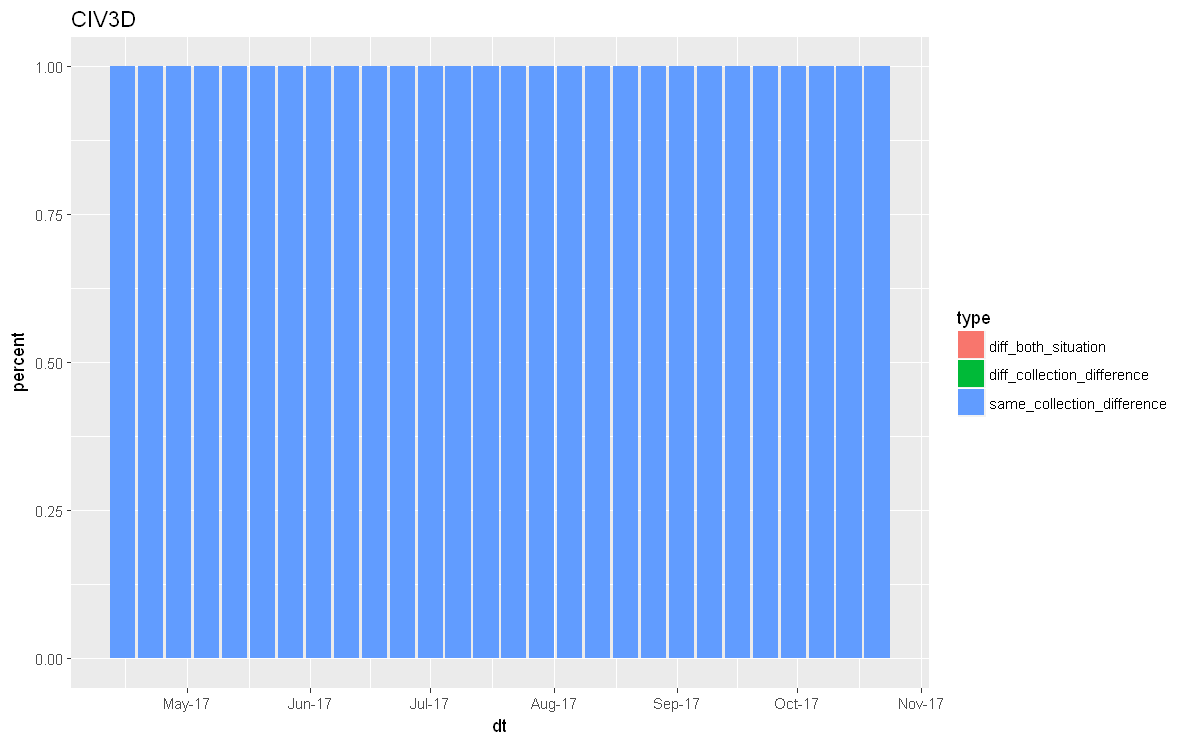


[[6]]


Warning message:
"Removed 105 rows containing missing values (position_stack)."

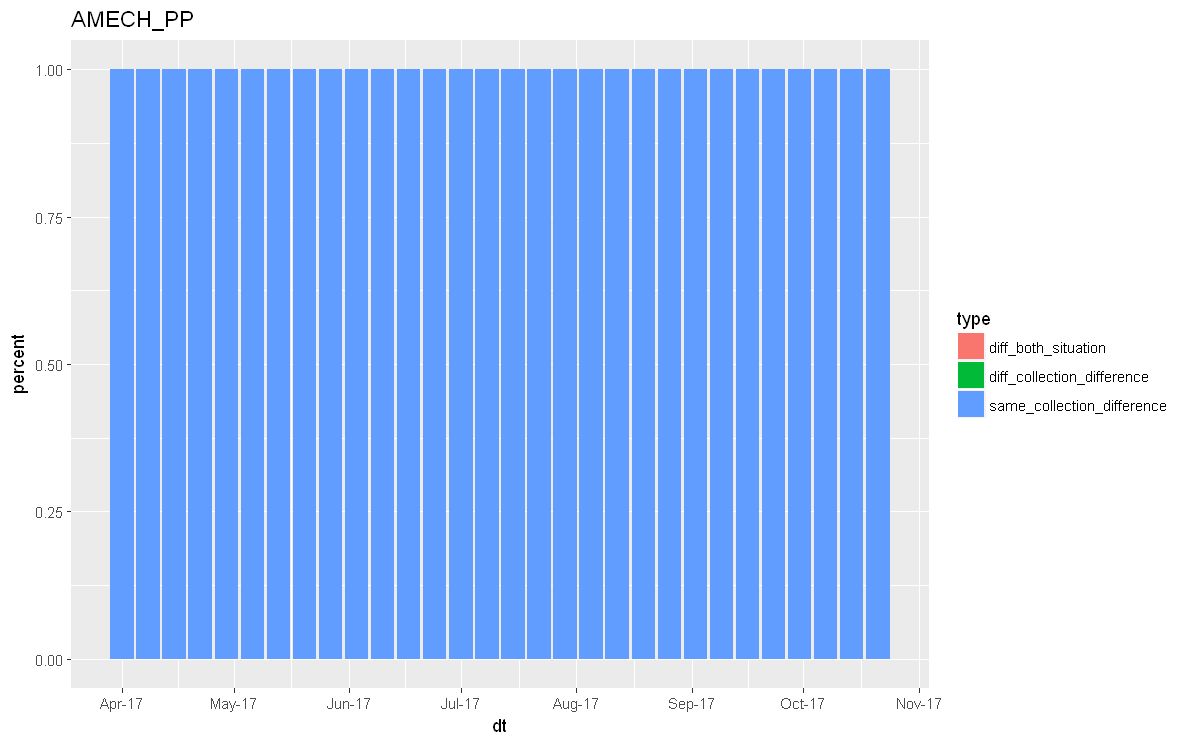


[[7]]


Warning message:
"Removed 111 rows containing missing values (position_stack)."

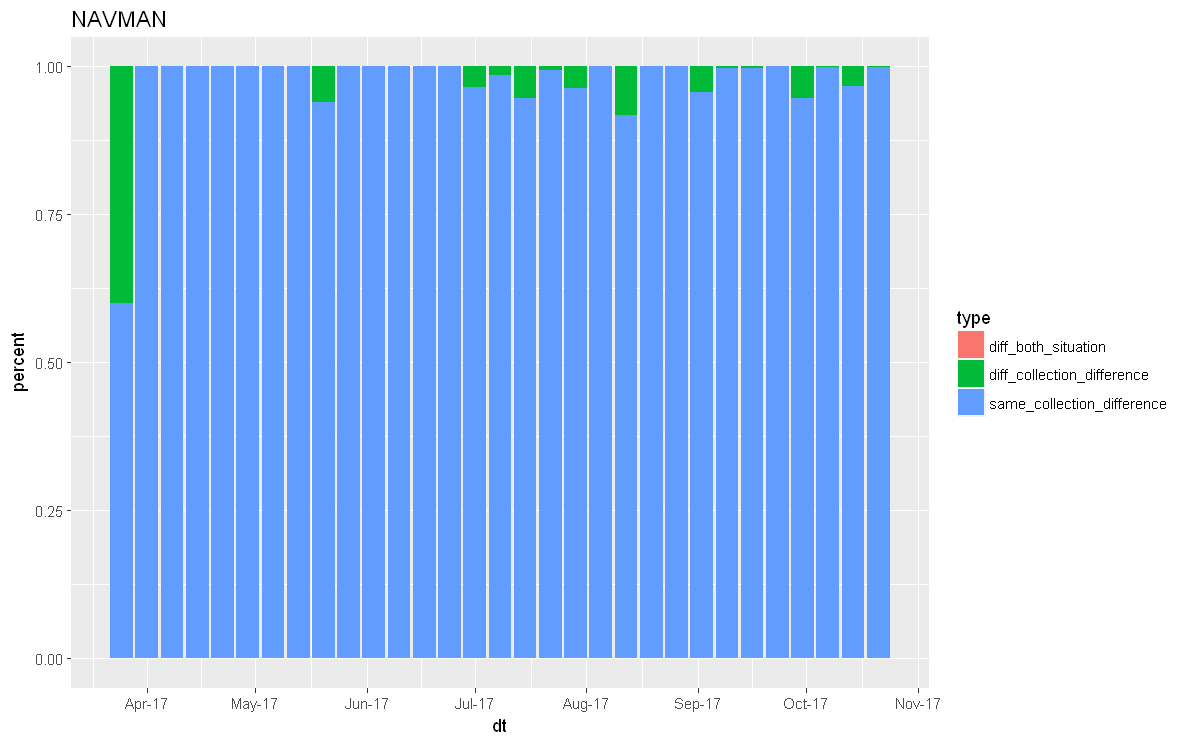


[[8]]


Warning message:
"Removed 117 rows containing missing values (position_stack)."

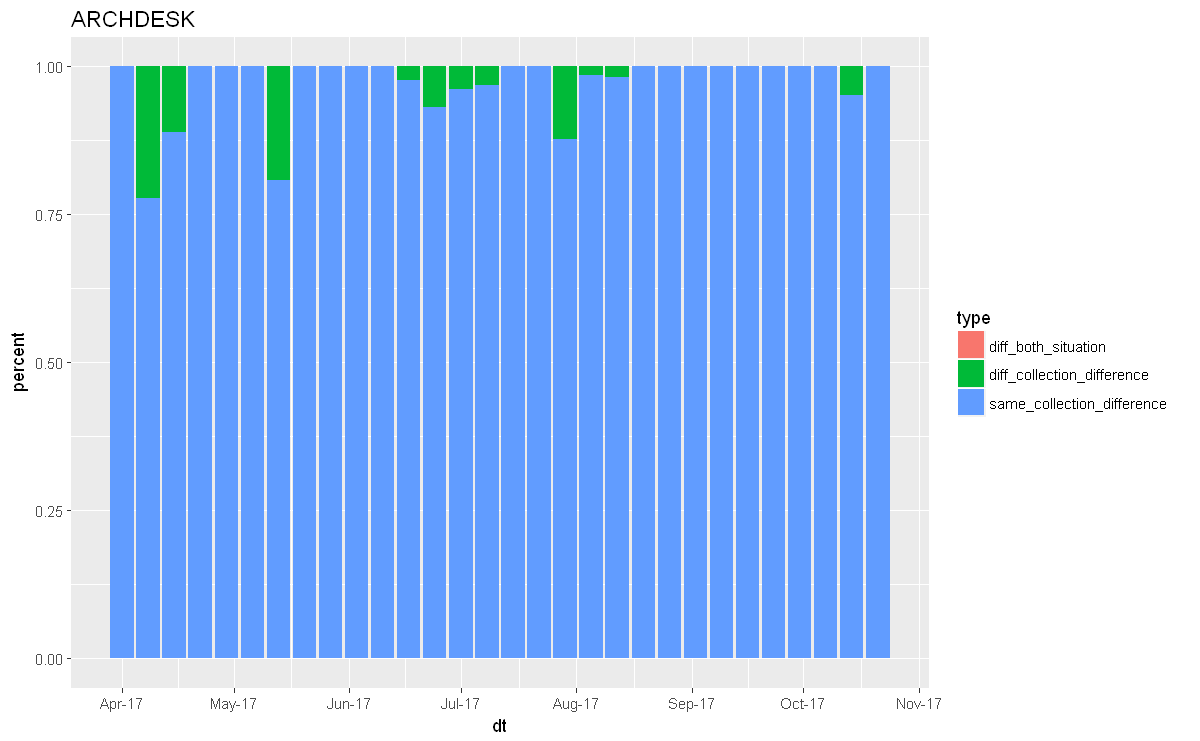


[[9]]


Warning message:
"Removed 111 rows containing missing values (position_stack)."

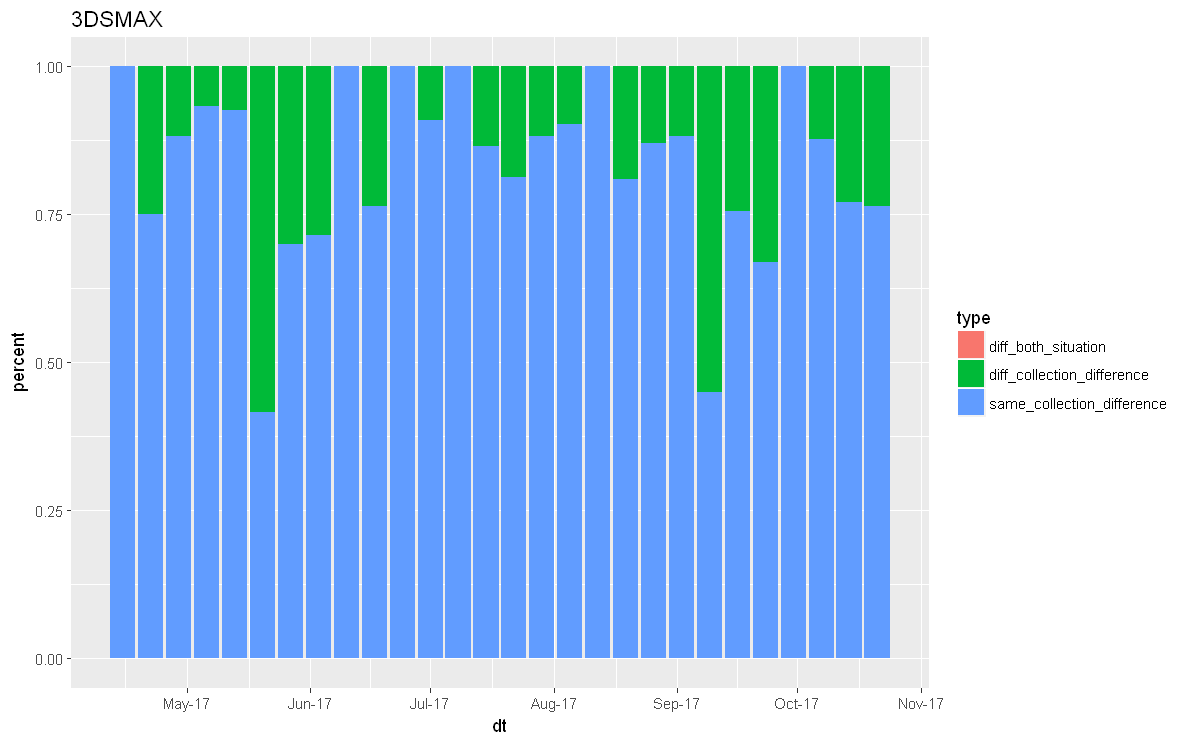


[[10]]


Warning message:
"Removed 66 rows containing missing values (position_stack)."

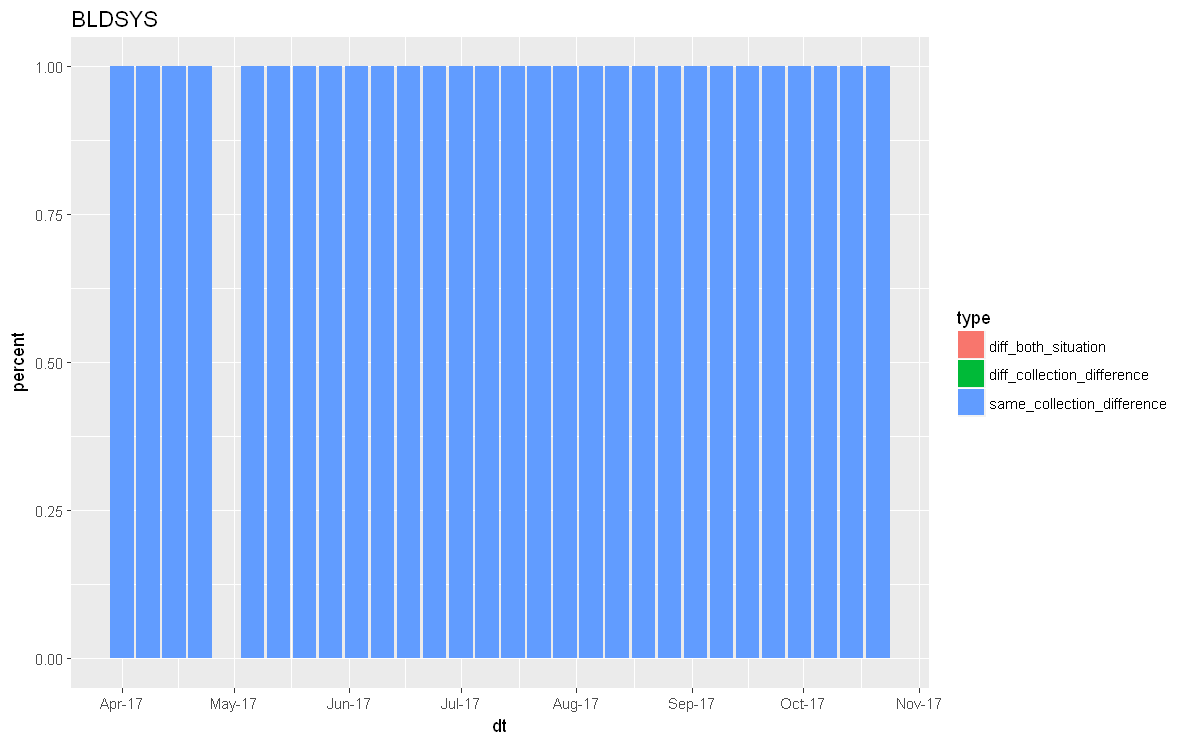


[[11]]


Warning message:
"Removed 114 rows containing missing values (position_stack)."

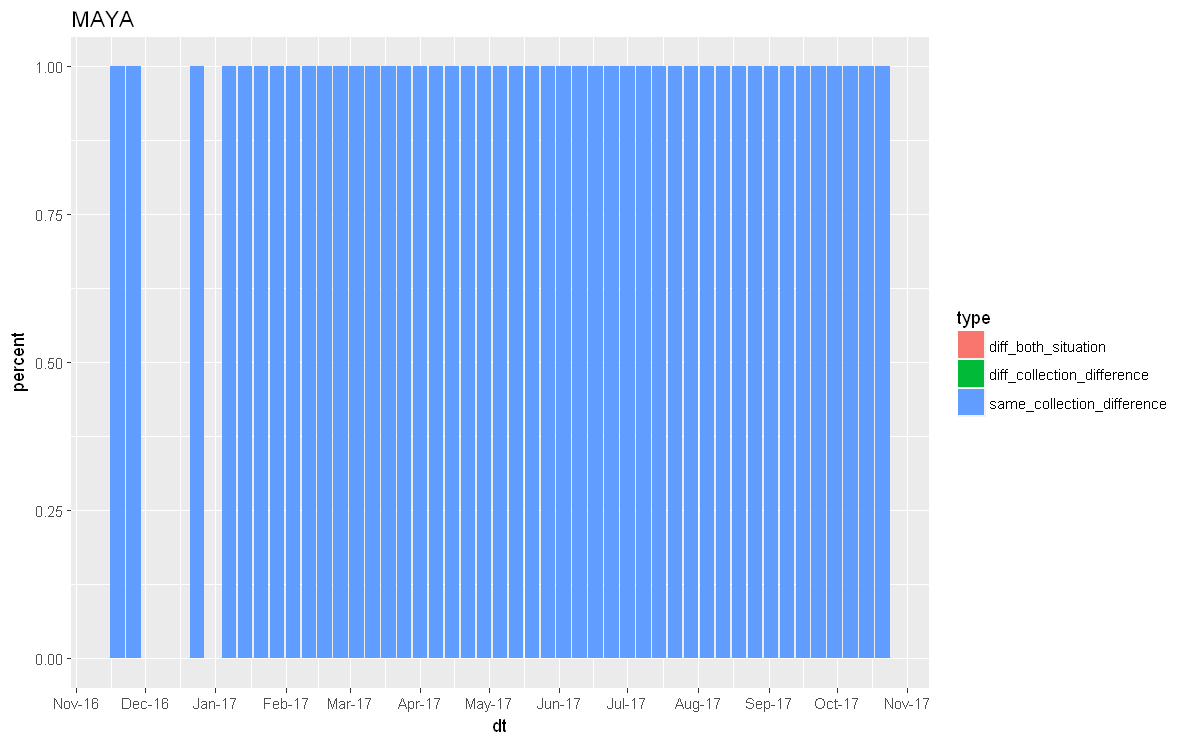


[[12]]


Warning message:
"Removed 126 rows containing missing values (position_stack)."

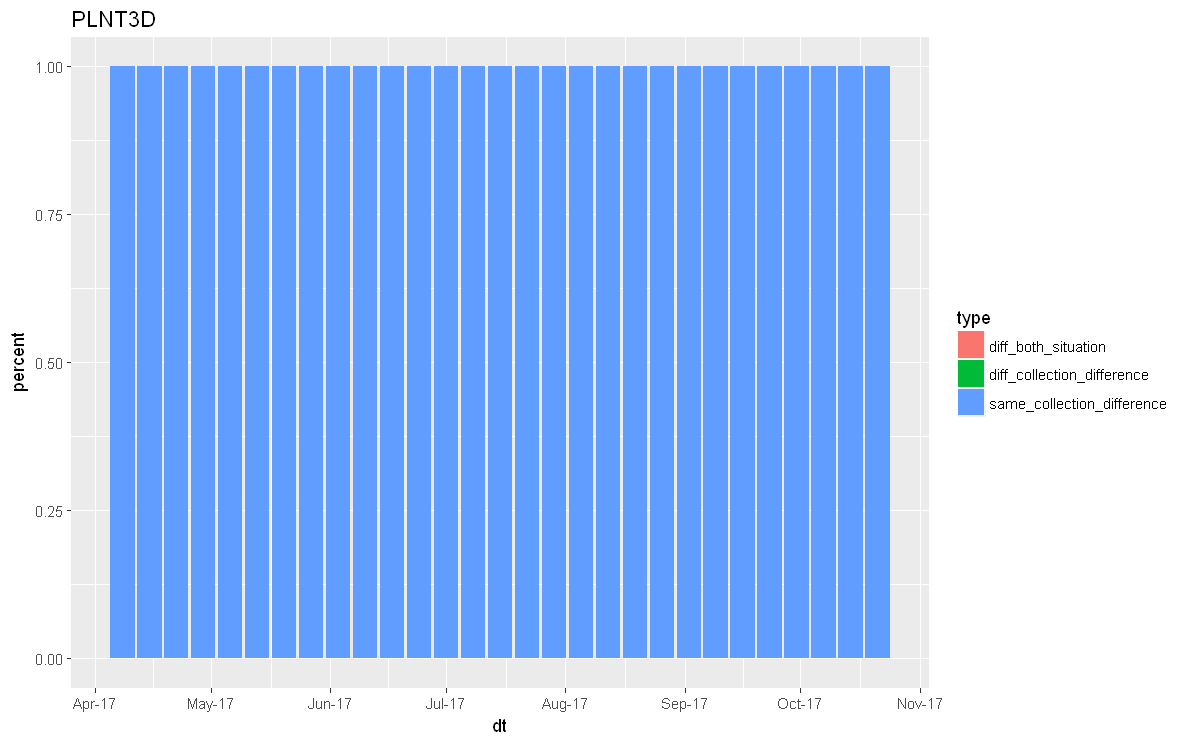


[[13]]


Warning message:
"Removed 144 rows containing missing values (position_stack)."

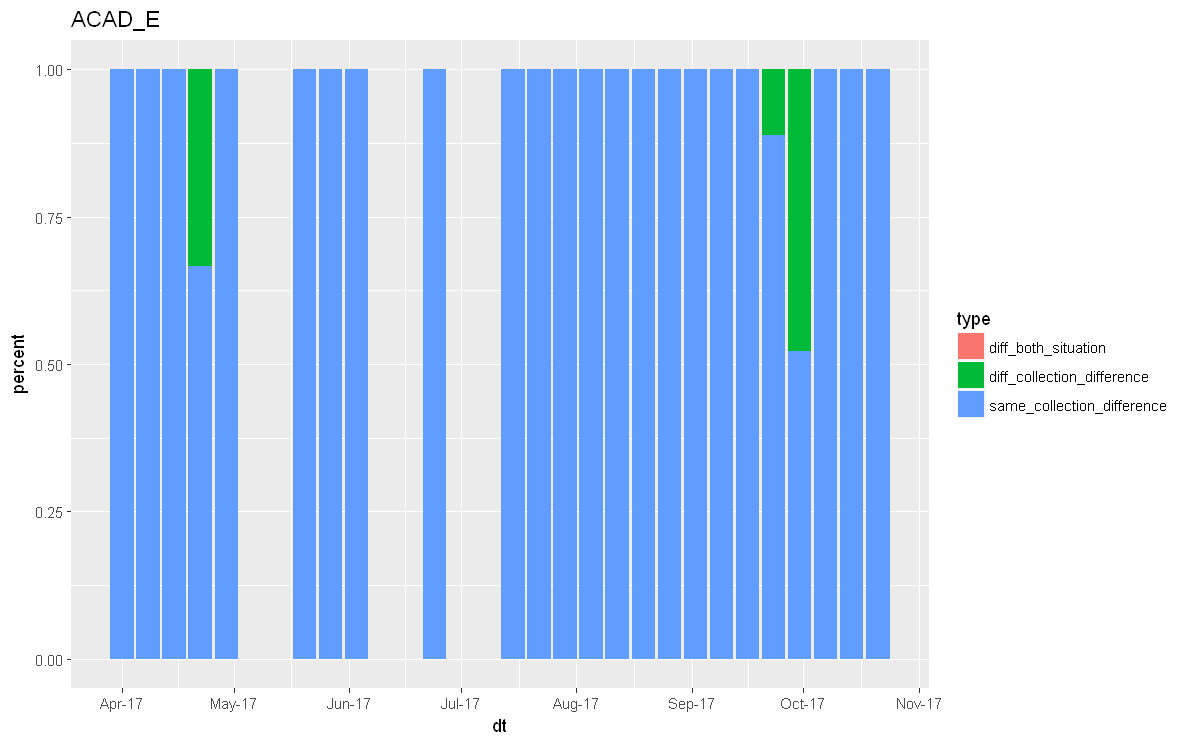


[[14]]


Warning message:
"Removed 108 rows containing missing values (position_stack)."

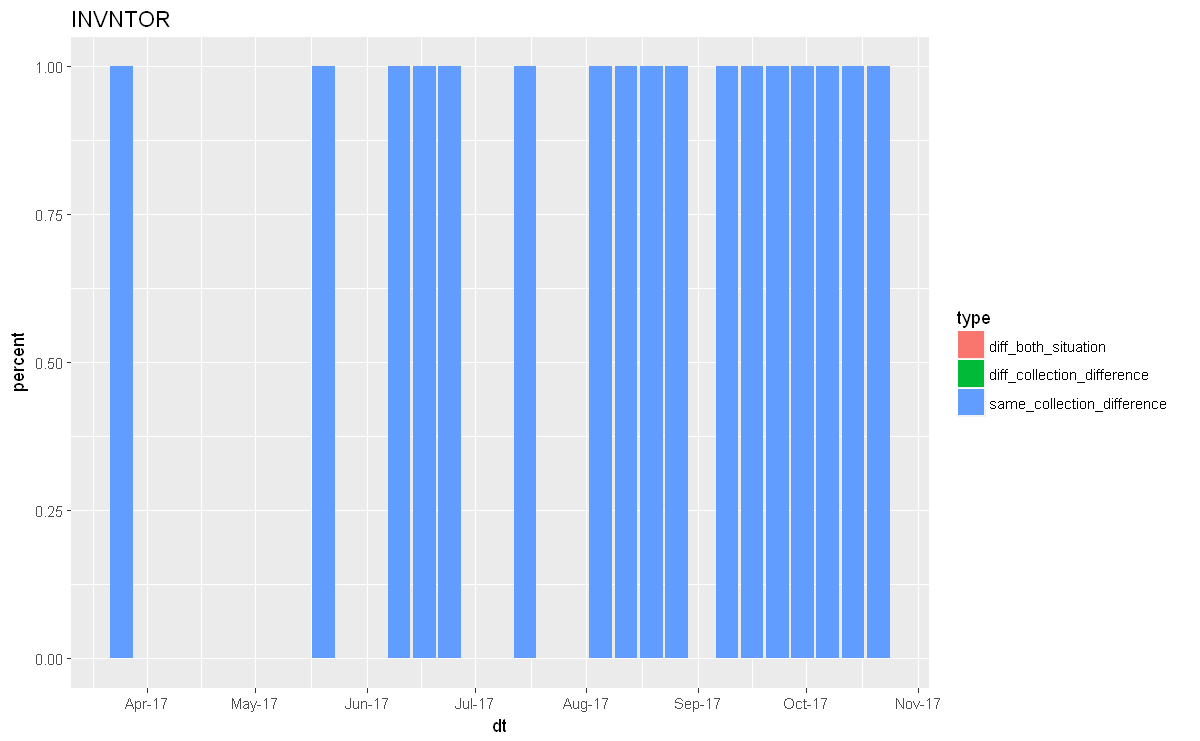


[[15]]


Warning message:
"Removed 108 rows containing missing values (position_stack)."

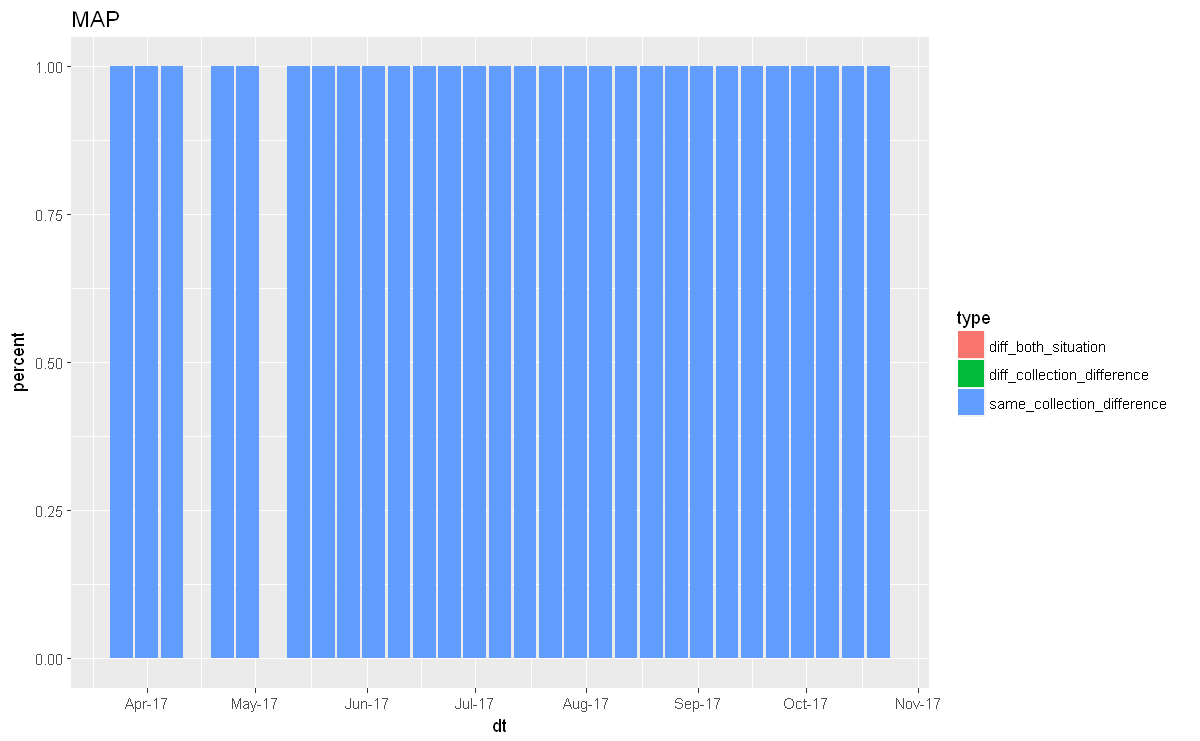


[[16]]


Warning message:
"Removed 132 rows containing missing values (position_stack)."

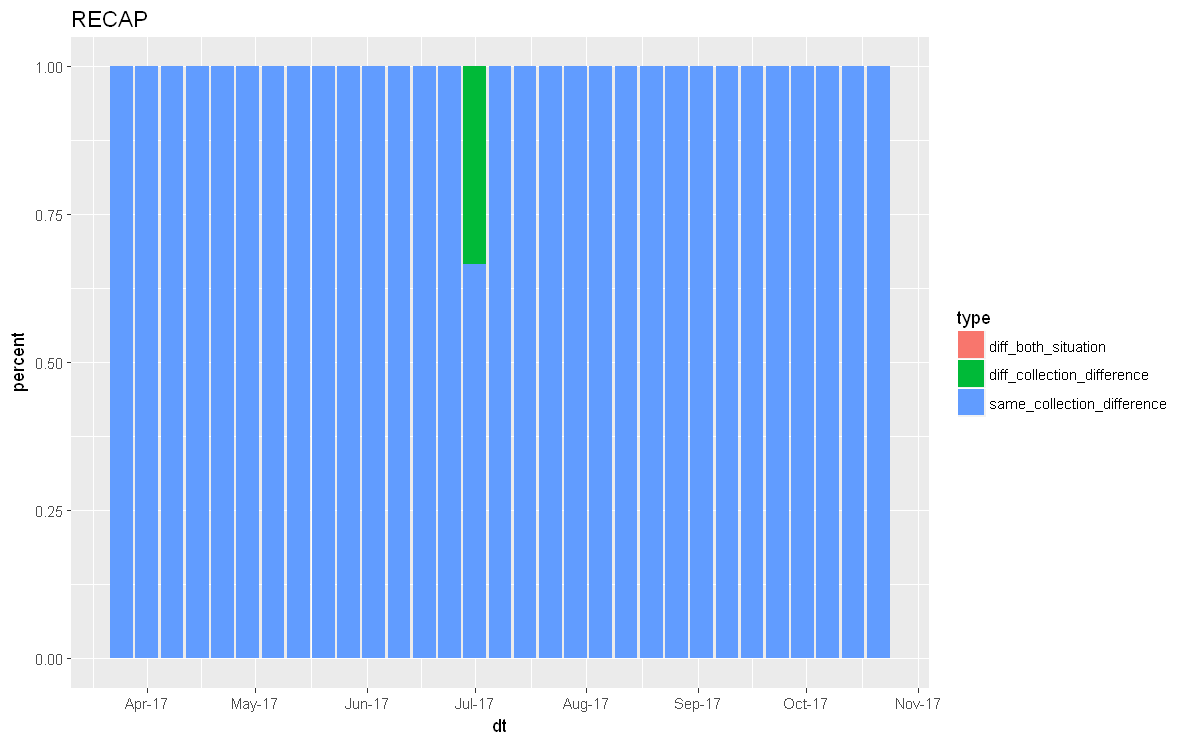


[[17]]


Warning message:
"Removed 6 rows containing missing values (position_stack)."

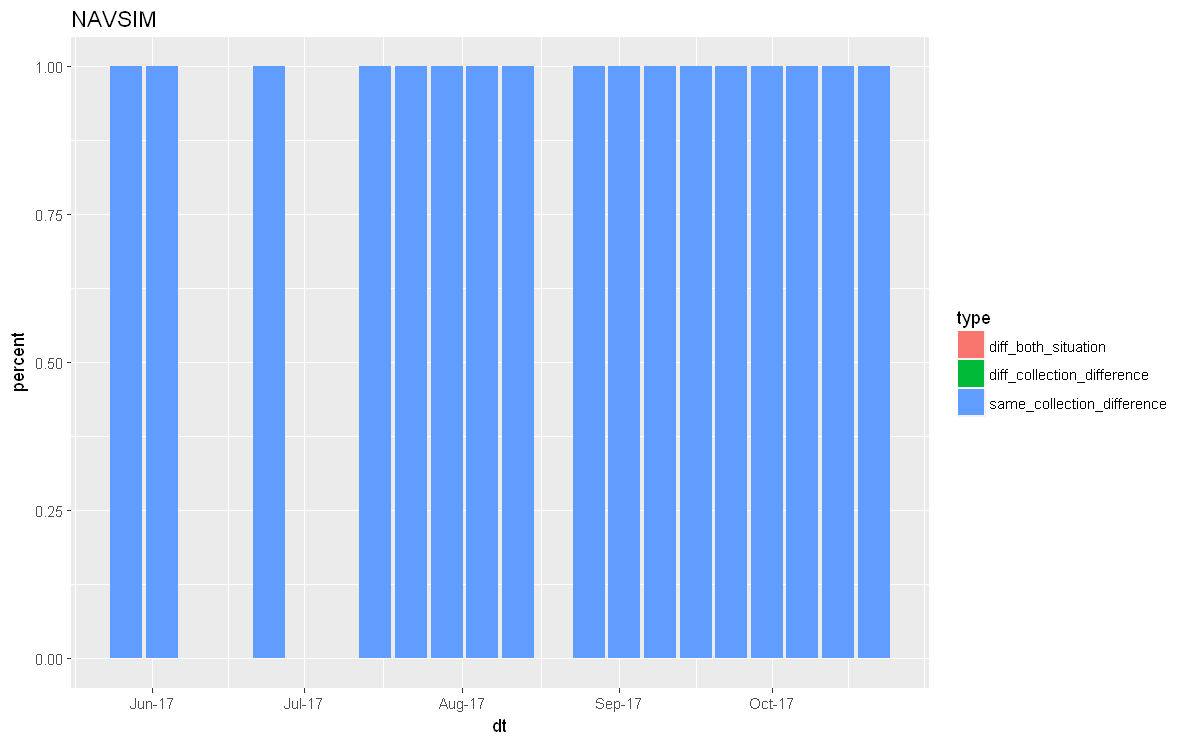

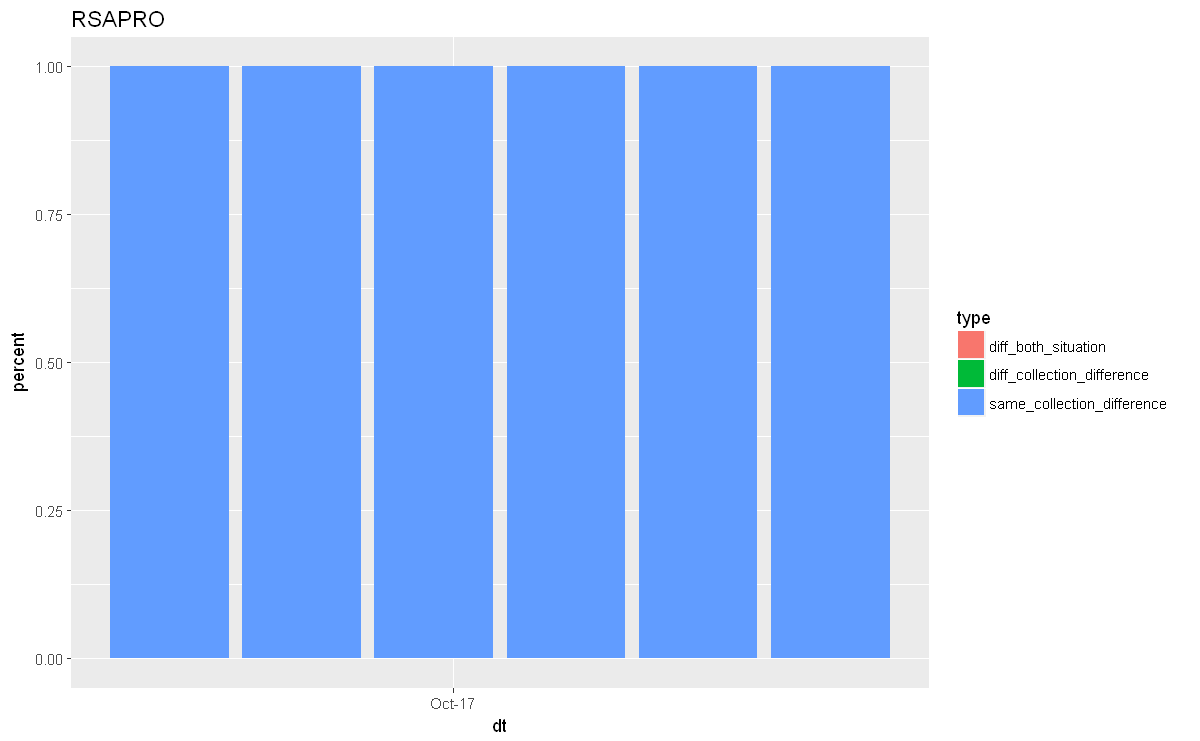

In [39]:
graph_result <- list()
for(i in 1 : length(focus_product)){
    graph_result[[i]] <- result %>%
        filter(product_line_name == focus_product[i] &
               type != "not_diff") %>%
    group_by(product_line_name, dt) %>%
    mutate(percent = percent/(sum(percent))) %>%
        ggplot() +
        geom_col(mapping = aes(x = dt, y = percent,fill = type)) +
        scale_x_date(breaks = date_breaks("months"), labels = date_format("%b-%y")) +
        labs(title = focus_product[i])
}
print(graph_result)